# **1. Introduction**



**Project Name : Credit Card Customer Segmentation Clustering Method**

**Author       : Tasya Amalia**

Project ini dibuat untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dengan informasi penggunaan kartu kredit selama 6 bulan terakhir. Dataset yang bersumber dari `BigQuery` yang menggunakan dataset `phase1_ftds_016_hck` dengan Project ID `ftds-hacktiv8-project` dan tabel bernama `credit-card-information`.




**Dataset Description Table**

| Column                             | Description                                    |
|-----------------------------------|------------------------------------------------|
| CUST_ID                           | Identification of Credit Card Holder        |
| BALANCE                           | Balance amount left in their account to make purchaces|
| BALANCE_FREQUENCY                 | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)                  |
| PURCHASES                         | Amount of purchases made from account |
| ONEOFF_PURCHASES                  | Maximum purchase amount done in one-go          |
| INSTALLMENTS_PURCHASES            | Amount of purchase done in installment              |
| CASH_ADVANCE                      | Cash in advance given by the user |
| PURCHASES_FREQUENCY               | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
| ONEOFF_PURCHASES_FREQUENCY        | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)            |
| PURCHASES_INSTALLMENTS_FREQUENCY  | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)             |
| CASH_ADVANCE_FREQUENCY            | How frequently the cash in advance being paid            |
| CASH_ADVANCE_TRX                  | Number of Transactions made with 'Cash in Advanced'           |
| PURCHASES_TRX                     | Number of purchase transactions made              |
| CREDIT_LIMIT                      | Limit of Credit Card for user     |
| PAYMENTS                          | Amount of Payment done by user          |
| MINIMUM_PAYMENTS                  | Minimum amount of payments made by user          |
| PRC_FULL_PAYMENT                  | Percent of full payment paid by user          |
| TENURE                            | Tenure of credit card service for user           |





# **2. Import Libraries**

In [2]:
# Library Data Manipulation
import pandas as pd
import numpy as np

# Library Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer

# Library Preprocessing data
# Handling Outlier
from feature_engine.outliers import Winsorizer

#Scaling pakai Robust
from sklearn.preprocessing import RobustScaler

# Library Machine Learning Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples, davies_bouldin_score

# For Save Model
import pickle
import joblib
import json

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Warning
import warnings
warnings.filterwarnings('ignore')

c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\irfan\anaconda3\New folder\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **3. Query SQL**

SELECT *

    FROM `ftds-hacktiv8-project.phase1_ftds_016_hck.credit-card-information`
    
WHERE MOD(CUST_ID, 2) = 0

**Penjelasan:**

Query SQL tersebut dibuat di Google Cloud Platform yang digunakan untuk mengambil data dari BigQuery. Data ini mengambil dari project `ftds-hacktiv8-project` dengan dataset yang bernama `phase1_ftds_016_hck` dan mengambil tabel dari `credit-card-information` dalam BigQuery.


# **4. Data Loading**

In [3]:
'''
Melakukan load  data ke dalam pandas DataFrame dari sumber csv
'''

df = pd.read_csv('Dataset Credit Card.csv')

**Penjelasan:**

Data loading merupakan langkah awal yang penting dalam analisis data dan pembuatan model machine learning. Pada langkah ini dilakukan untuk memuat data yang bersumber dari file `csv`.

#### *4.1 Menampilkan Data Teratas & Terbawah*

In [4]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

**Penjelasan:**

Menggunakan pandas .head(10), dapat menampilkan 10 data teratas dari DataFrame. Sekilas, kolomnya terdiri dari data numerik. Namun, perlu dilakukan explore data lebih lanjut untuk mengetahui tipe data setiap kolom.



In [5]:
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

**Penjelasan:**

Menggunakan pandas .tail(10), dapat menampilkan 10 data terbawah dari DataFrame.

#### *4.2 Menampilkan Ringkasan Informasi*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini memiliki data `missing value` yaitu pada kolom `CREDIT_LIMIT` sebanyak 1 baris dan kolom `MINIMUM_PAYMENTS` sebanyak 158 baris sehingga akan dilakukan `handling missing value` pada bagian `Feature Engineering`.


#### *4.3 Melihat Data Missing Value*

In [7]:
# Cek apakah ada data Missing Value
print(f'Jumlah Missing Values : {df.isnull().sum()}')

Jumlah Missing Values : CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini memiliki data `missing value` yaitu pada kolom `CREDIT_LIMIT` sebanyak 1 baris dan kolom `MINIMUM_PAYMENTS` sebanyak 158 baris sehingga akan dilakukan `handling missing value` pada bagian `Feature Engineering`.


#### *4.4 Melihat Data Duplicate*

In [8]:
# Cek apakah ada data duplikat
print(f'Jumlah Data Duplikat : {df.duplicated().sum()}')

Jumlah Data Duplikat : 0


**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini tidak memiliki `data duplikat`.

#### *4.5 Menampilkan Nilai Unik Setiap Kolom*

In [9]:
# Menampilkan nilai unique pada setiap kolom
unique_values_all = df.apply(pd.Series.unique)

unique_values_all

CUST_ID                             [788, 1902, 2322, 3426, 3976, 4266, 4360, 4680...
BALANCE                             [16.581535, 943.584041, 1.979916, 461.45572, 1...
BALANCE_FREQUENCY                   [0.125, 0.875, 1.0, 0.375, 0.545455, 0.454545,...
PURCHASES                           [200.0, 103.0, 80.0, 585.0, 1450.0, 120.0, 290...
ONEOFF_PURCHASES                    [0.0, 103.0, 80.0, 585.0, 1450.0, 120.0, 2900....
INSTALLMENTS_PURCHASES              [200.0, 0.0, 51.7, 41.07, 639.56, 393.87, 49.5...
CASH_ADVANCE                        [0.0, 1103.30382, 455.227731, 1977.834772, 138...
PURCHASES_FREQUENCY                 [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, ...
ONEOFF_PURCHASES_FREQUENCY          [0.0, 0.125, 0.25, 0.083333, 0.166667, 0.375, ...
PURCHASES_INSTALLMENTS_FREQUENCY    [0.125, 0.0, 0.25, 0.166667, 0.083333, 0.33333...
CASH_ADVANCE_FREQUENCY              [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....
CASH_ADVANCE_TRX                    [0, 1, 2, 4, 9, 3,

**Penjelasan:**

Kode tersebut berguna untuk menampilkan seluruh nilai unik dari setiap kolom yang ada di DataFrame.

In [10]:
df['CUST_ID'].value_counts()

CUST_ID
788     1
2650    1
2828    1
2774    1
2766    1
       ..
4784    1
4904    1
4940    1
4942    1
3564    1
Name: count, Length: 4475, dtype: int64

#### *4.6 Menghapus kolom 'CUST_ID'*

In [11]:
df=df.drop('CUST_ID',axis=1)

**Penjelasan:**

kolom `cust_id atau customer id` di drop karena memiliki nilai unik pada setiap pengguna kartu kredit dan tidak memiliki peran dalam menentukan model cluster.

#### *4.7 Mengubah Penulisan Nama Kolom*

In [12]:
df.columns = df.columns.str.lower()
df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    16.581535              0.125      200.0               0.0   
1   943.584041              0.875      103.0             103.0   
2     1.979916              0.125       80.0              80.0   
3   461.455720              1.000      585.0             585.0   
4  1053.594730              1.000     1450.0            1450.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     payments  minimum_payments  prc_full_payment  tenure  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

**Penjelasan:**

Kode `.str.lower()` berguna untuk mengubah penulisan nama kolom menjadi huruf kecil.

# **5. Exploratory Data Analysis (EDA)**

Pada langkah ini, EDA bertujuan `untuk memahami karakteristik, struktur, dan komponen penting dari dataset sebelum melakukan analisis statistik atau pemodelan lebih lanjut`. Dengan mengeksplorasi data dapat mendapatkan wawasan dan pemahaman mengenai dataset yang kami analisis. EDA juga menjadi langkah penting dalam proses analisis data yang membantu dalam memahami konteks data dan membantu dalam memilih model statistik atau algoritma machine learning yang paling sesuai berdasarkan karakteristik data.

## **a. Analisis Univariat**

**Ringkasan statistik deskriptif**

In [13]:
# Menampilkan data statisik untuk kolom numerik
df.describe(exclude='object').T

count         mean          std  \
balance                           4475.0  1565.743939  2091.205727   
balance_frequency                 4475.0     0.877608     0.235604   
purchases                         4475.0  1003.158324  2210.812899   
oneoff_purchases                  4475.0   588.504849  1666.500287   
installments_purchases            4475.0   415.025075   927.360842   
cash_advance                      4475.0   973.453671  2133.464502   
purchases_frequency               4475.0     0.490122     0.399874   
oneoff_purchases_frequency        4475.0     0.202614     0.298502   
purchases_installments_frequency  4475.0     0.364989     0.397336   
cash_advance_frequency            4475.0     0.134156     0.199221   
cash_advance_trx                  4475.0     3.196425     6.500169   
purchases_trx                     4475.0    14.490503    24.156038   
credit_limit                      4474.0  4494.020175  3668.535689   
payments                          4475.0  1726.212274  2961.258570   
minimum_payments                  4317.0   854.429538  2306.411178   
prc_full_payment                  4475.0     0.157206     0.295869   
tenure                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
balance                             0.000000   132.536353   874.905296   
balance_frequency                   0.000000     0.888889     1.000000   
purchases                           0.000000    40.065000   362.480000   
oneoff_purchases                    0.000000     0.000000    29.990000   
installments_purchases              0.000000     0.000000    89.450000   
cash_advance                        0.000000     0.000000     0.000000   
purchases_frequency                 0.000000     0.083333     0.500000   
oneoff_purchases_frequency          0.000000     0.000000     0.083333   
purchases_installments_frequency    0.000000     0.000000     0.166667   
cash_advance_frequency              0.000000     0.000000     0.000000   
cash_advance_trx                    0.000000     0.000000     0.000000   
purchases_trx                       0.000000     1.000000     7.000000   
credit_limit                      150.000000  1500.000000  3000.000000   
payments                            0.000000   390.206371   831.048408   
minimum_payments                    0.037744   169.814310   309.854995   
prc_full_payment                    0.000000     0.000000     0.000000   
tenure                              6.000000    12.000000    12.000000   

                                          75%           max  
balance                           2058.519163  19043.138560  
balance_frequency                    1.000000      1.000000  
purchases                         1122.640000  49039.570000  
oneoff_purchases                   580.320000  40761.250000  
installments_purchases             484.255000  22500.000000  
cash_advance                      1098.569962  29282.109150  
purchases_frequency                  0.916667      1.000000  
oneoff_purchases_frequency           0.333333      1.000000  
purchases_installments_frequency     0.750000      1.000000  
cash_advance_frequency               0.181818      1.166667  
cash_advance_trx                     4.000000    110.000000  
purchases_trx                       17.000000    358.000000  
credit_limit                      6000.000000  30000.000000  
payments                          1895.959003  46930.598240  
minimum_payments                   830.395060  61031.618600  
prc_full_payment                     0.166667      1.000000  
tenure                              12.000000     12.000000

**Penjelasan:**

- Rata-Rata `saldo (balance)` yang dimiliki sebesar $1.565.74

- Secara garis besar diketahui bahwa penggunaa kartu kredit sering memeriksa saldo di akun nya `(balance_frequency)` dapat dilihat dari nilai rata-rata sebesar 0.87 yang mendekati nilai maksimum yaitu 1.

- Rata-Rata pengguna kartu kredit memiliki jumlah total `pembelian (purchases)` sebesar `$1.003.15` dan pembelian tertinggi nya yaitu `$49.039.57`
- Pengguna kartu kredit rata-rata memiliki jumlah total `pembelian satu kali transaksi (oneoff_purchases)` sebesar `$588.50` dan pembelian tertinggi nya yaitu `$40.761.25`.
- Pengguna kartu kredit rata-rata memiliki jumlah total `pembelian secara cicilan (installments_purchases)` sebesar `$415.02` dan pembelian tertinggi nya yaitu `$22.500`
- Rata-Rata pengguna kartu kredit melakukan `penarikan uang tunai (cash_advance)` sebesar `$973.45` dan penarikan uang dengan nominal terbesarnya yaitu `$29.282.10`
- Pengguna kartu kredit rata-rata sering melakukan pembelian `(purchases_frequency)`, namun jarang melakukan pembelian secara satu kali transaksi `(oneoff_purchases_frequency)` dan `pembelian secara cicilan (purchases_installments_frequency)`.
- Rata-Rata `batas kredit (credit_limit)` nya sebesar `$4.494.02` dan batas kredit terendahnya yaitu `$150.000` serta batas kredit terbesarnya yaitu `$30.000.000`
- Pengguna kartu kredit rata-rata memiliki jumlah total `pembayaran (payments) atau pelunasan hutang kartu kredit` sebesar `$1.726.21` dan pembayaran tertingginya nya sebanyak `$46.930.59`.
- Persentase pengguna kartu kredit membayar secara penuh `(prc_full_payment)` total tagihan kartu kredit rata-rata sebesar 15% atau 0.15
- `Tenure (masa aktif kartu kredit)` rata-rata 11.52 bulan yang artinya sebagain besar pengguna kartu kredit memiliki tenure selama 12 bulan.


**Visualisasi data**

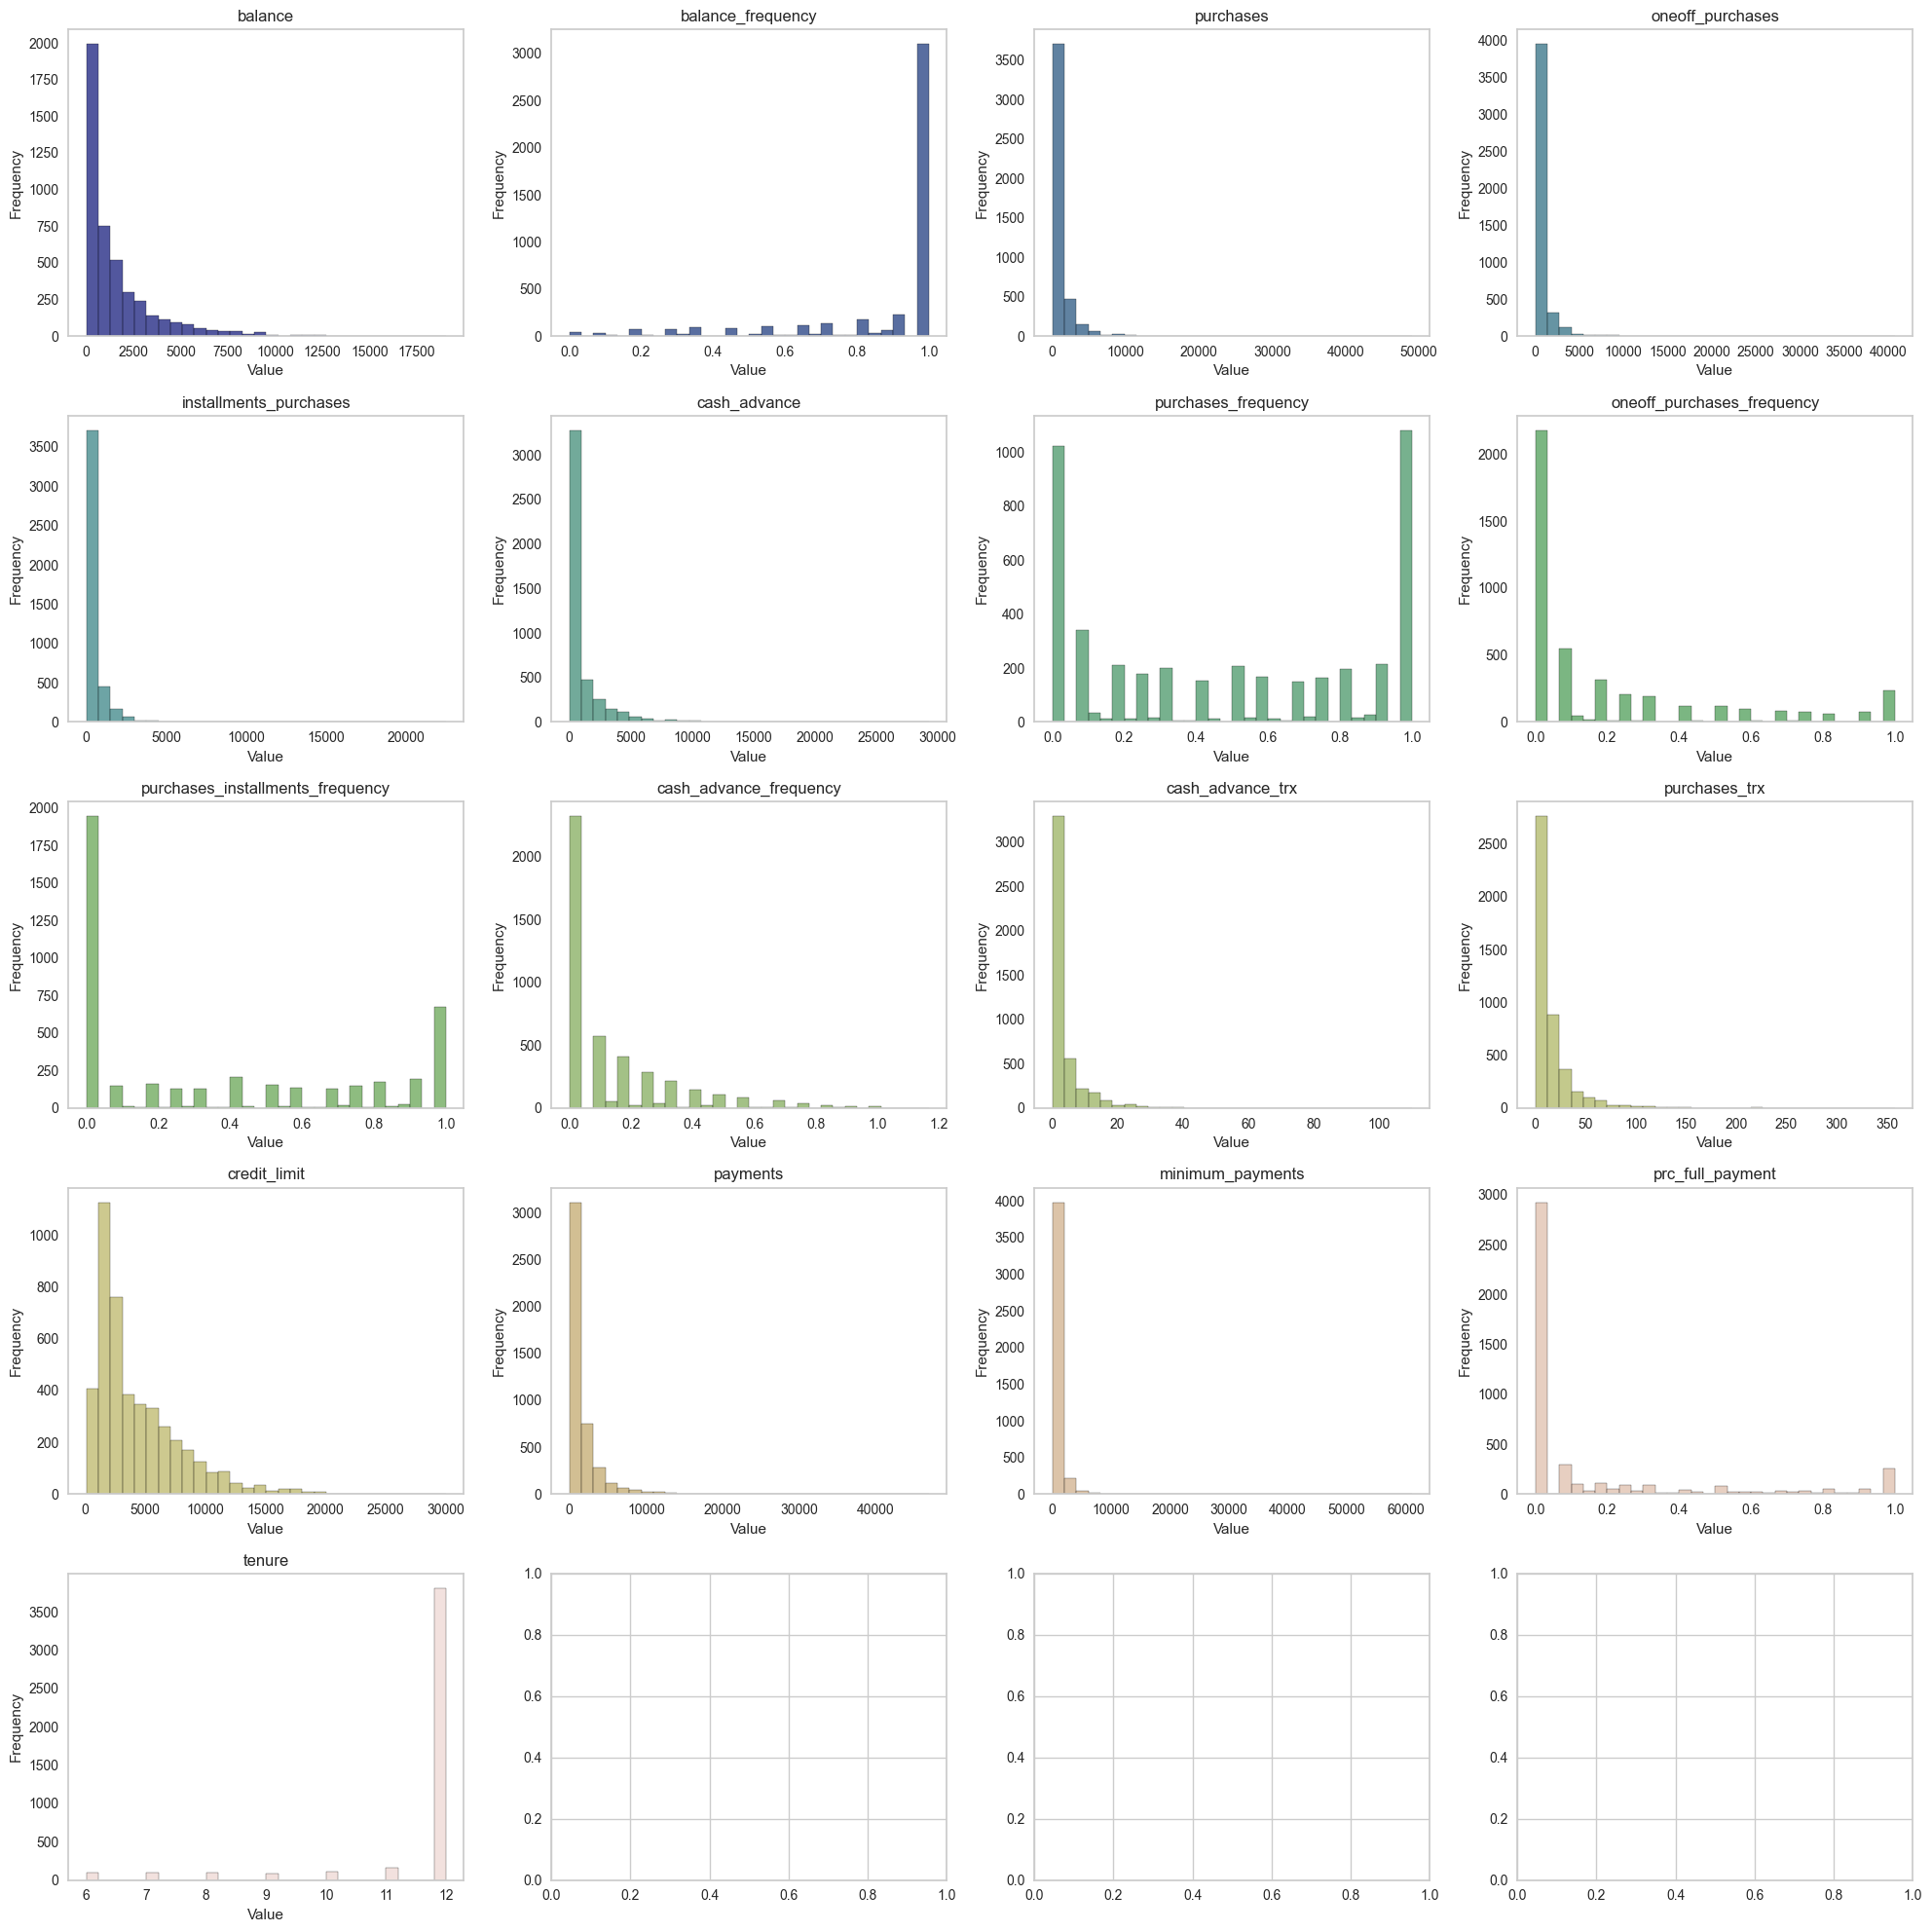

In [14]:
# Visualisasi Data
# Membuat figure dan axes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Memberikan warna pada histogram
palette = sns.color_palette("gist_earth", len(df.columns))

# Melakukan Looping pada setiap kolom dalam DataFrame
for i, col in enumerate(df.columns):
    ax = axes[i]
    df[col].plot.hist(ax=ax, bins=30, color=palette[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.grid(False)

# Menampilkan Histogram
plt.tight_layout()
plt.show()

**Penjelasan:**

**1. Balance:**

pengguna kartu kredit sebagaian besar memiliki saldo berada dibawah $2500.

**2. Balance Frequency**

pengguna kartu kredit sebagain besar memeriksa saldo di akun nya, dapat dilihat bahwa frekuensi paling tinggi pada nilai 1. Hal tersebut menunjukkan bahwa mereke sering memeriksa saldo nya secara teratur.

**3. Purchases**

pengguna kartu kredit cenderung rendah yaitu memiliki jumlah total pembelian sekitar di bawah $5000 dan ada sedikit yang memiliki jumlah total pembelian dalam jumlah yang tinggi.

**4. One-off Purchases** (bayar barang seharga uang cas)

pengguna kartu kredit yang memiliki jumlah total pembelian dalam satu transaksi cenderung rendah yaitu di bawah $5000 dan ada sedikit yang memiliki jumlah total pembelian dalam satu transaksi dalam jumlah yang tinggi.

**5. Installments Purchases**

pengguna kartu kredit yang memiliki jumlah total pembelian secara cicilan cenderung rendah yaitu di bawah $5000 dan ada sedikit yang memiliki jumlah total pembelian secara cicilan dalam jumlah yang tinggi.

**6. Cash Advance**

pengguna kartu kredit memiliki jumlah total penarikan uang tunai cenderung rendah yaitu di bawah $5000 dan ada sedikit yang memiliki jumlah total penarikan uang tunai dalam jumlah yang besar.

**7. Purchases Frequency**

Frekuensi pembelian yang dilakukan pengguna kartu kredit cenderung bervariasi dan menunjukkan tidak semua pengguna kartu kredit sering melakukan pembelian.

**8. One-off Purchases Frequency**

Pembelian yang dilakukan dalam satu transaksi jarang dilakukan oleh pengguna kartu kredit dengan nilai frekuensi sangat rendah.

**9. Purchases Installments Frequency**

Pembelian yang dilakukan dengan cicilan memiliki frekuensi yang rendah, hal ini menunjukkan bahwa sebagian besar pengguna kartu kredit tidak sering melakukan pembelian dengan cicilan.

**10. Cash Advance Frequency**

Penarikan uang tunai memiliki frekuensi yang sangat rendah, hal ini menunjukkan sebagian besar pengguna kartu jarang melakukan penarikan uang tunai.

**11. Cash Advance Trx**

Frekuensi pengguna kartu melakukan transaksi dengan uang tunai sangat rendah, hal ini menunjukkan bahwa sebagian besar pengguna kartu jarang melakukan transaksi dengan uang tunai.

**12. Purchases Trx**

pengguna kartu kredit melakukan pembelian cenderung rendah, hal ini menunjukkna bahwa sebagian pengguna kartu jarang melakukan pembelian.

**13. Credit Limit**

pengguna kartu kredit sebagaian besar memiliki batas kredit yang rendah yaitu berada dibawah $5000.

**14. Payments**

pengguna kartu kredit melakukan pembayaran dengan jumlah yang rendah yaitu dibawah $5000.

**15. Minimum Payments**

pengguna kartu kredit yang melakukan pembayaran minimum cenderung rendah yaitu sebagian besar dibawah $5000.

**16. Prc Full Payment**

Sebagian besar pengguna kartu kredit tidak rutin dalam melakukan pembayaran penuh diketahui dengan grafik pada nilai persentase yang sangat rendah dan hanya sedikit yang melakukan pembayan penuh secara rutin.

**17. Tenure**

pengguna kartu kredit sebagian besar memiliki kartu kredit lebih dari 12 bulan, hal ini menunjukkan bahwa pengguna telah lama menjadi pengguna kartu kredit.



## **b. Analisis Bivariat**

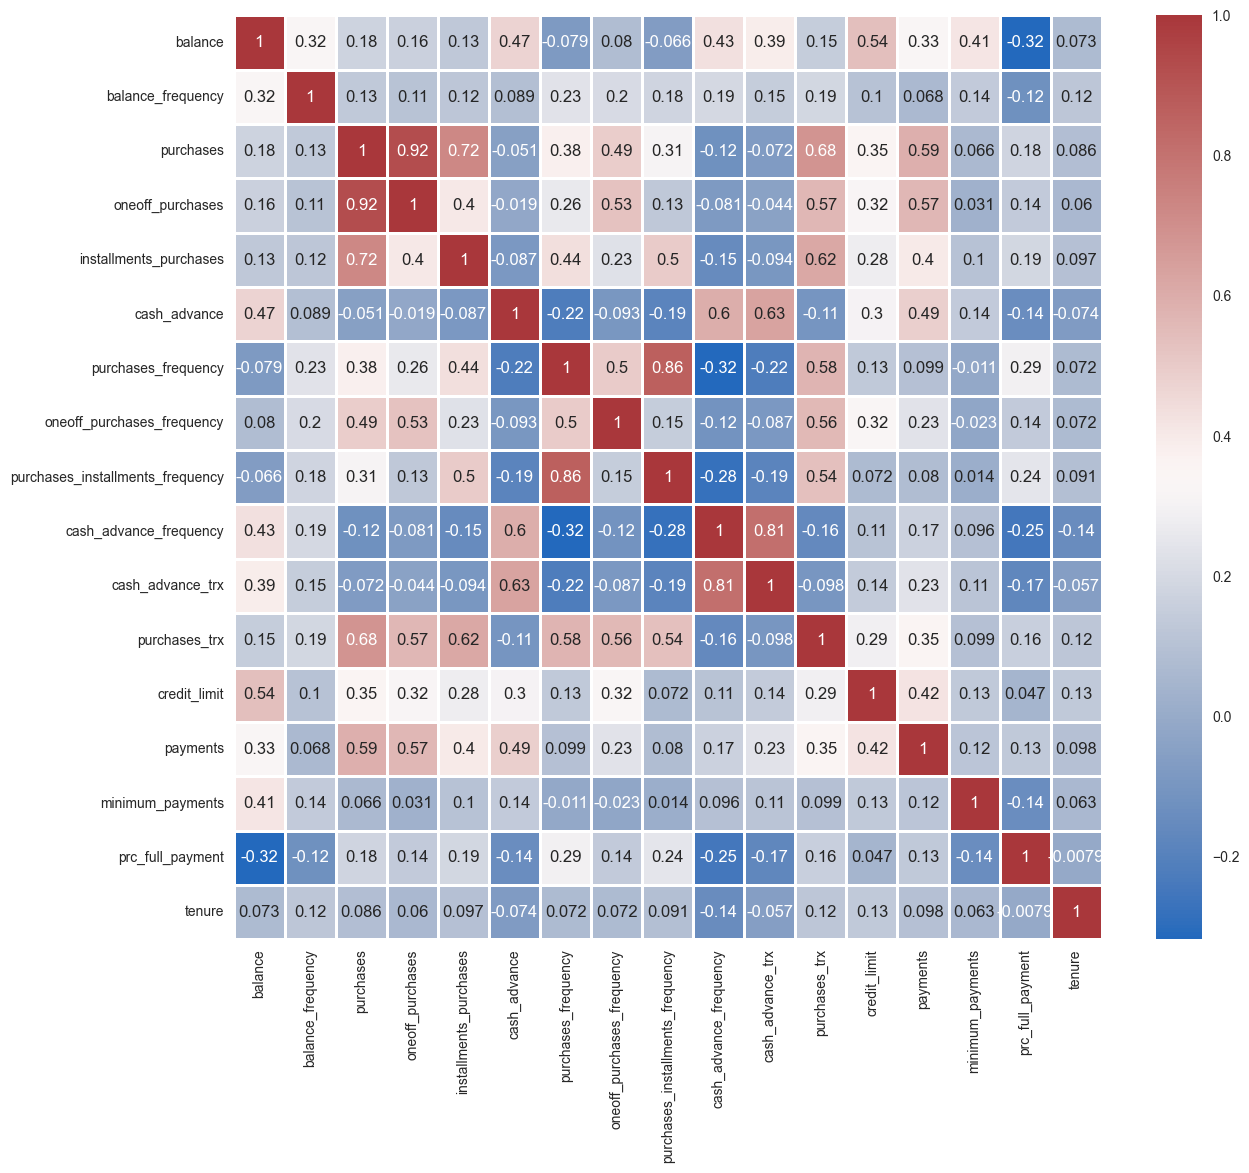

In [15]:
# Mengatur ukuran figur
plt.figure(figsize=(14, 12))

# Membuat heatmap
sns.heatmap(df.corr(), cmap="vlag", annot=True, linewidths=.8)

# Menampilkan heatmap
plt.show()


**Penjelasan:**

`1. Balance`
- Memiliki hubungan positif sedang dengan `cash_advance` (0.47).

- Memilili hubungan positif sedang dengan `cash_advance_frequency` (0.43).
- Memilili hubungan positif sedang dengan `cash_advance_trx` (0.39).
- Memilili hubungan **positif kuat** dengan `credit_limit` (0.54).
- Memilili hubungan positif sedang dengan `minimum_payments` (0.41).
- Memilili hubungan negatif kuat dengan `prc_full_payment` (-0.32). `MASIH BLM YAKIN`

`2. Purchases`
- Memiliki hubungan **positif sangat kuat** dengan `oneoff_purchases` (0.92).

- Memilili hubungan **positif kuat** dengan `installments_purchases` (0.72).
- Memilili hubungan positif sedang dengan `oneoff_purchases_frequency` (0.49).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.68).
- Memilili hubungan **positif kuat** dengan `payments` (0.59).

`3. One-off Purchases`
- Memiliki hubungan **positif sangat kuat** dengan `purchases` (0.92).

- Memilili hubungan **positif kuat** dengan `oneoff_purchases_frequency` (0.53).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.57).
- Memilili hubungan **positif kuat** dengan `payments` (0.57).

`4. Installments Purchases`
- Memiliki hubungan **positif kuat** dengan `purchases` (0.72).

- Memilili hubungan positif sedang dengan `purchases_frequency` (0.44).
- Memilili hubungan positif sedang dengan `purchases_installments_frequency` (0.50).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.62).

`5. Cash Advance`
- Memiliki hubungan positif sedang dengan `balance` (0.47).

- Memilili hubungan **positif kuat** dengan `cash_advance_frequency` (0.60).
- Memilili hubungan **positif kuat** dengan `cash_advance_trx` (0.63).
- Memilili hubungan positif sedang dengan `payments` (0.49).

`6. Purchases Frequency`
- Memiliki hubungan positif sedang dengan `installments_purchases` (0.44).

- Memilili hubungan positif sedang dengan `oneoff_purchases_frequency` (0.50).
- Memilili hubungan **positif sangat kuat** dengan `purchases_installments_frequency` (0.86).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.58).

`7. One-off Purchases Frequency`
- Memiliki hubungan positif sedang dengan `purchases` (0.49).

- Memilili hubungan **positif kuat** dengan `oneoff_purchases` (0.53).
- Memilili hubungan positif sedang dengan `purchases_frequency` (0.50).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.56).

`8. Purchases Installments Frequency`
- Memiliki hubungan positif sedang dengan `installments_purchases` (0.50).

- Memilili hubungan **positif sangat kuat** dengan `purchases_frequency` (0.86).
- Memilili hubungan **positif kuat** dengan `purchases_trx` (0.54).

`9. Cash Advance Frequency`
- Memiliki hubungan positif sedang dengan `balance` (0.43).

- Memilili hubungan **positif kuat** dengan `cash_advance` (0.60).
- Memilili hubungan **positif sangat kuat** dengan `cash_advance_trx` (0.81).

`10. Cash Advance Trx`
- Memiliki hubungan positif sedang dengan `balance` (0.39).

- Memilili hubungan **positif kuat** dengan `cash_advance` (0.63).
- Memilili hubungan **positif sangat kuat** dengan `cash_advance_frequency` (0.81).

`11. Purchases Trx`
- Memiliki hubungan **positif kuat** dengan `purchases` (0.68).

- Memilili hubungan **positif kuat** dengan `oneoff_purchases` (0.57).
- Memilili hubungan **positif kuat** dengan `installments_purchases` (0.62).
- Memilili hubungan **positif kuat** dengan `purchases_frequency` (0.58).
- Memilili hubungan **positif kuat** dengan `oneoff_purchases_frequency` (0.56).
- Memilili hubungan **positif kuat** dengan `purchases_installments_frequency` (0.54).

`12. Credit Limit`
- Memiliki hubungan **positif kuat** dengan `balance` (0.54).

- Memilili hubungan positif sedang dengan `payments` (0.42).

`13. Payments`
- Memiliki hubungan **positif kuat** dengan `purchases` (0.59).

- Memilili hubungan **positif kuat** dengan `oneoff_purchases` (0.57).
- Memilili hubungan positif sedang dengan `cash_advance` (0.49).
- Memilili hubungan positif sedang dengan `credit_limit` (0.42).

`14. Minimum Payments`
- Memiliki hubungan positif sedang dengan `balance` (0.41).


Variabel-variabel di atas menunjukkan hubungan sedang, kuat dan sangat kuat antgara satu sama lain dengan nilai korelasi mendekati 1 (positif). Hasil analisis ini dapat menjadi dasar untuk analisis lebih lanjut pada bagian `Feature Selection`.

# **6. Feature Engineering**

 Feature Engineering merupakansalah satu tahapan yang paling penting untuk melakukan machine learning. Tujuan dari bagian ini untuk meningkatkan kualitas data yang digunakan dalam model machine learning dengan cara mengubah atau mengekstraksi fitur-fitur yang lebih berkualitas dari data mentah. Berikut langkah-langkah dari `Feature Engineering`:

## **6.1 Handling Missing Value**


#### ***Missing Completely at Random (MCAR)***

In [16]:
# Cek apakah ada data Missing Value
print(f'Jumlah Missing Values : {df.isnull().sum()}')

Jumlah Missing Values : balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    158
prc_full_payment                      0
tenure                                0
dtype: int64


**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui pada DataFrame ini memiliki data `missing value` yaitu pada kolom `credit limit` sebanyak 1 baris dan kolom `minimum payments` sebanyak 158 baris sehingga akan dilakukan `handling missing value` dengan `Missing Completely at Random (MCAR)`


In [17]:
df.dropna(subset=['credit_limit', 'minimum_payments'], inplace=True)
df


balance  balance_frequency  purchases  oneoff_purchases  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      installments_purchases  cash_advance  purchases_frequency  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      oneoff_purchases_frequency  purchases_installments_frequency  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  
1      215.325023        410.484825          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
5      343.102984        712.986387          0.000000       8  
7       57.266292         56.720210          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039

**Penjelasan:**

- Missing value yang hilangnya tidak terkait dengan variabel lain dalam kumpulan data. Dengan kata lain, kejadian hilangnya benar-benar bersifat acak. Dalam hal ini, semua data yang lengkap digunakan untuk analisis, sementara data dengan nilai yang kosong akan di buang atau di drop

## **6.2 Handling Outlier**



In [18]:
# Container kolom data tidak berdistribusi normal
data_skewed = []
kolom_skewed = []

# Container kolom data  berdistribusi normal
data_normal = []
kolom_normal = []

# Looping di setiap kolom numerik untuk memasukkan data kedalam distribusi normal atau tidak normal
for column in df:
    skewness = df[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        kolom_normal.append(column)
        data_normal.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        kolom_skewed.append(column)
        data_skewed.append([column, skewness])

**Penjelasan:**

- Langkah awal yang dilakukan yaitu mengetahui distribusi data setiap kolom untuk menentukan metode apa yang digunakan saat penanganan outlier.

- Kode diatas untuk mengidentifikasi distribusi data setiap kolom  dengan metode skew() dan looping (for), diketahui bahwa:

    `Jika nilai skewness kurang dari sama dengan 0.5 dan lebih dari sama dengan -0.5 maka data berdistribusi normal.`
    
    `Jika nilai skewness kurang dari -0.5 atau lebih besar dari 0.5  maka data tidak berdistribusi normal.`




In [19]:
# Menampilkan kolom dengan data berdistribusi normal
print('Kolom dengan Data Berdistribusi Normal')
pd.DataFrame(data=data_normal, columns=['Kolom Distribusi Normal', 'Nilai skewness'])

Kolom dengan Data Berdistribusi Normal


Kolom Distribusi Normal  Nilai skewness
0               purchases_frequency        0.035642
1  purchases_installments_frequency        0.486577

**Penjelasan:**

- Berdasarkan tabel tersebut, terdapat kolom `purchases_frequency` dan `purchases_installments_frequency` dengan data berdistribusi normal ( skewness <= 0.5 dan >= -0.5). `Oleh karena itu, penanganan outlier dilakukan dengan metode Gaussian menggunakan modul winorizer`.

- Metode Gaussian di winorizer digunakan untuk menangani outlier dengan mengganti nilai ekstrim dengan nilai dari distribusi Gaussian. Metode  ini mengubah nilai-nilai yang berada di luar kisaran nilai tertentu menjadi nilai-nilai yang berada di batas atas (*upper bound*) atau batas bawah (*lower bound*) dari distribusi Gaussian.

In [20]:
# Menampilkan kolom dengan data tidak berdistribusi normal
print('Kolom dengan Data Tidak Berdistribusi Normal')
pd.DataFrame(data=data_skewed, columns=['Kolom Skewed', 'Nilai Skewness'])

Kolom dengan Data Tidak Berdistribusi Normal


Kolom Skewed  Nilai Skewness
0                      balance        2.440901
1            balance_frequency       -2.083168
2                    purchases        8.902272
3             oneoff_purchases       10.045515
4       installments_purchases        8.030305
5                 cash_advance        4.713175
6   oneoff_purchases_frequency        1.494505
7       cash_advance_frequency        1.788835
8             cash_advance_trx        4.722877
9                purchases_trx        4.429897
10                credit_limit        1.525379
11                    payments        5.987445
12            minimum_payments       12.356758
13            prc_full_payment        1.854400
14                      tenure       -2.996978

**Penjelasan:**

- Berdasarkan tabel tersebut, terdapat kolom `balance`, `balance_frequency`, `purchases`, `oneoff_purchases`, `installments_purchases`, `cash_advance`, `oneoff_purchases_frequency`, `cash_advance_frequency`, `cash_advance_trx`, `purchases_trx`, `credit_limi`, `payments`, `minimum_payments`, `prc_full_payment`, dan `tenure` dengan data tidak berdistribusi normal (skewness > 0,5 dan < -5). `Oleh karena itu, penanganan outlier dilakukan dengan IQR yang menggunakan modul winorizer`.


- Metode IQR (Rentang Interkuartil) di winorizer digunakan untuk menangani outlier dalam data dengan mempertimbangkan kisaran nilai antara kuartil bawah (Q1) dan kuartil atas (Q3) dari distribusi data.


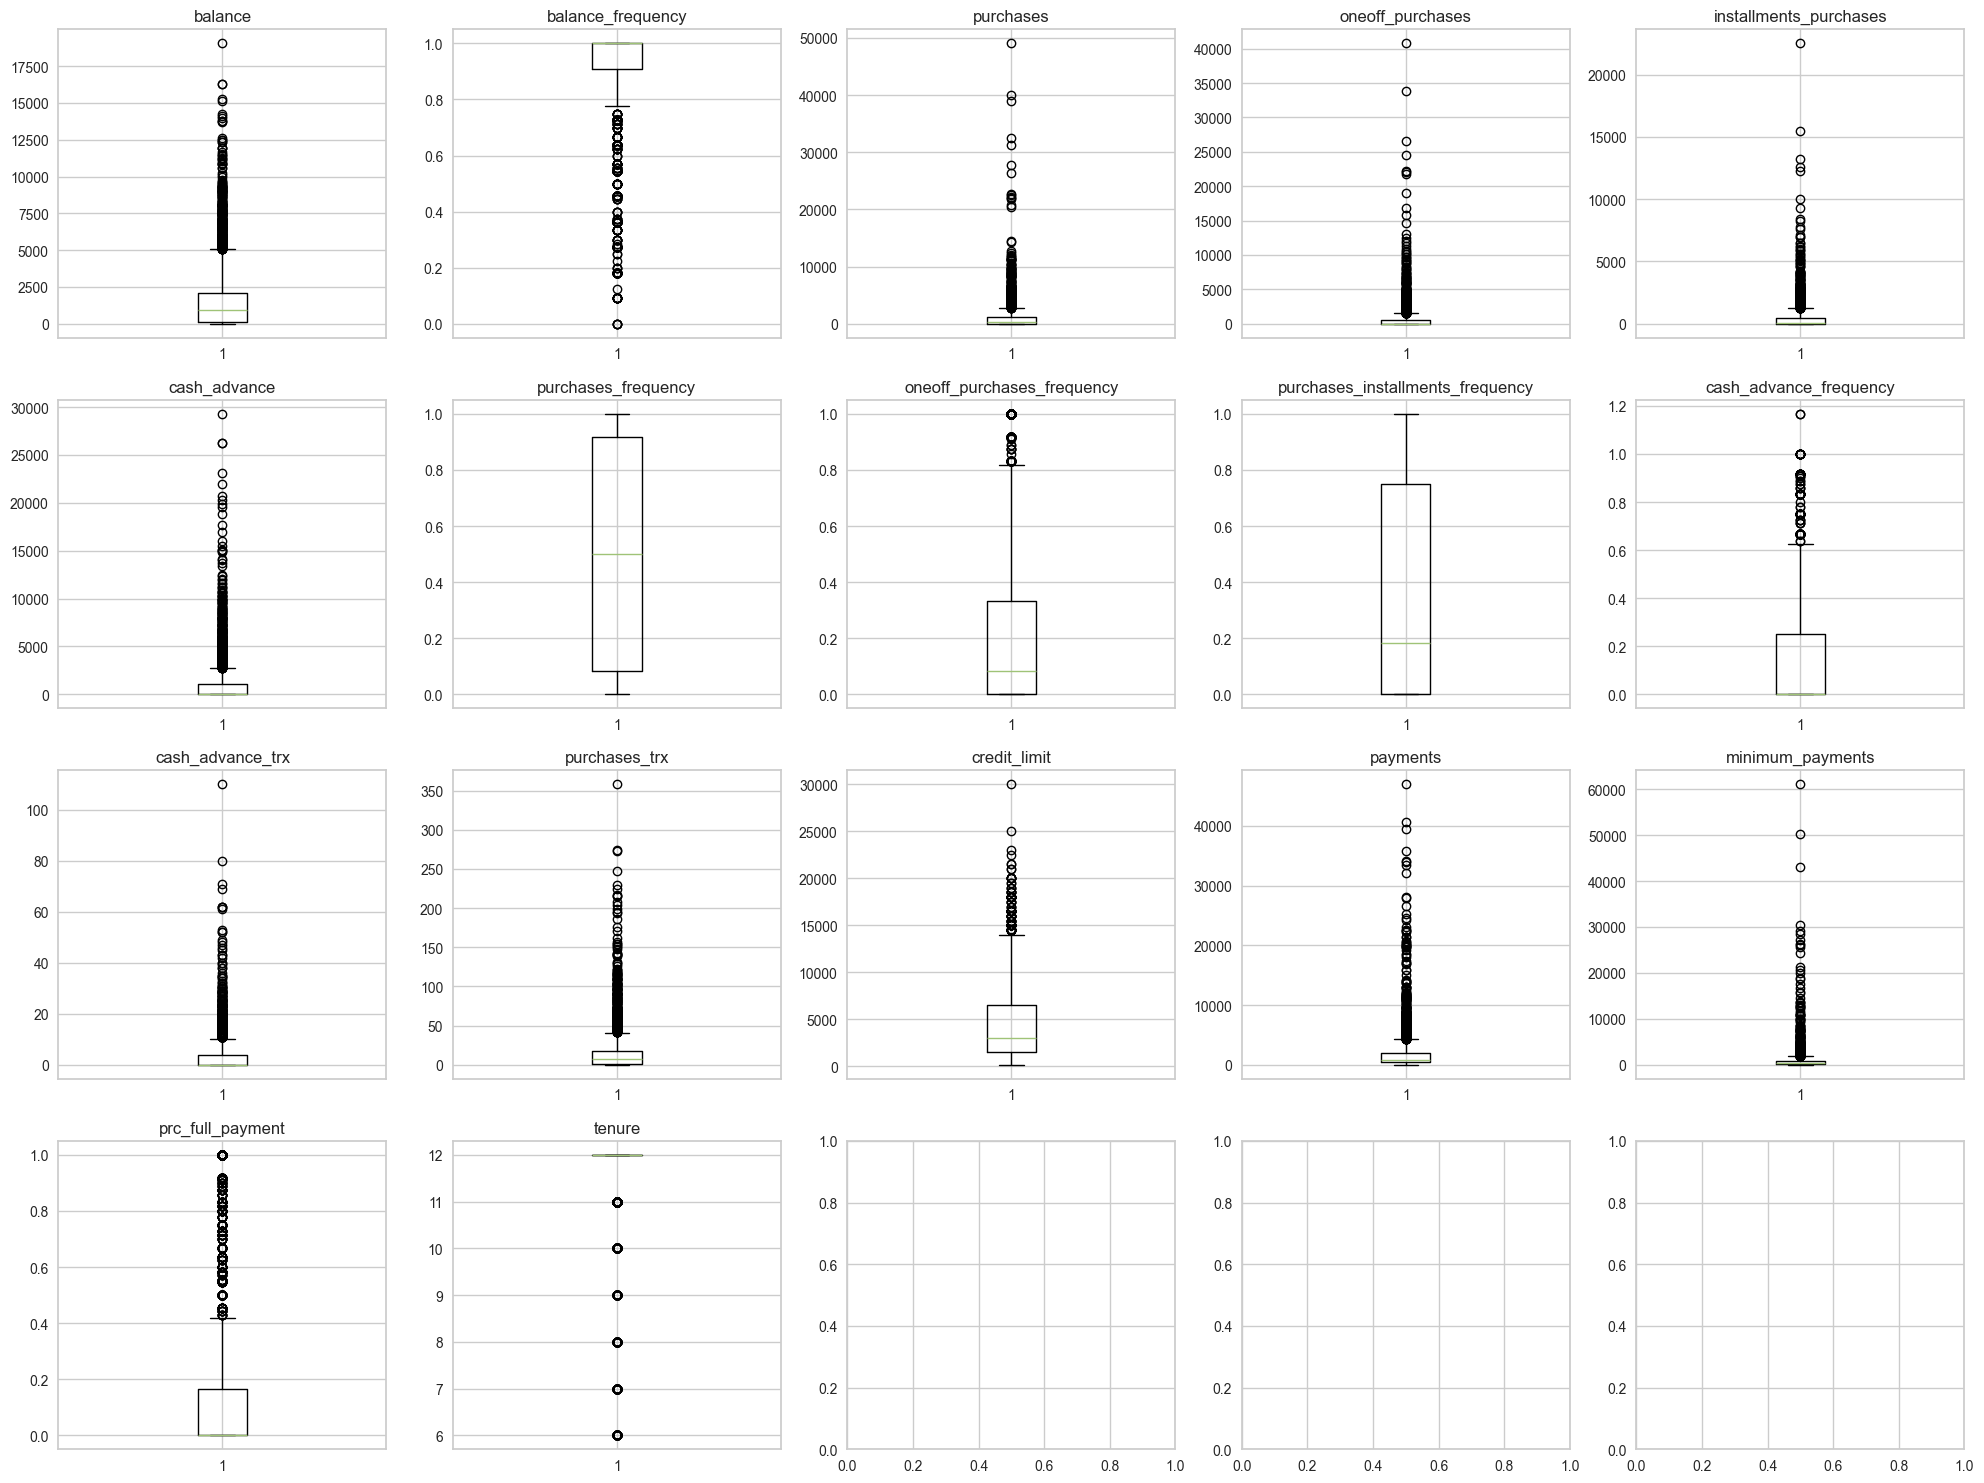

In [21]:
# Menampilkan visualisasi data mengenai outlier pada data
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
axes = axes.flatten()

# Melakukan iterasi untuk setiap kolom numerik
for i, column in enumerate(df):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

plt.tight_layout()

plt.show()

**Penjelasan:**

Berdasarkan visualisasi data tersebut, diketahui bahwa :
- Kolom `purchases_frequency` dan `purchases_installments_frequency` yang tidak memiliki nilai outlier karena data berdistribusi normal.
- Kolom `balance`, `balance_frequency`, `purchases`, `oneoff_purchases`, `installments_purchases`, `cash_advance`, `oneoff_purchases_frequency`, `cash_advance_frequency`, `cash_advance_trx`, `purchases_trx`, `credit_limi`, `payments`, `minimum_payments`, `prc_full_payment`, dan `tenure`memiliki nilai outlier karena data tidak berdistribusi normal.

### ***a. Capping or Censoring Method***

Metode ini digunakan untuk menangani outlier dengan membatasi distribusi data dengan menetapkan batas atas _(upper bound)_ atau batas bawah _(lower bound)_ untuk nilai-nilai data. Dengan metode ini dapat mempertahankan jumlah sampel karena nilai outlier nya hanya dibatasi dan tetap dipertahankan dalam dataset sehingga menghindari kehilangan informasi yang mungkin penting.

In [22]:
# menentukan kolom yang memiliki low variation
low_var_cols_skewed = ['tenure']

# Menghapus kolom yang memiliki low variation dari kolom skewed
for column in low_var_cols_skewed:
    kolom_skewed.remove(column)

**Penjelasan:**

Kode tersebut untuk mengeluarkan kolom dengan variasi rendah dari kolom data yang tidak berdistribusi normal untuk tidak diikutsertakan handling outlier. Hal ini karena rentang nilai nya tidak terlalu jauh dari mean/median sehingga tidak diperlukan handling outlier dan memfokuskan handling outlier untuk high variation.



##### **Capping Untuk Distribusi Normal**

In [23]:
# Metode Capping Data Distribusi Normal
winsorizer_dist_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_normal,
                            missing_values='ignore')  # Mengabaikan nilai missing value

# Melakukan fitting dan transforming pada kolom berdistribusi normal
data_capped = winsorizer_dist_normal.fit_transform(df)


**Penjelasan:**

Kode tersebut menangani outlier dengan `metode Gaussian` dengan nilai `fold = 3
` untuk kolom data yang berdistribusi normal.


##### **Capping Untuk Tidak Distribusi Normal**

In [24]:
# Metode Capping Data Tidak Distribusi Normal
winsorizer_skewed = Winsorizer(capping_method='iqr',
                               tail='both',
                               fold=1.5,
                               variables=kolom_skewed,
                               missing_values='ignore')

# Melakukan fitting dan transforming pada kolom tidak berdistribusi normal
data_capped = winsorizer_skewed.fit_transform(df)

**Penjelasan:**

Kode tersebut menangani outlier dengan `metode iqr` dengan nilai `fold=1.5` untuk kolom data yang tidak berdistribusi normal.


In [25]:
# Menambahkan kembali kolom-kolom dengan low variation ke dalam kolom skewed
for column in low_var_cols_skewed:
    kolom_skewed.append(column)


**Penjelasan:**

Setelah kolom dengan varian rendah dikembalikan ke kolom dengan data yang tidak berdistribusi normal, maka dilakukan pembuatan visualisasi data dan analisis lebih lanjut.

### ***Visualisasi Data Setelah di Handling Outlier***

In [26]:
sns.set_theme()

# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling

    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot

    Example:
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

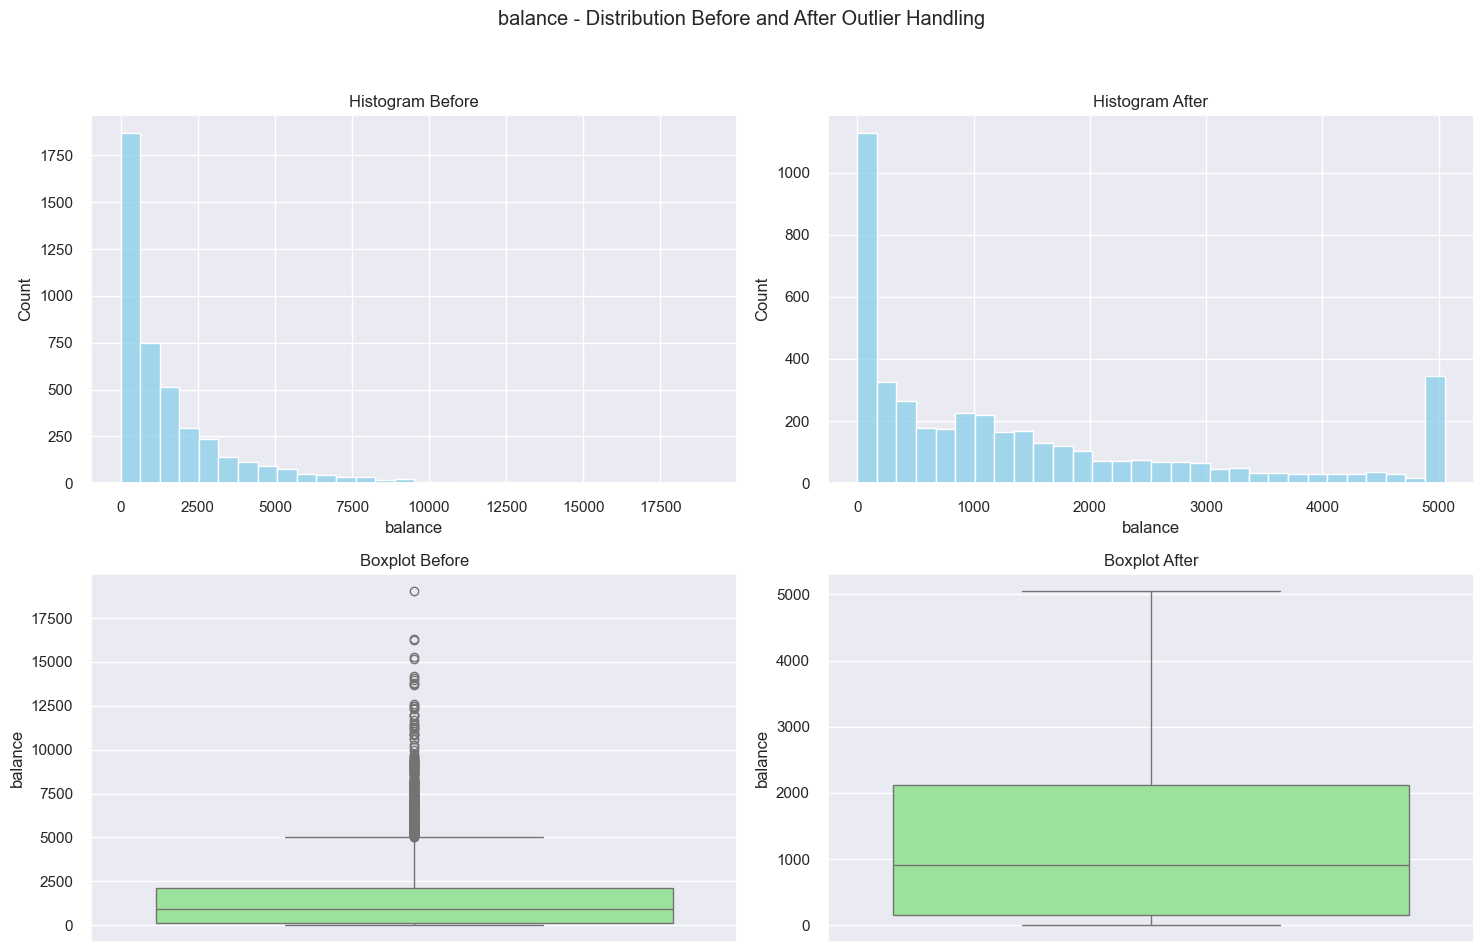

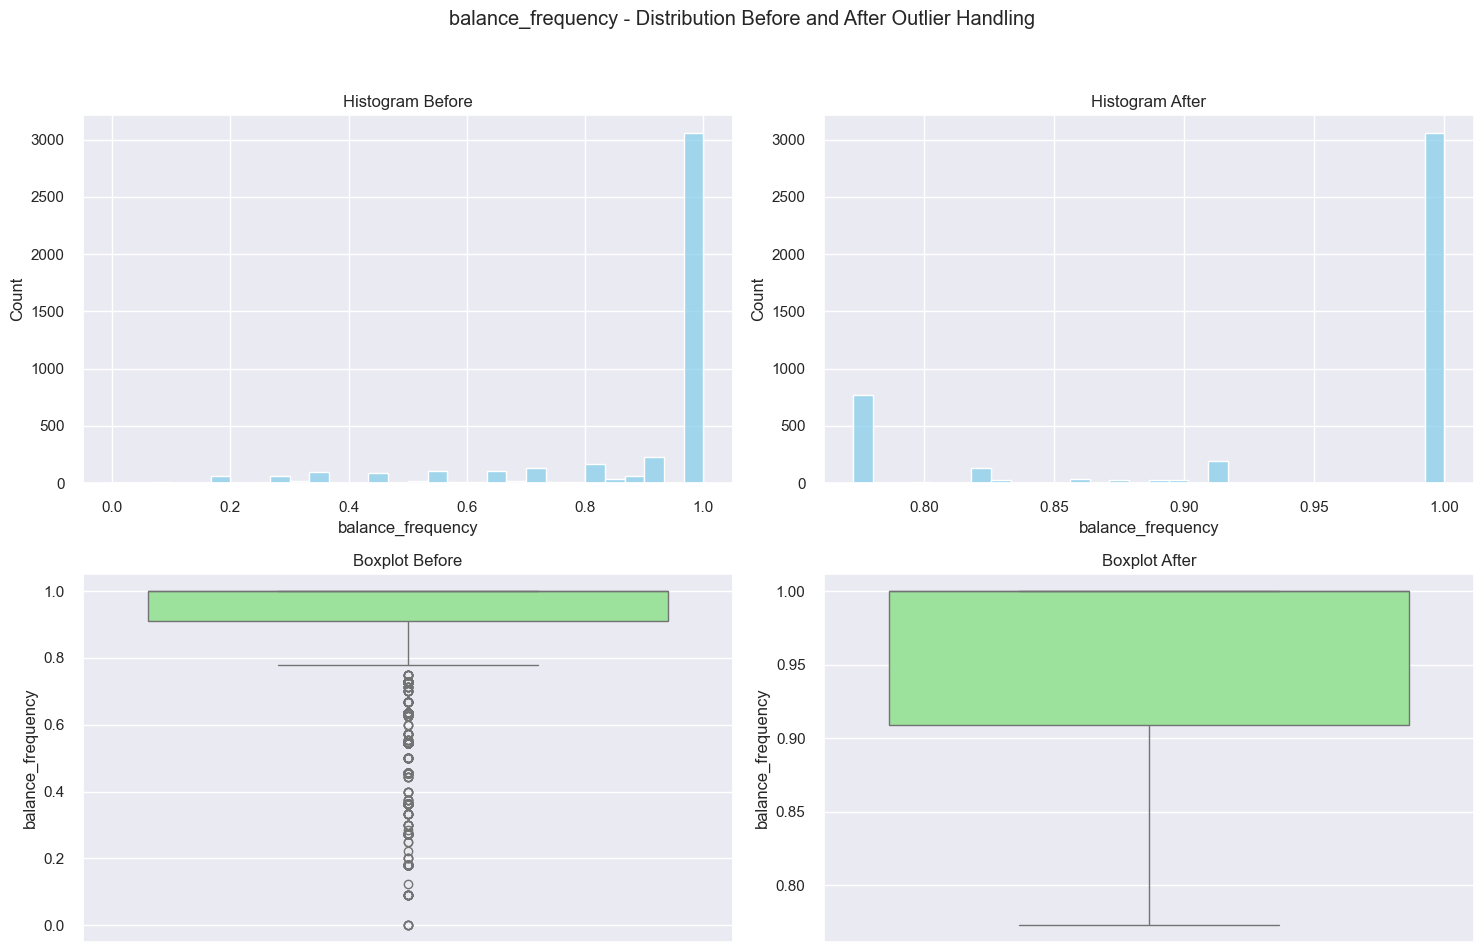

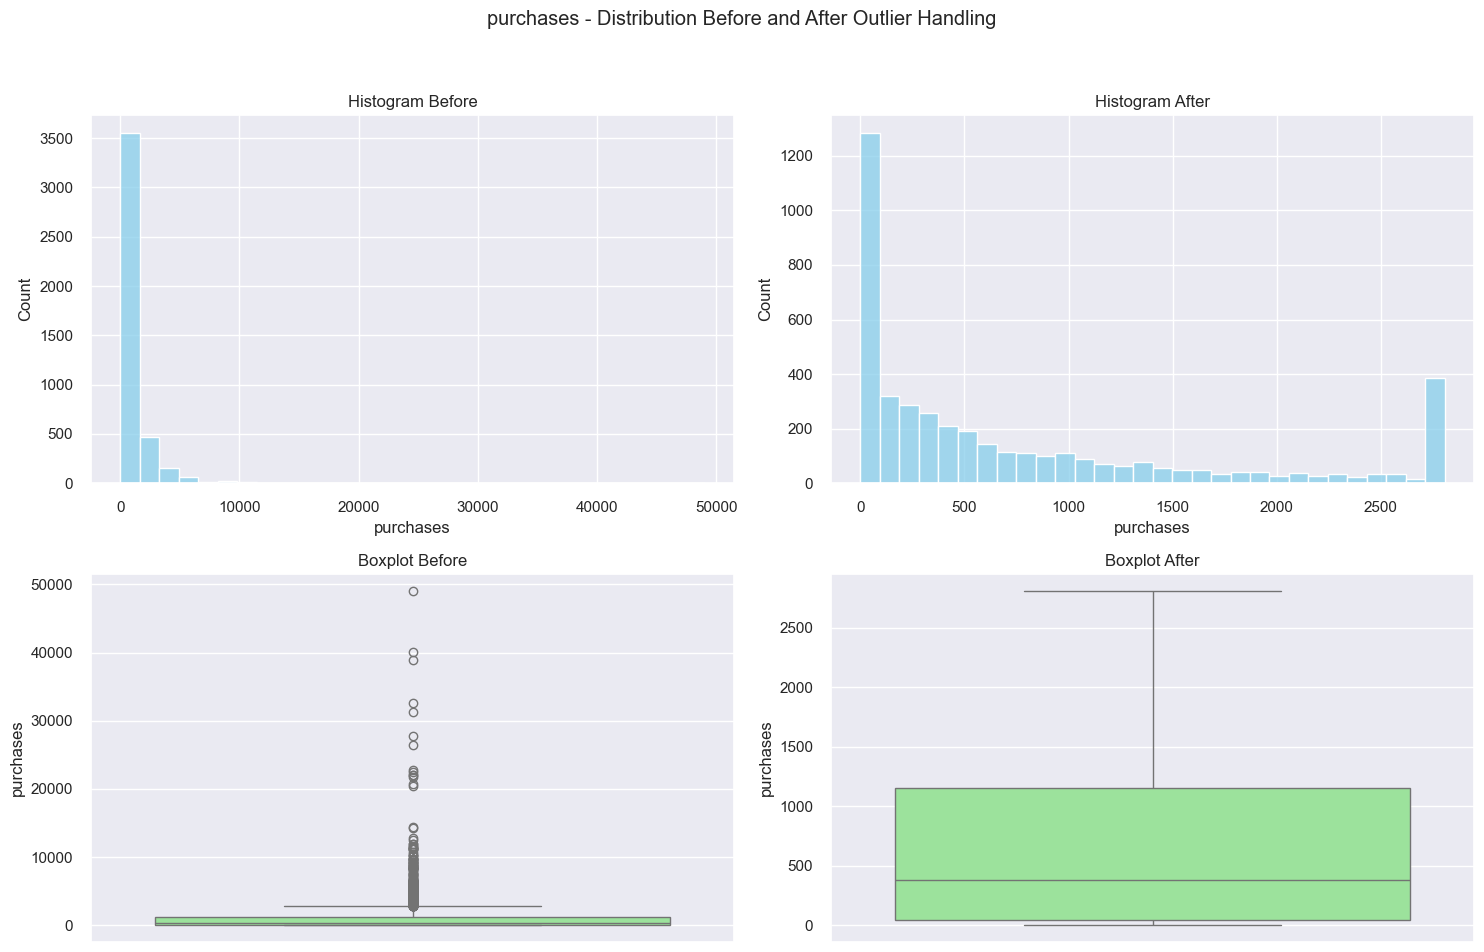

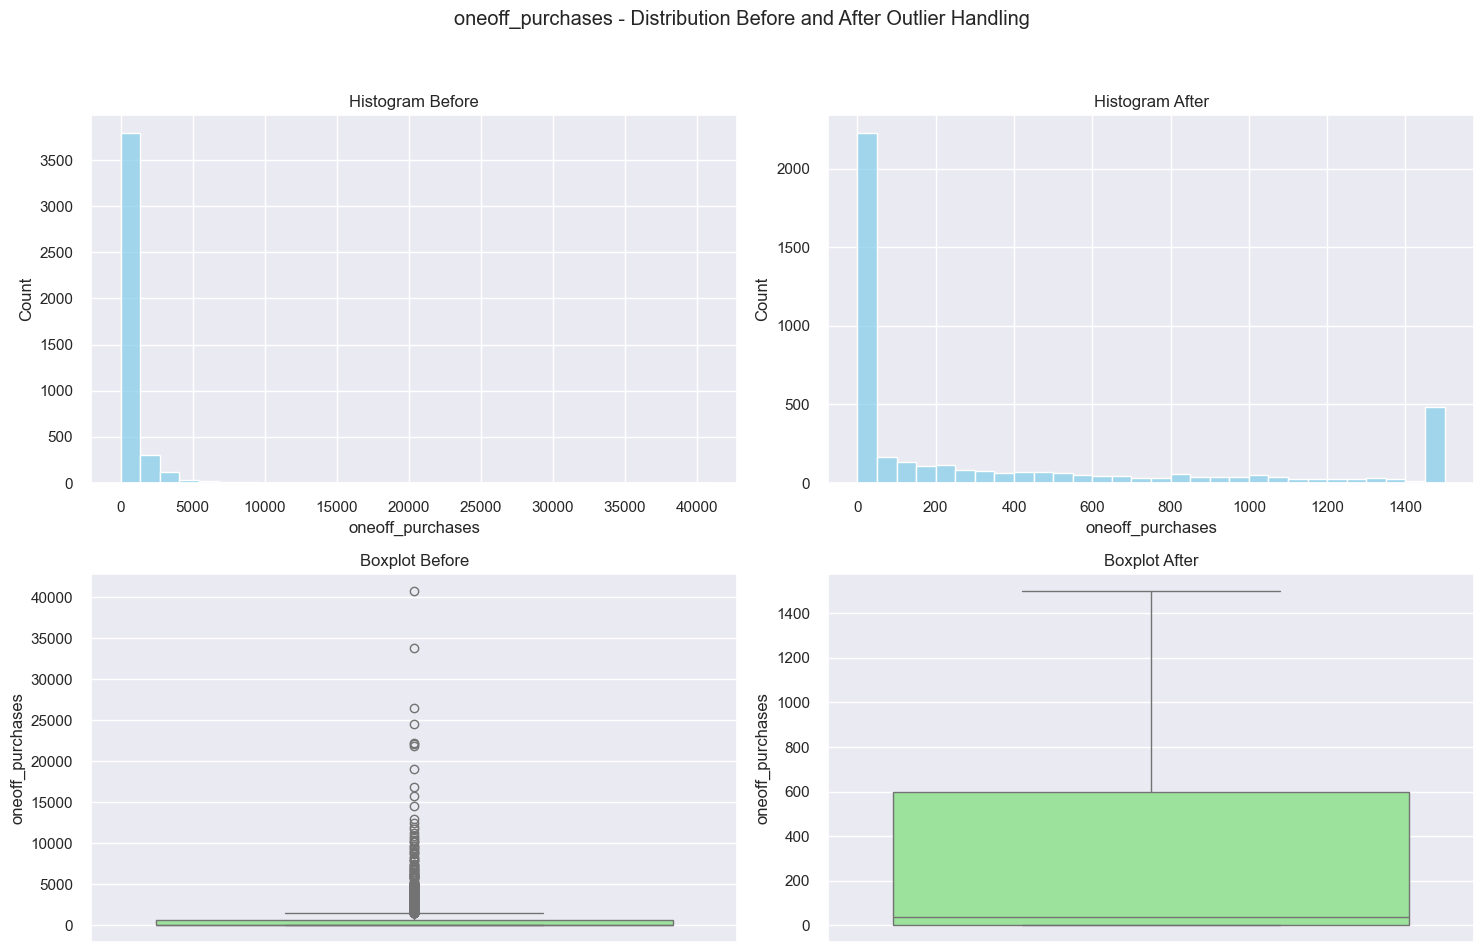

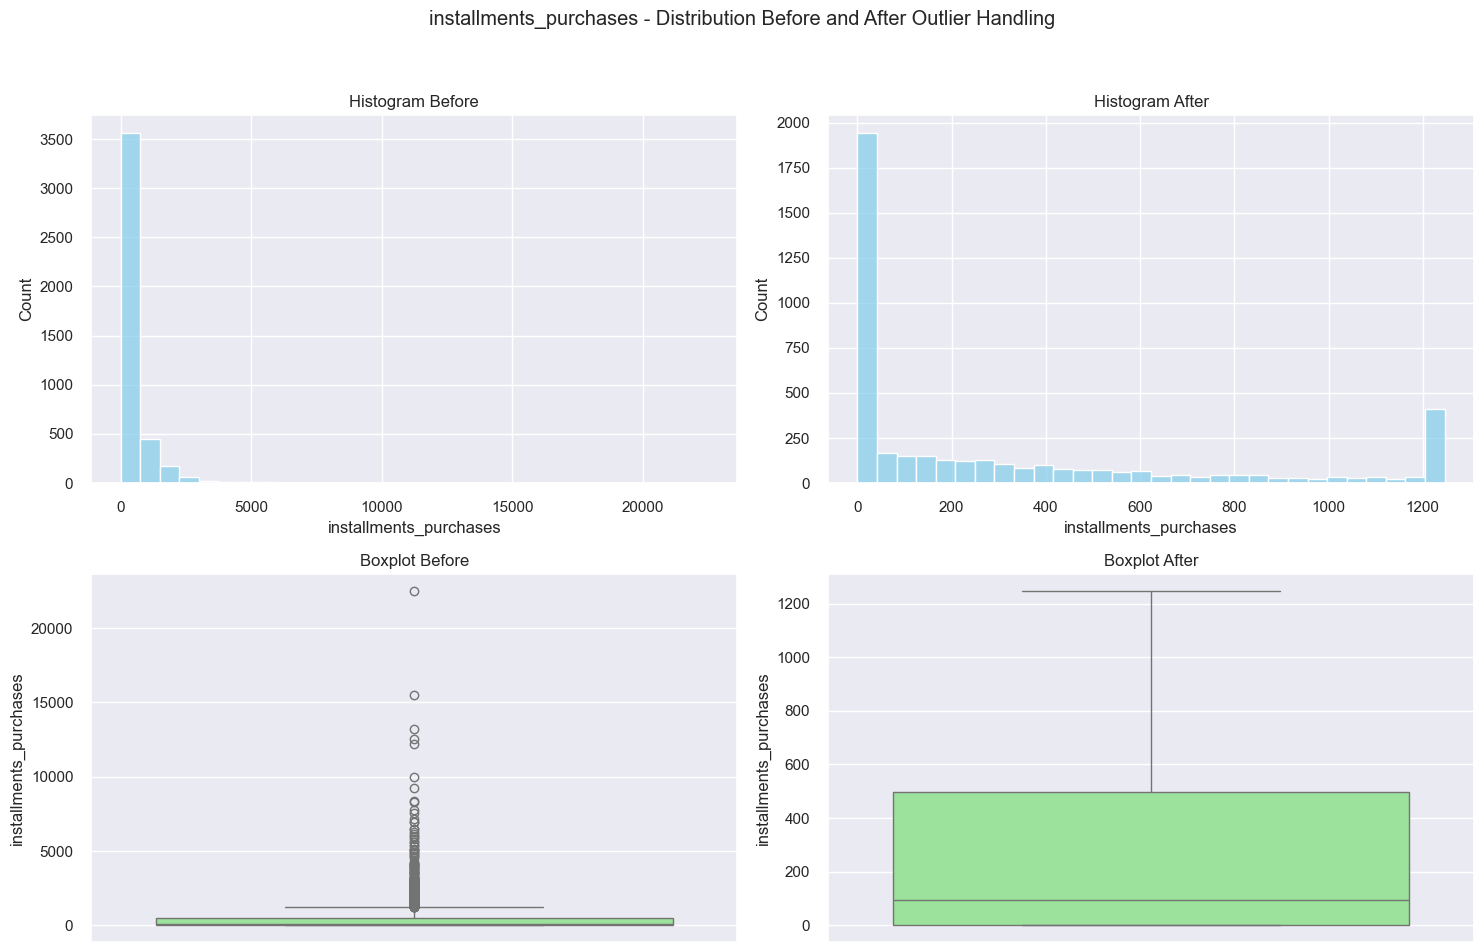

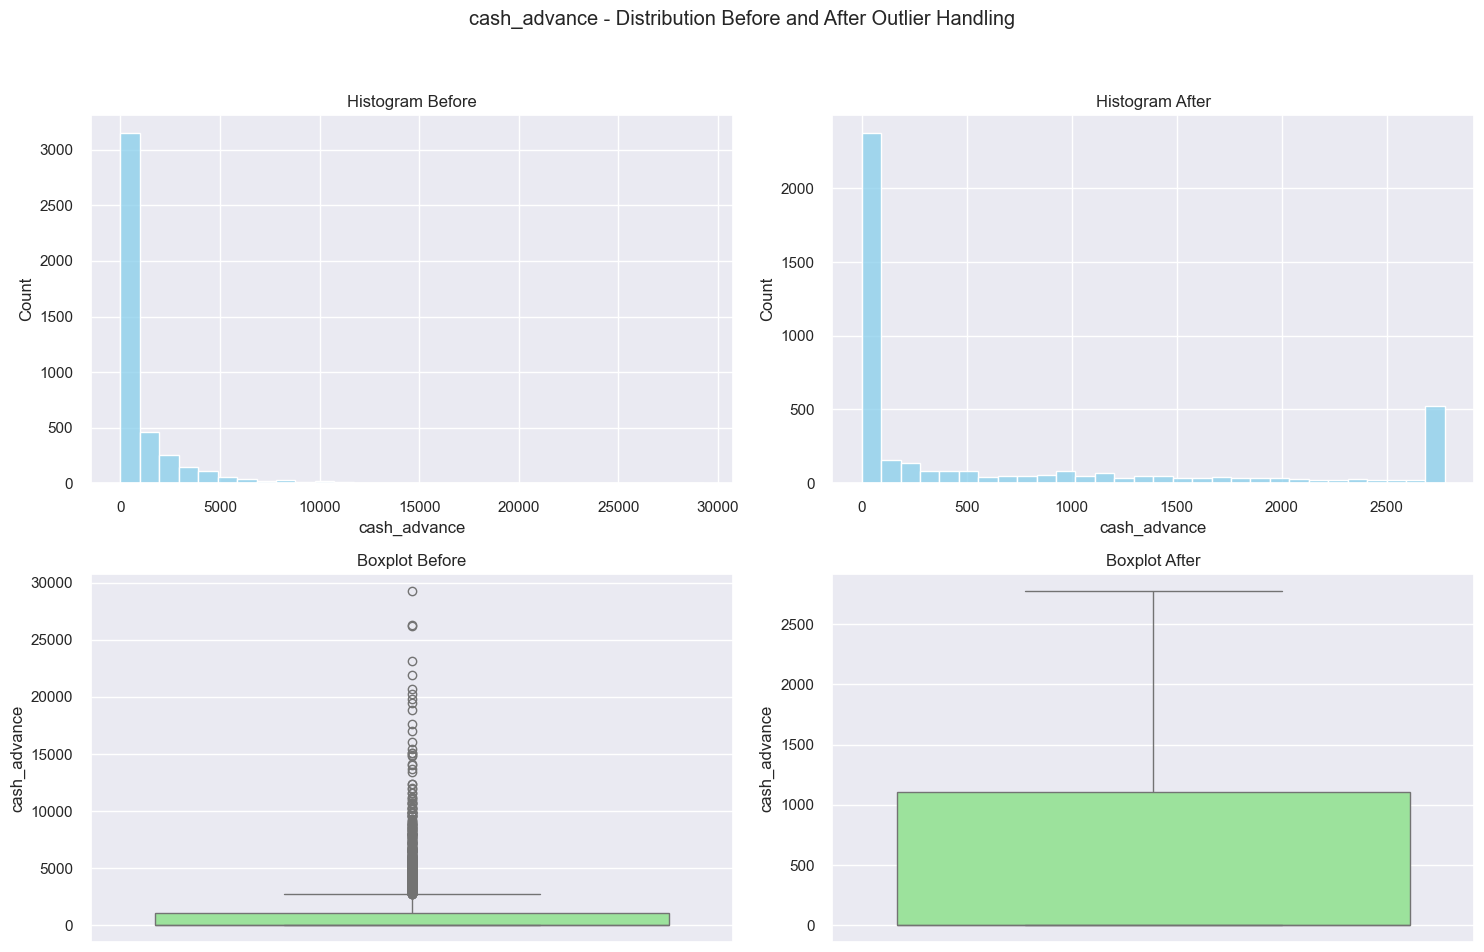

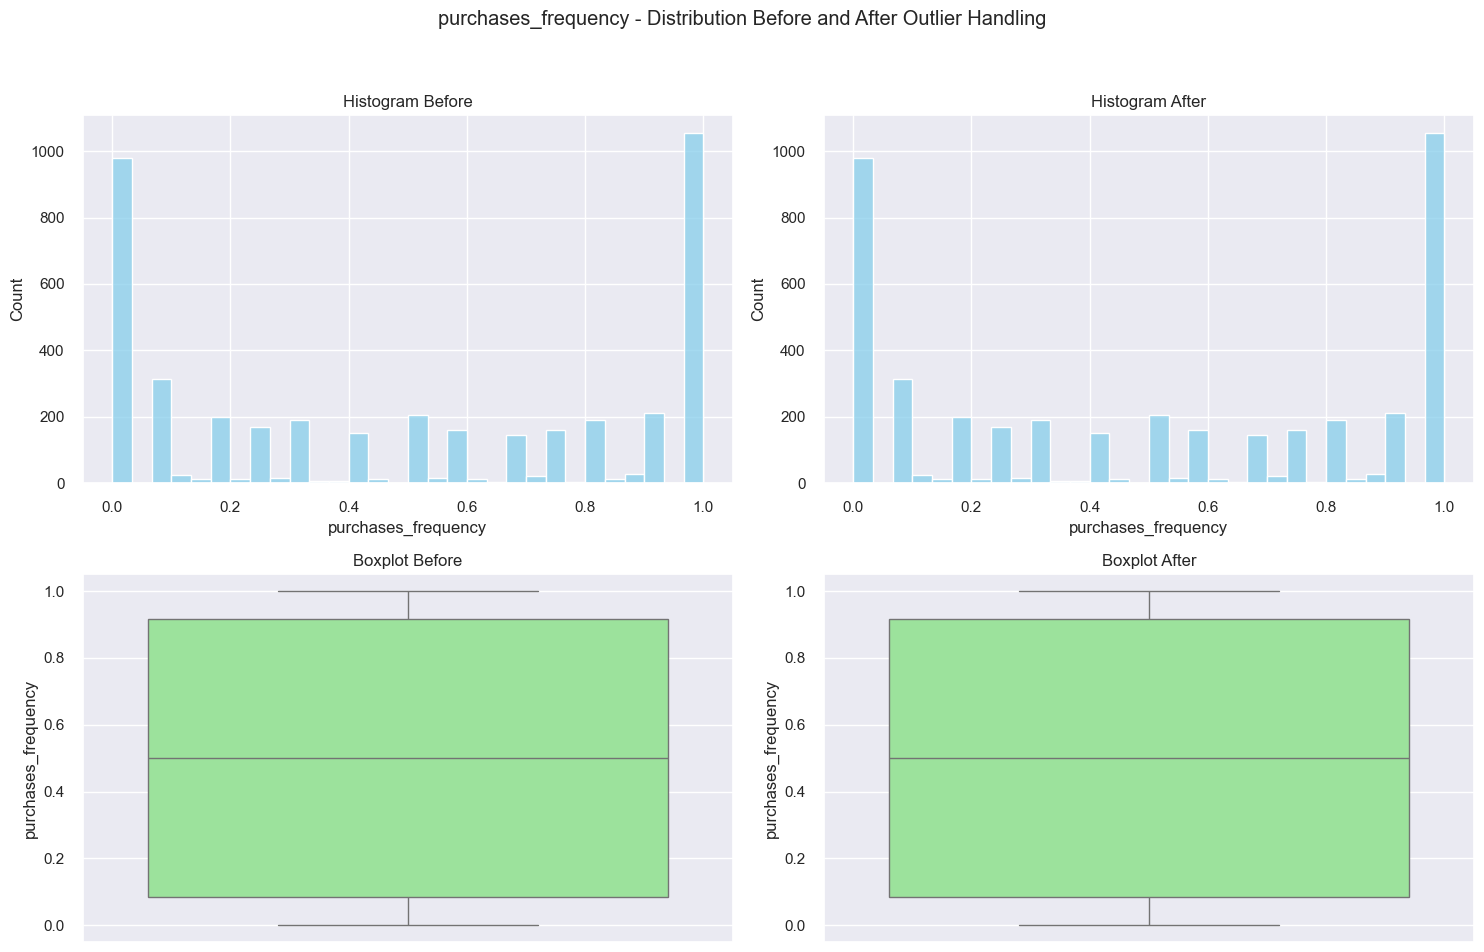

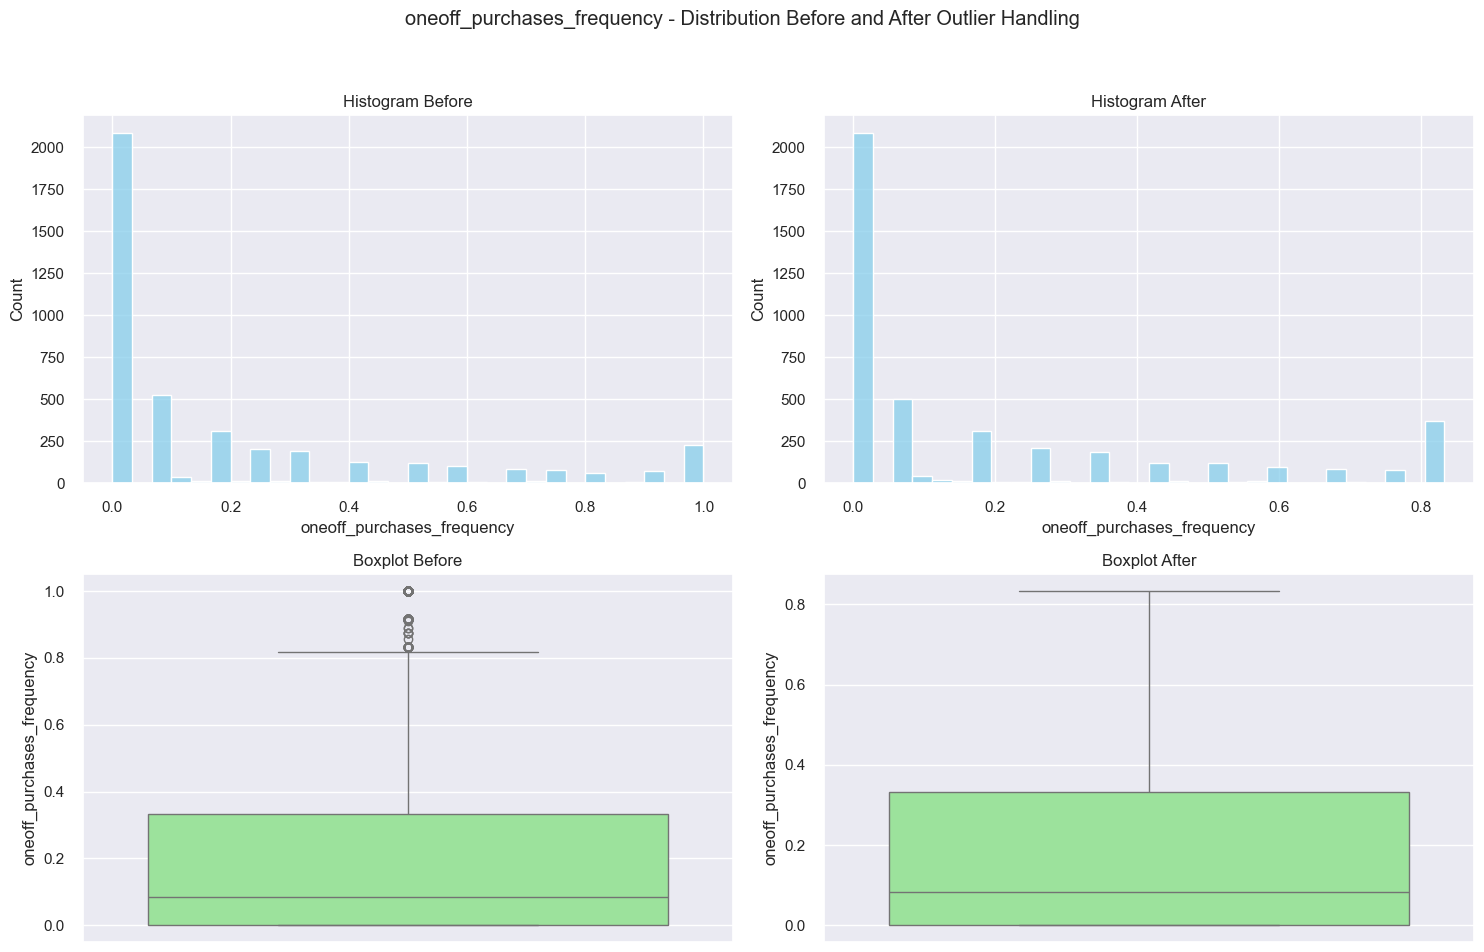

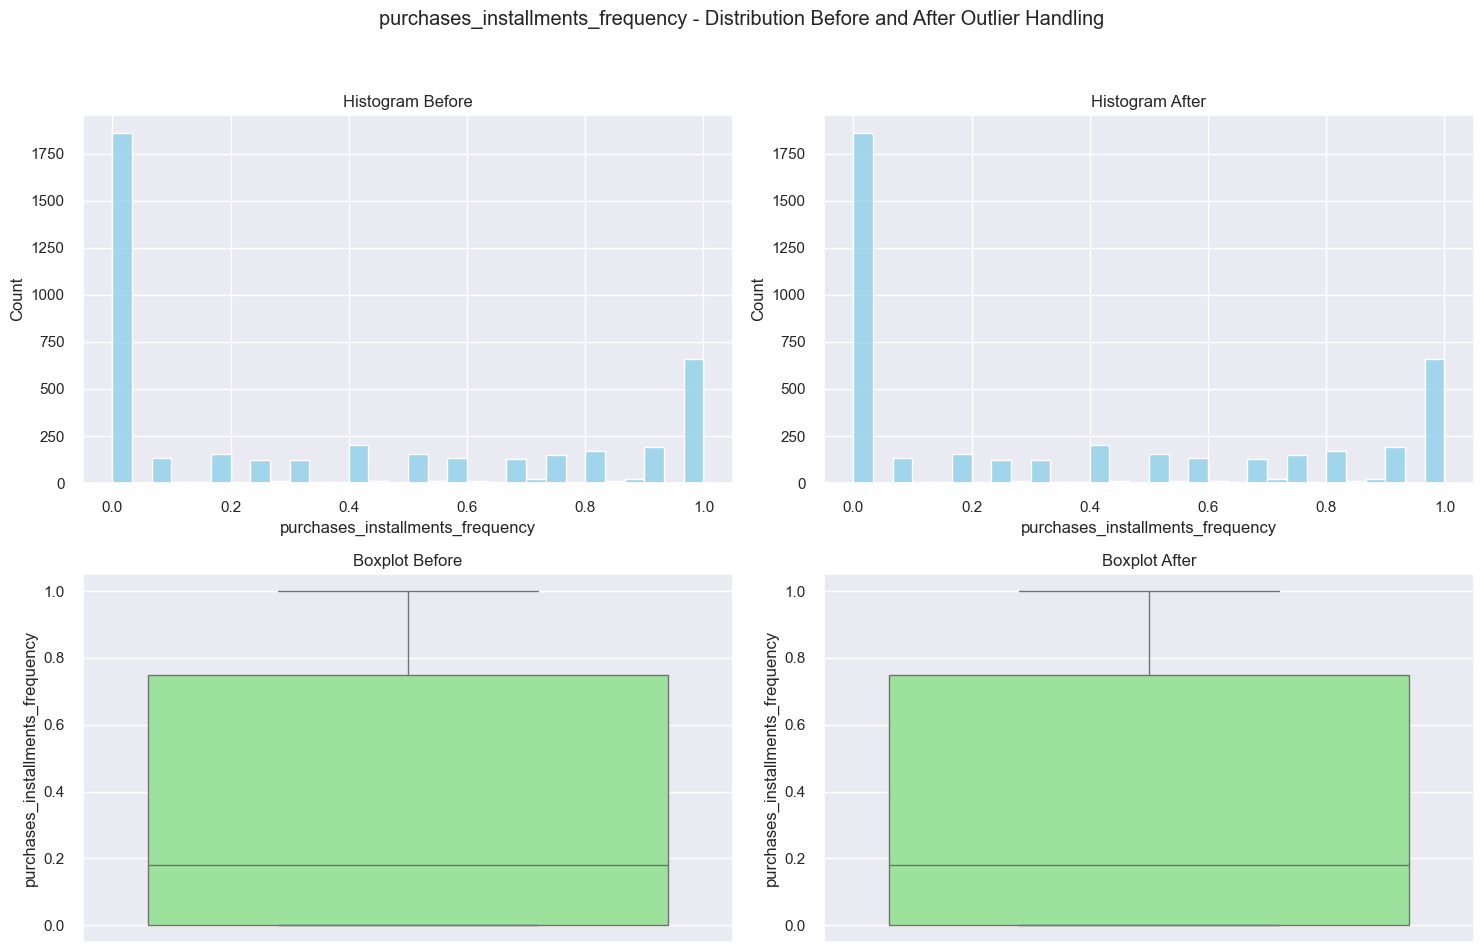

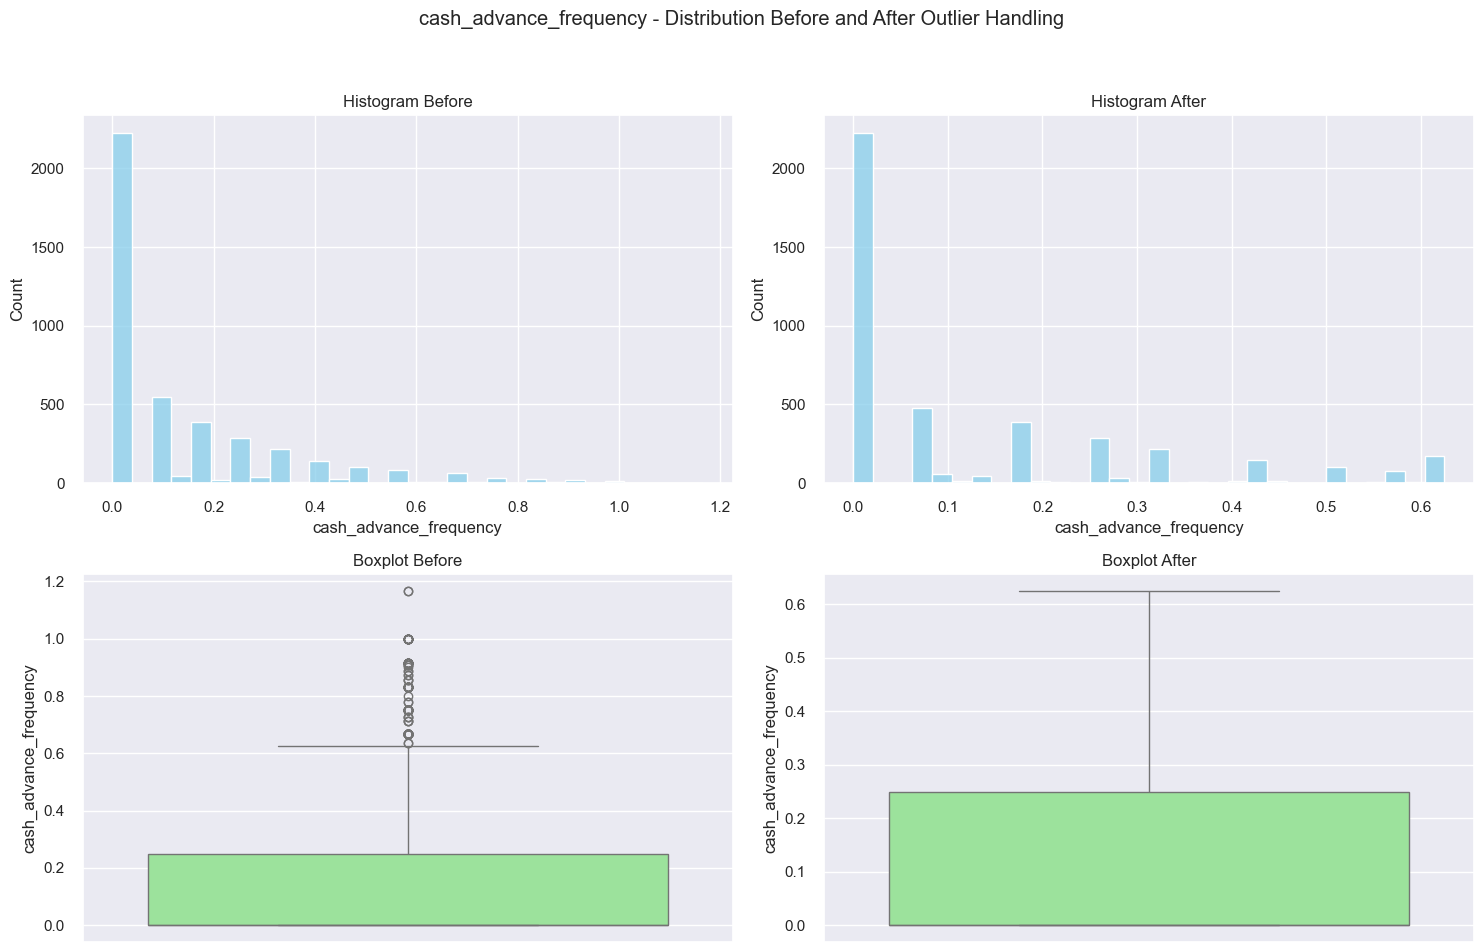

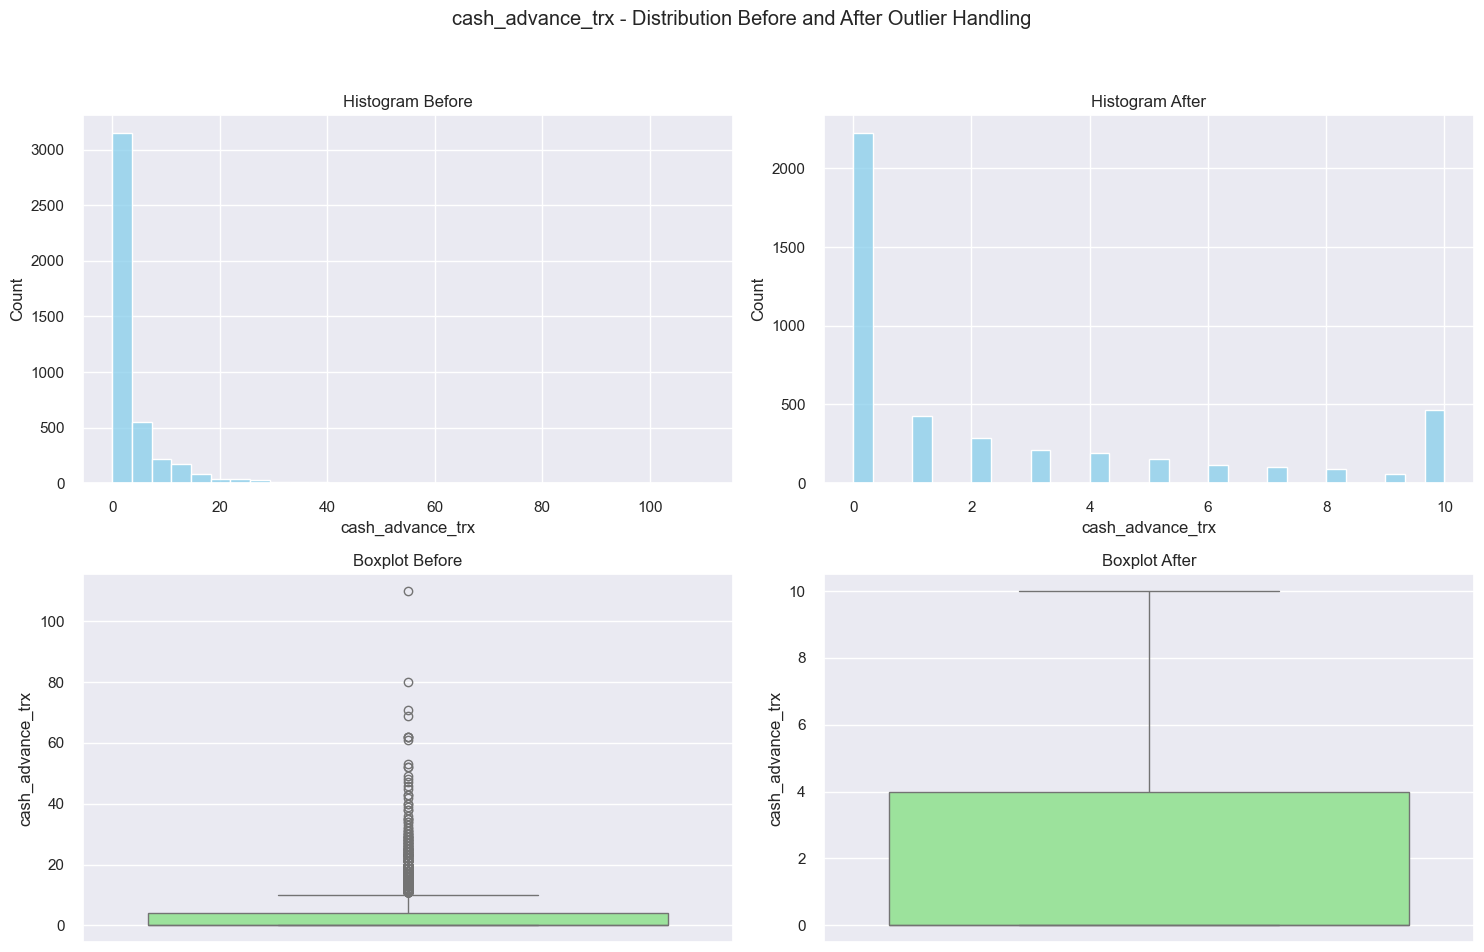

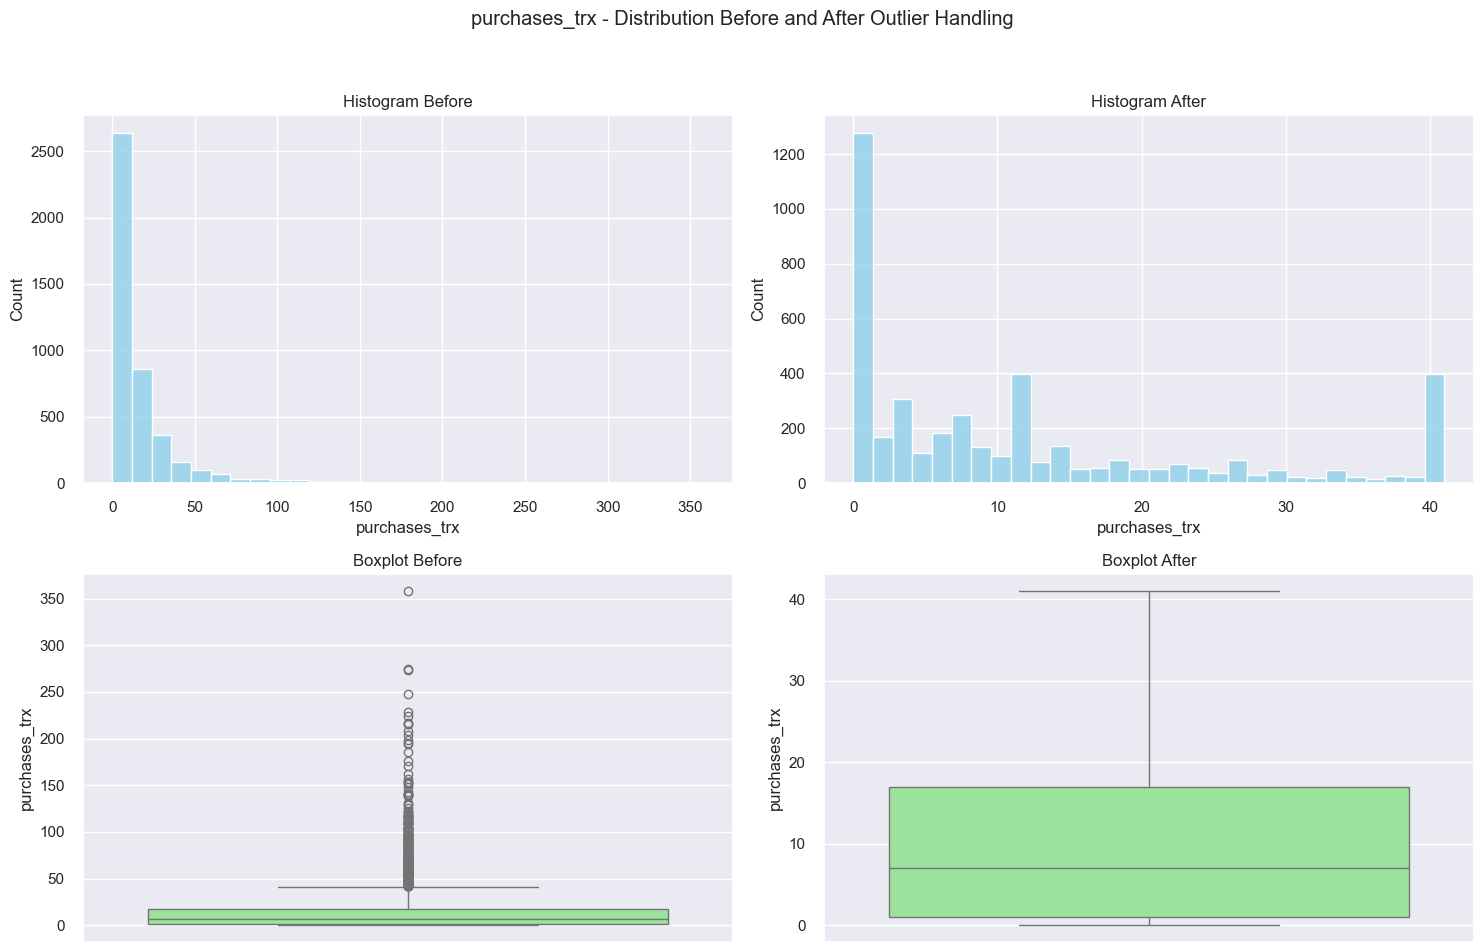

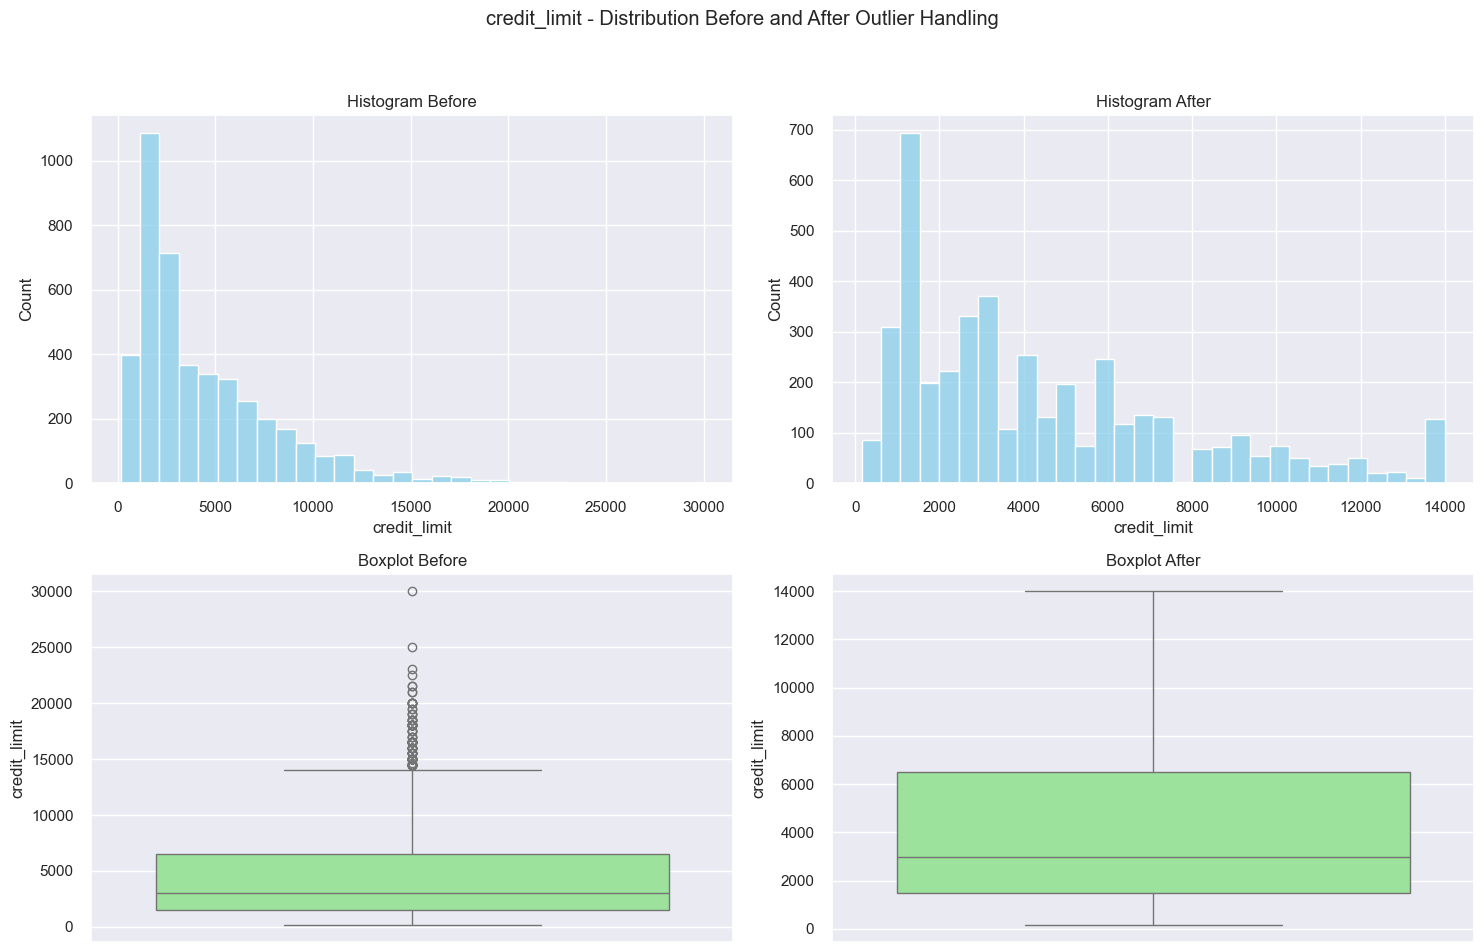

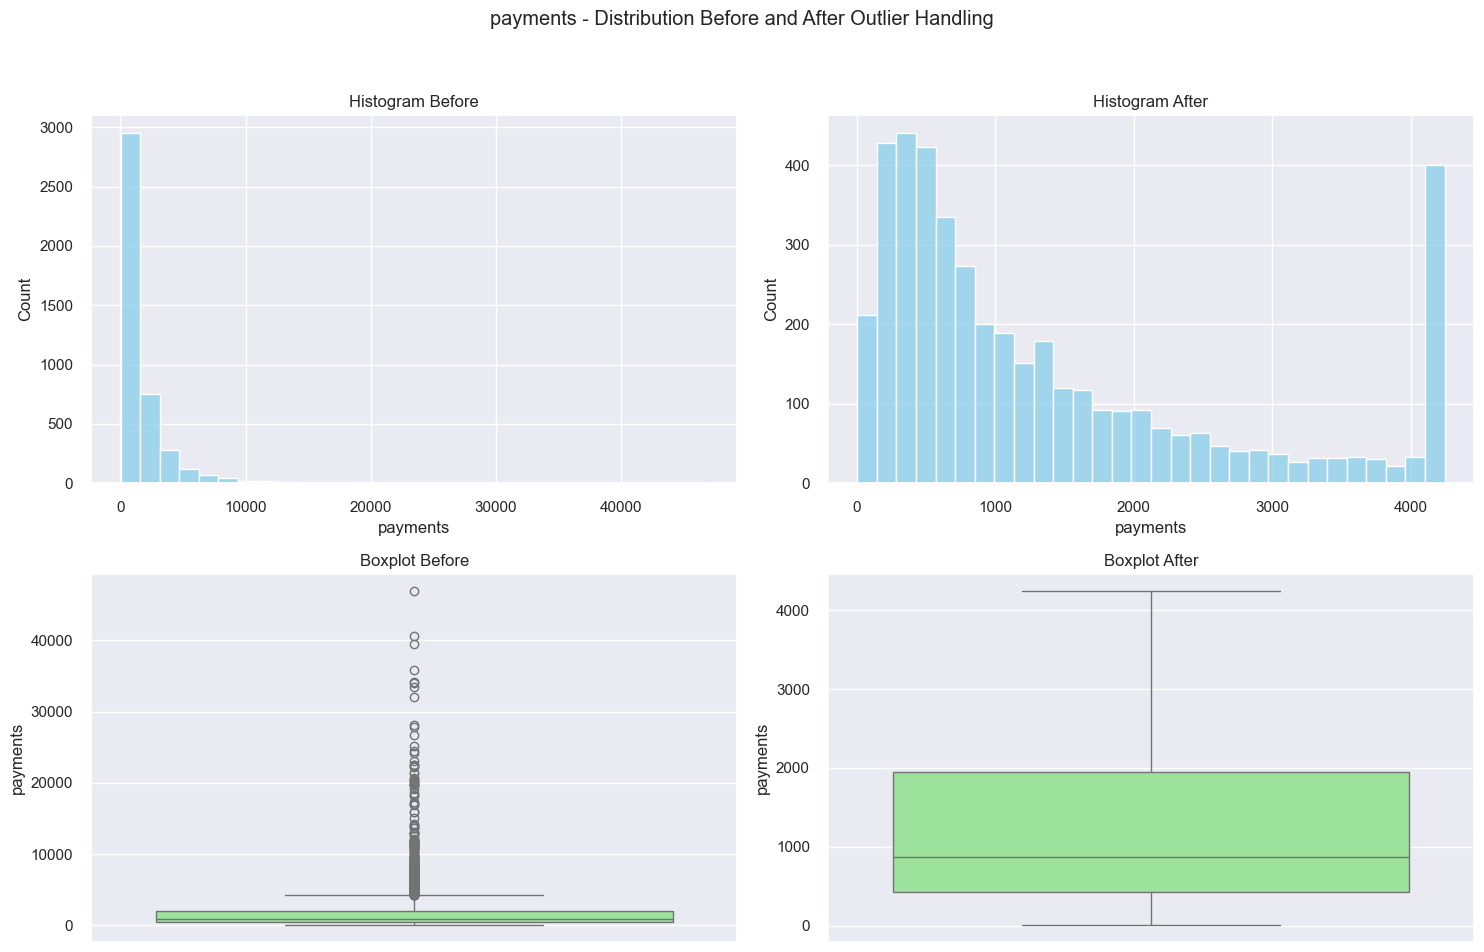

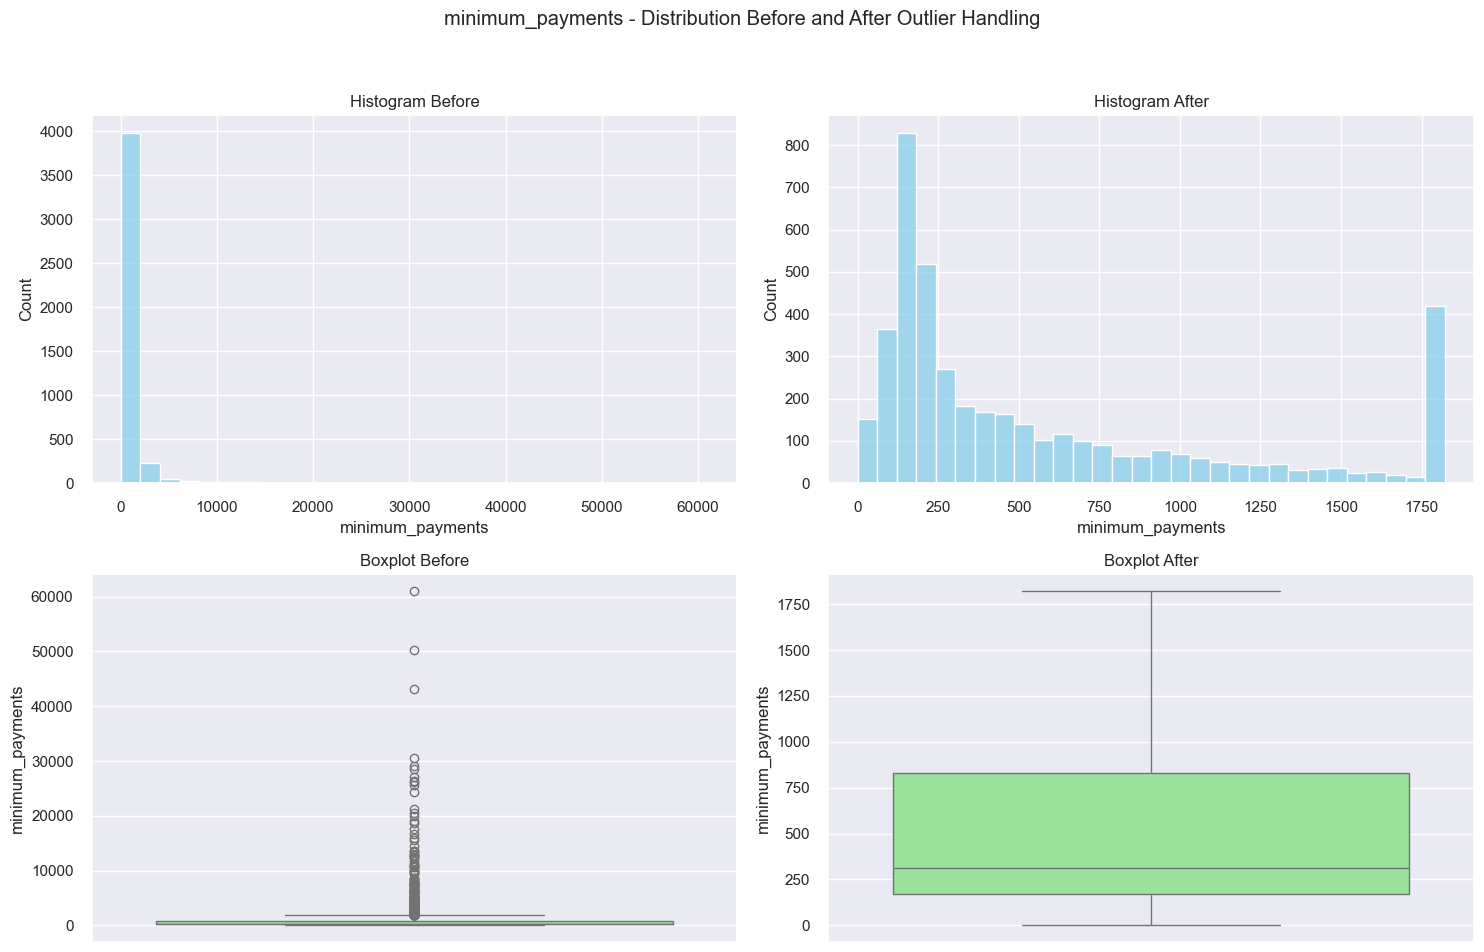

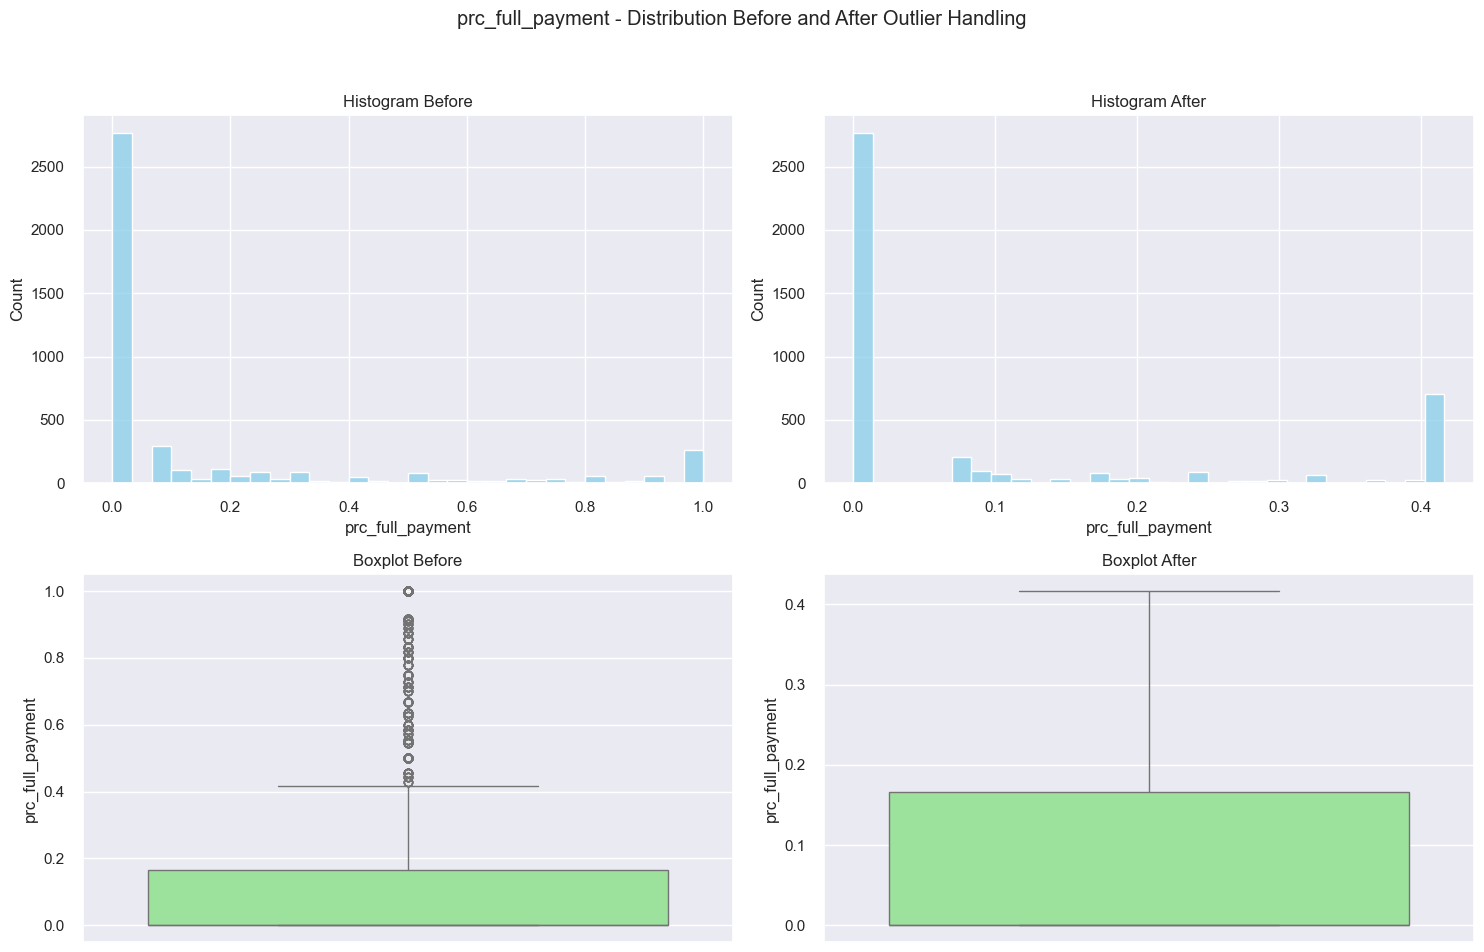

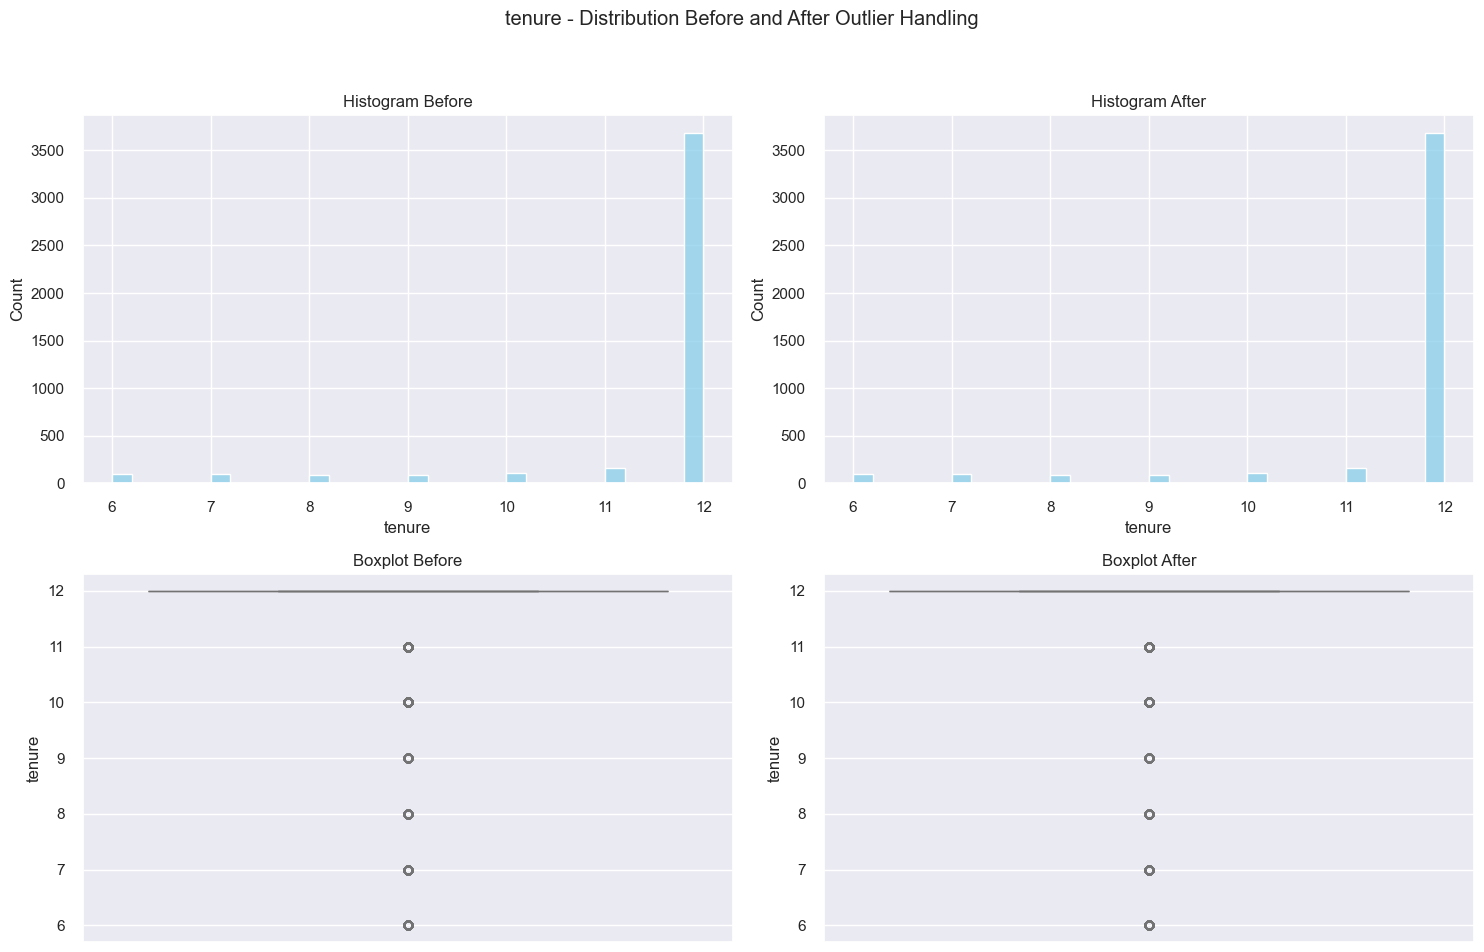

In [27]:
# Memanggil fungsi outlier_handling_plot_comparison()
num_cols = df
for col in num_cols:
    outlier_handling_plot_comparison(df, data_capped, col)

## **6.3 Feature Selection**

### ***6.3.1 Hopkins Statistic***

- Hopkins Statistic merupakan metrik yang digunakan untuk mengetahui clustering pada dataset. Digunakan untuk menentukan apakah data memiliki pola cluster atau data nya tersebar.

In [28]:
#Hopkins Statistic 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

**Penjelasan:**

Kode diatas digunakan untuk menghitung _Hopkins Statistic_ yang berguna untuk mengetahui kecenderungan clustering pada dataset. 

In [29]:
# Periksa data apakah data dapat di clustering
Num_features =data_capped.select_dtypes(include=[np.number]).columns
hopkins(data_capped[Num_features])

0.7920006553210434

**Penjelasan:**


* Jika nilainya <=0,5, data terdistribusi secara merata sehingga kecil kemungkinannya terdapat cluster yang signifikan secara statistik.

* Jika nilainya antara {0,7 - 0,99}, maka data memiliki kecenderungan tinggi untuk mengelompok sehingga kemungkinan besar memiliki cluster yang signifikan secara statistik.

* Berdasarkan hasil analisis diketahui memiliki nilai `0.79` yang artinya data cenderung memiliki cluster yang signifikan secara statistik.  


### ***6.3.2 Scaling***

Scaling merupakan proses normalisasi atau standarisasi fitur-fitur dalam sebuah dataset dengan mengatur rentang nilai fitur dalam skala yang sama.


#### ***RobustScaler***

- RobustScaler merupakan teknik skala yang menghilangkan median dari data dan menskalakan data dengan _Interquartile Range_ (IQR).

In [30]:
# Membuat objek scaler StandardScaler
scaler = RobustScaler()

#Fit_transform untuk x_train, transform untuk x_test
data_scaled = scaler.fit_transform(data_capped)


**Penjelasan:**


Meskipun outlier sudah di handling menggunakan capping, namun masih ada nilai outlier dan terdapat beberapa kolom dengan distribusi data tidak normal (_skewness_) sehingga menggunakan ` RobustScaling` untuk memastikan fitur memiliki kontribusi yang seimbang dalam proses clustering. Selain itu. `RobustScaling` lebih tahan terhadap pengaruh outlier.


### ***6.3.3 Principal Component Analysis (PCA)***

 - Principal Component Analysis (PCA) merupakan teknik reduksi dimensi yang sangat berguna dalam model clustering. Kegunaan PCA pada model clustering, yaitu:
 
        a. Mengurangi jumlah fitur pada dataset dan mengubahnya menjadi beberapa komponen utama yang tetap mempertahankan sebagian besar variabilitas data asli.

        b. Menghilangkan redundansi karena dataset memiliki beberapa fitur independen.

        c. Mengurangi noise dan meningkatkan interpretabilitas hasil.


In [31]:
# Proses PCA
pca = PCA()
pca.fit(data_scaled)


PCA()

**Penjelasan:**

Kode tersebut untuk melakukan proses PCA dan fit pada data yang telah dilakukan scaling. 

**Explained Variance Ratio:**


In [32]:
# Menghitung Explained Variance Ratio
pca = PCA()
pca.fit(data_scaled)
pca.explained_variance_ratio_

array([0.27044814, 0.22733285, 0.14246264, 0.08938551, 0.07046044,
       0.05392644, 0.0404682 , 0.02637949, 0.02301865, 0.01569098,
       0.01304076, 0.0087583 , 0.00646419, 0.00564176, 0.00341465,
       0.00222094, 0.00088607])

**Penjelasan:**

Berdasarkan hasil analisis tersebut diketahui bahwa terdapat 17 fitur yang masing-masing memiliki proporsi varians yang berbeda-beda setiap komponen. Komponen PCA 1 `(0.27044814)` memiliki varians yang paling tinggi dibandingkan PCA 2 - PCA 17.



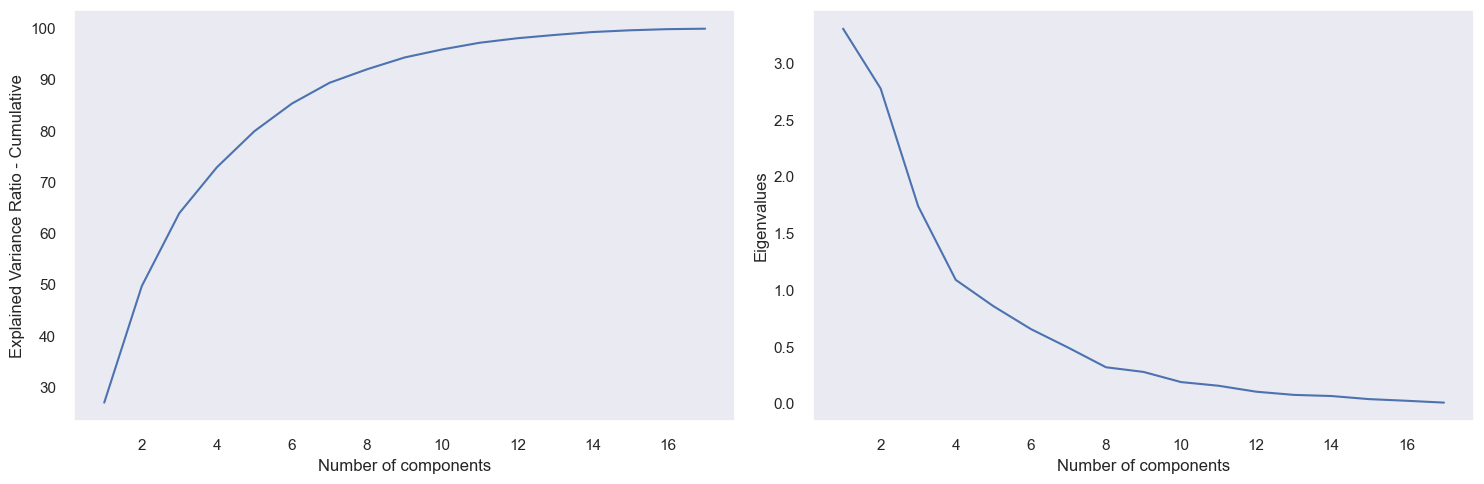

In [33]:
# Number of components
n_components = len(pca.explained_variance_ratio_)

# Visualisasi Data Cumulative Explained Variance Ratio
# Plot the Cumulative Explained Variance Ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')

# Visualisasi Data Eigenvalues
# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, n_components + 1), pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

plt.tight_layout()
plt.show()


**Penjelasan:**

- **Grafik kiri** : Grafik ini menunjukkan jumlah komponen utama yang diperlukan. Berdasarkan visualisasi data yaitu sekitar 5 komponen sudah dapat mempertahankan informasi sebesar 80%.

- **Grafik kanan** : Berdasarkan visualisasi data diketahui terjadi penurunan pada nilai `eigen` pada komponen ke-1 kemudian mulai mendatar dari komponen ke-10 sampai seterusnya. Titik elbow tampaknya terjadi pada komponen ke-4.

In [34]:
# Looping untuk nilai proporsi varians 
explained_variances = [0.98, 0.95, 0.925, 0.90, 0.875, 0.85, 0.80]
results = []

for explained_variance in explained_variances:
    pca = PCA(n_components=explained_variance)
    data_scaled_pca = pca.fit_transform(data_scaled)
    
    
    print(f'Proportion of Variance Explained: {explained_variance}')
    print('Dimensions                      :', data_scaled_pca.shape)
    print('Number of Components            :', pca.n_components_, 'Components')
    
    # Train K-Means model dengan n_clusters = 4 sebagai contoh
    kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
    pred = kmeans.fit_predict(data_scaled_pca)
    
    # Mebghitung silhouette score
    silhouette_avg = silhouette_score(data_scaled_pca, pred)
    results.append((explained_variance, pca.n_components_, silhouette_avg))
    
    print(f'Silhouette Score: {silhouette_avg}\n')


Proportion of Variance Explained: 0.98
Dimensions                      : (4316, 12)
Number of Components            : 12 Components
Silhouette Score: 0.22384908476069648

Proportion of Variance Explained: 0.95
Dimensions                      : (4316, 10)
Number of Components            : 10 Components
Silhouette Score: 0.2319519912239941

Proportion of Variance Explained: 0.925
Dimensions                      : (4316, 9)
Number of Components            : 9 Components
Silhouette Score: 0.23812622766017733

Proportion of Variance Explained: 0.9
Dimensions                      : (4316, 8)
Number of Components            : 8 Components
Silhouette Score: 0.24881912173113313

Proportion of Variance Explained: 0.875
Dimensions                      : (4316, 7)
Number of Components            : 7 Components
Silhouette Score: 0.25799758880823537

Proportion of Variance Explained: 0.85
Dimensions                      : (4316, 6)
Number of Components            : 6 Components
Silhouette Score: 0.2

**Penjelasan:**

Kode tersebut digunakan untuk mengetahui berapa jumlah komponen yang diperlukan untuk mempertahankan informasi sebesar 98%, 95%, 92,5%, 90%, 87,5%, 85% dan 80% dan mengetahui nilai `Silhouette Score` dari setiap komponen. 

In [35]:
# Hasil ringkasan
results_df = pd.DataFrame(results, columns=['Explained Variance', 'Number of Components', 'Silhouette Score'])
display(results_df)

Explained Variance  Number of Components  Silhouette Score
0               0.980                    12          0.223849
1               0.950                    10          0.231952
2               0.925                     9          0.238126
3               0.900                     8          0.248819
4               0.875                     7          0.257998
5               0.850                     6          0.275078
6               0.800                     5          0.297232

**Penjelasan:**

- Berdasarkan ringkasan tersebut, kami memutuskan untuk mempertahankan informasi sebesar 80% dengan jumlah komponen sebanyak 5 dan nilai `Silhouette Score` sebesar 0.29. Hal ini dikarenakan nilai `Silhouette Score` pada dengan 5 jumlah komponen paling tinggi dibandingkan dengan nilai `Silhouette Score` pada jumlah komponen yang lain. Mesikpun nilai `Silhouette Score` yang dianggap bagus adalah 0.5 yang umumnya dianggap memiliki clustering yang baik.

In [36]:
# Membuat DataFrame dari hasil PCA
principalDf  = pd.DataFrame(data = data_scaled_pca
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                          'principal component 4', 'principal component 5'])
principalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -2.008146              -1.921762               2.540491   
1              -1.387377              -1.604246               2.555600   
2              -0.548794              -1.139625               2.960423   
3              -1.837828              -0.964926               2.344069   
4              -1.068651              -2.281206               3.223895   

   principal component 4  principal component 5  
0              -1.468119              -0.506218  
1              -2.119952              -0.623012  
2              -2.107671              -1.334869  
3              -2.274171              -0.176685  
4              -0.773567              -1.731406

In [37]:
# Periksa jumlah fitur yang ingin mempertahankan informasi sebesar 80%
pca = PCA(n_components=0.80)
data_scaled_pca = pca.fit_transform(data_scaled)

print('Dimensions                                      :',data_scaled_pca.shape)
print('Number of Components                            :',pca.n_components_,'Components','\n')

# Menampilkan explained_variance_ratio_ untuk setiap komponen
explained_variance_ratio = pca.explained_variance_ratio_


print('Explains variation summation for each component:')
for idx, ratio in enumerate(explained_variance_ratio):
     print(f"Component {idx}: {ratio:}",'\n')

print('Explained variation summation for all components: {}'.format(sum(pca.explained_variance_ratio_)),'\n')
print("Original number of features:", data_scaled.shape[1], 'features\n')
print("Reduced number of features after PCA:", data_scaled_pca.shape[1], 'features\n')



Dimensions                                      : (4316, 5)
Number of Components                            : 5 Components 

Explains variation summation for each component:
Component 0: 0.2704481354162757 

Component 1: 0.22733284645383556 

Component 2: 0.142462638003338 

Component 3: 0.08938550663417032 

Component 4: 0.07046043864009337 

Explained variation summation for all components: 0.8000895651477129 

Original number of features: 17 features

Reduced number of features after PCA: 5 features



**Penjelasan:**

- Kami memutuskan untuk mempertahankan informasi sebesar 80% dengan sebanyak 5 komponen dan proporsi total total varians sebesar 0.80.
- Setiap komponen memiliki varians yang berbeda-beda dan komponen 0 memiliki varians yang paling tinggi sedangkan komponen 4 memiliki variang yang paling rendah. 


# **7. Model Definition & Training**

 - Sebelum melakukan clustering dengan metode K-Means, akan dilakukan `metode elbow dan Silhoutte Score & plot` untuk menentukan jumlah cluster yang optimal

## **7.1 Elbow Method**

- Metode Elbow merupakan salah satu metode yang digunakan untuk menentukan jumlah cluster terbaik pada proses clustering sehingga dapat memaksimalkan kualitas hasil cluster.

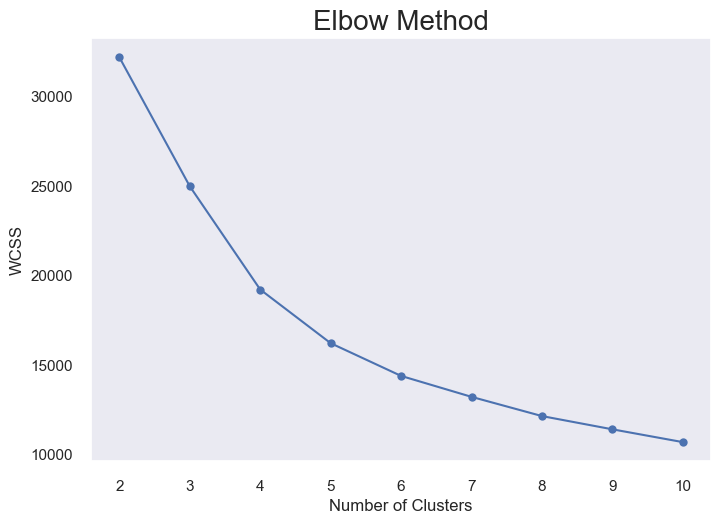

In [38]:
# Menentukan n cluster yang optimal berdasarkan Elbow Method

wcss = []
random_state = 30
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Penjelasan:**

- Berdasarkan visuaslisasi data dengan metode elbow bahwa jumlah cluster yang optimal adalah 5 cluster. Langkah selanjutnya yaitu dilakukan metode `Silhoutte Plot & Score` sebelum pemilihan final pada jumlah cluster yang optimal. 


## **7.2 Silhoutte Score & Silhoutte Plot**

- Silhouette Score digunakan untuk menemukan jumlah cluster yang memiliki nilai yang paling tinggi yang artinya bahwa cluster tersebut memiliki pemisahan yang baik. 

- Silhoutte plot yaitu memberikan visualisasi data dari hasil Silhouette Score.

In [39]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

**Penjelasan:**

Kode tersebut yaitu membuat fungsi untuk menampilkan silhoutte score dan plot

For n_clusters = 2 The average silhouette_score is : 0.27404605923751324
For n_clusters = 3 The average silhouette_score is : 0.27970024987432
For n_clusters = 4 The average silhouette_score is : 0.3147073175728087
For n_clusters = 5 The average silhouette_score is : 0.2972647771516154
For n_clusters = 6 The average silhouette_score is : 0.2970231189779197
For n_clusters = 7 The average silhouette_score is : 0.2982243843454538
For n_clusters = 8 The average silhouette_score is : 0.3008547236010385
For n_clusters = 9 The average silhouette_score is : 0.2987961449724833


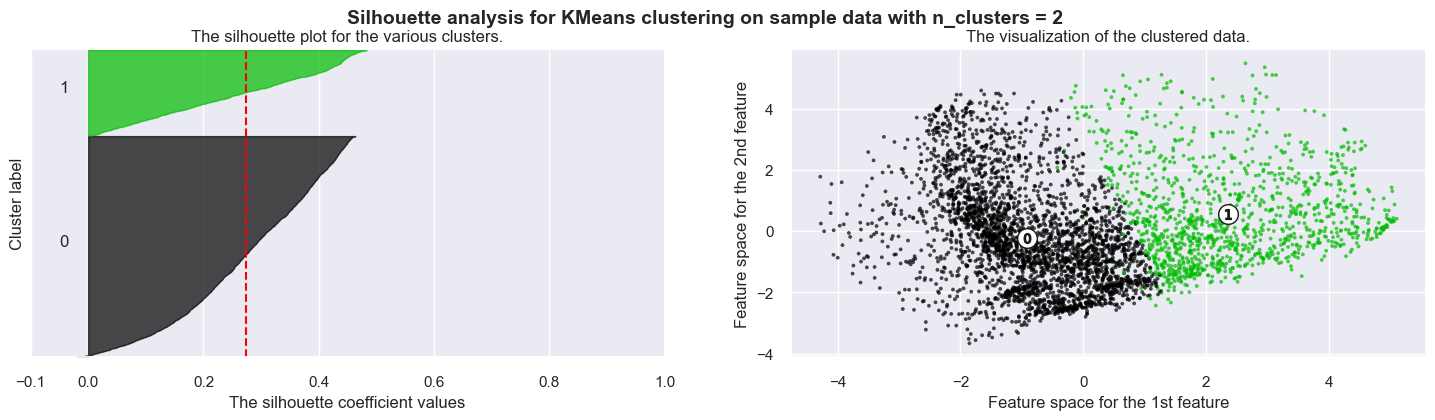

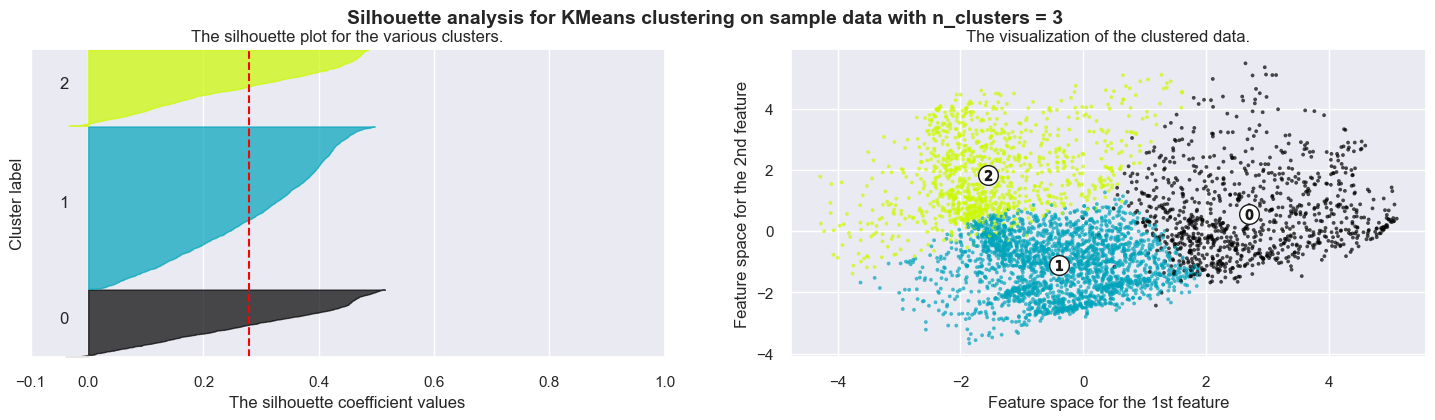

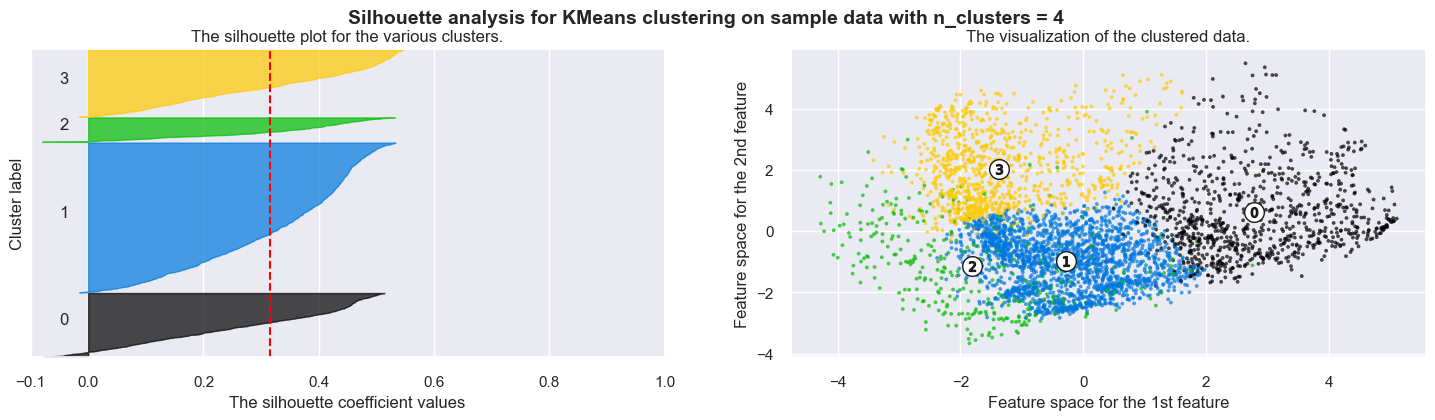

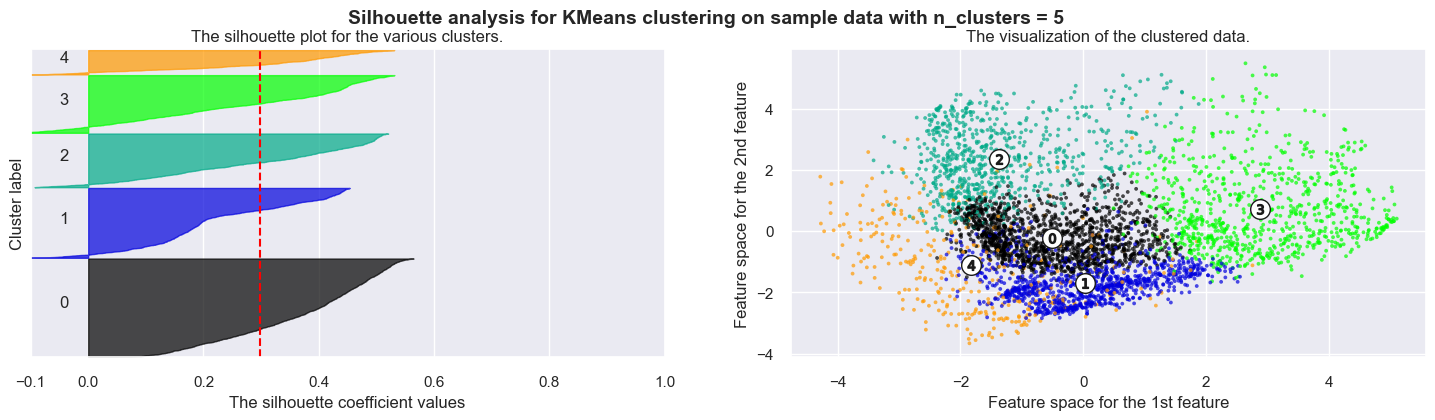

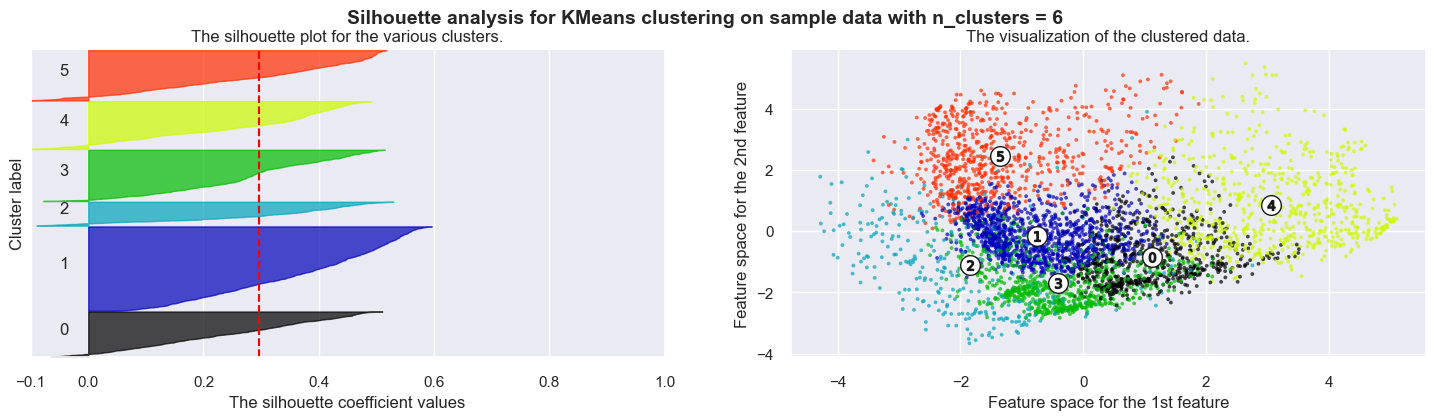

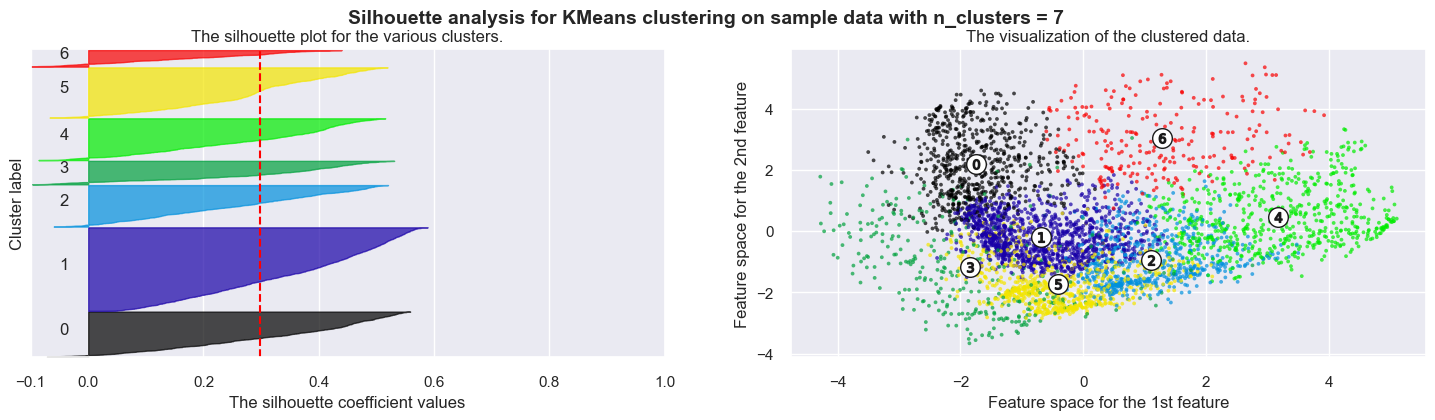

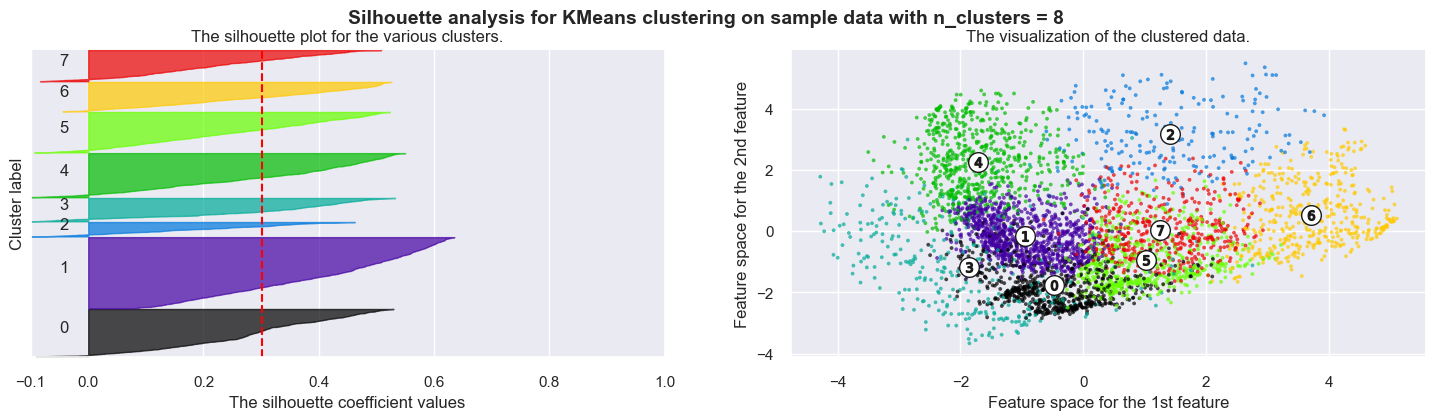

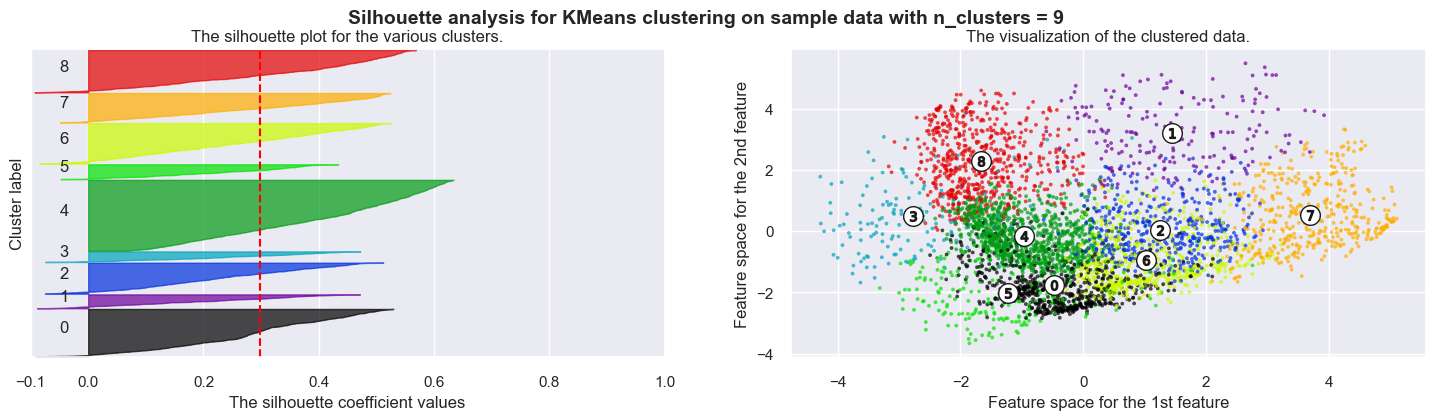

In [40]:
# Menampilkan nilai Silhouette Score dan Visualisasi Silhouette Plot

plot_silhouette(range(2, max_cluster), data_scaled_pca, random_state)

**Penjelasan:**
- Berdasarkan perhitungan nilai Silhouette Score diketahui bahwa `n_cluster = 4 (0.31) dan n_cluster = 8 (0.30)` memiliki nilai Silhouette Score yang tinggi dibandingkan n_cluster yang lain. 

- Diketahui bahwa nilai `Silhouette score antara 0.3 dan 0.5` menunjukkan cluster yang cukup baik meskipun ada kemungkinan tumpang tindih antara cluster. 

- Oleh karena itu, kami memutuskan untuk memilih `n_cluster = 4` meskipun dilihat dengan `Silhouette plot` memiki proporsi tiap cluster yang tidak seimbang. 

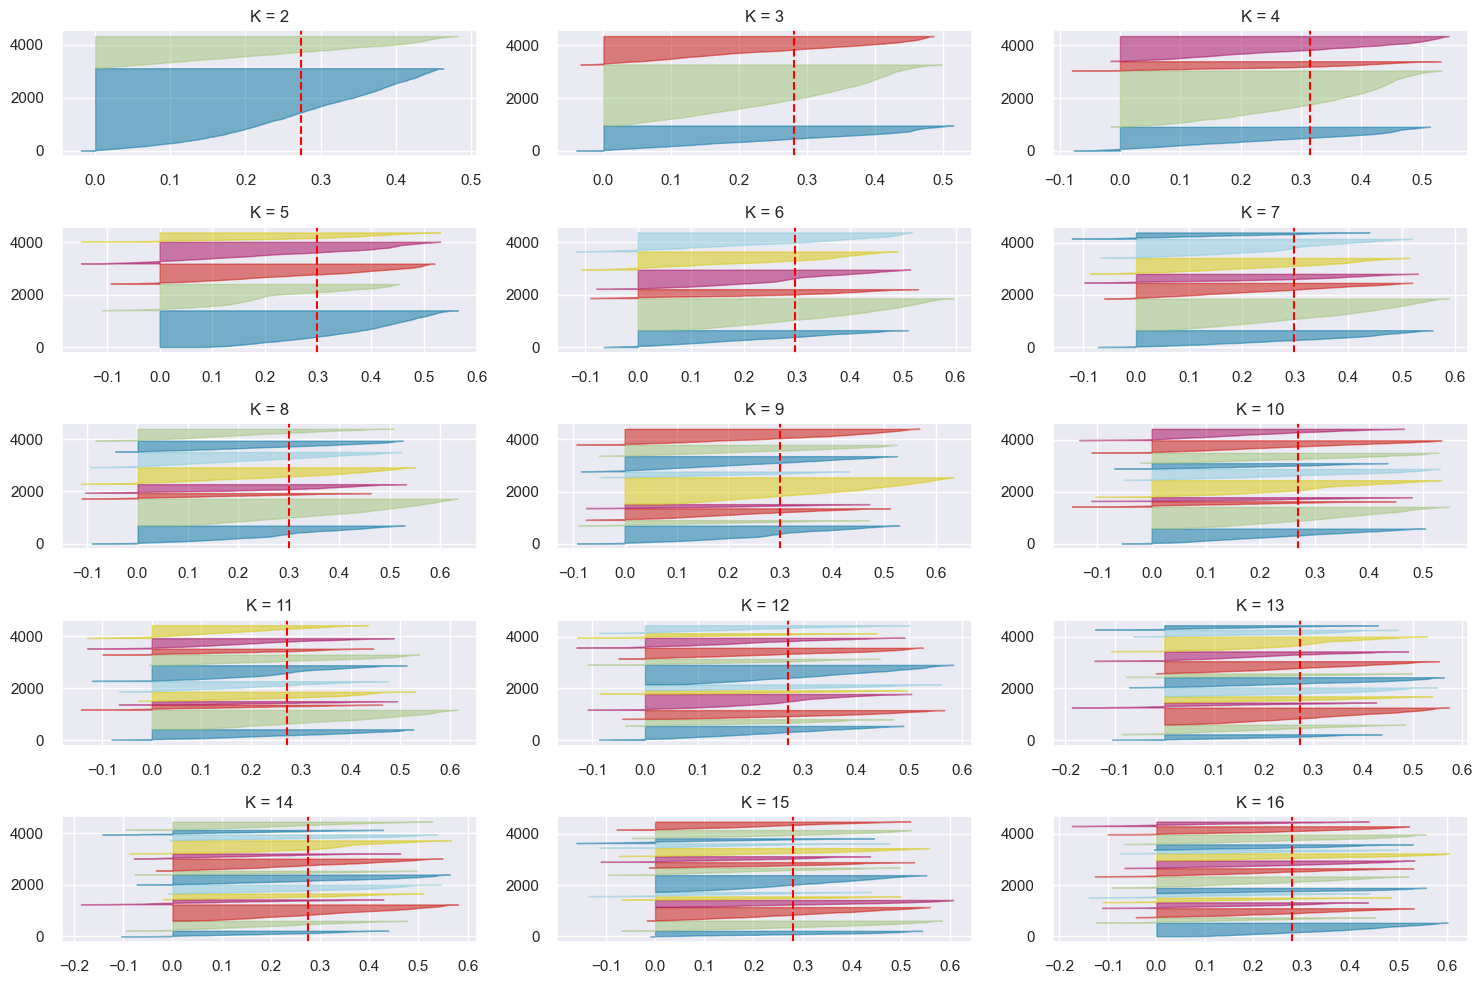

In [41]:
# Menampilkan Silhouette Plot dengan warna 'Yellowbrik'
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(data_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

**Penjelasan:**
- Berdasarkan hasil plot sebaran cluster, memutuskan untuk memilih  n_clusters =  4 


## **7.3 K-Means**

In [42]:
model_kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
pred = model_kmeans.fit_predict(data_scaled_pca)
    
# Menghitung Silhouette Score dan Davies-Bouldin Score
print(f"Silhouette Score: {silhouette_score(data_scaled_pca, pred)}")
print('Davies-Bouldin Score: ',davies_bouldin_score(data_scaled_pca, pred))

Silhouette Score: 0.3147073175728087
Davies-Bouldin Score:  1.0862516205096209


**Penjelasan:**

- Berdasarkan hasil tersebut diketahui bahwa nilai `Silhouette Score` pada n_cluster = 4 sebesar 0.31. Hal ini menunjukkan bahwa nilai berada sekitar 0 yang artinya data dalam cluster tidak terlalu terkelompok dengan jelas. 

- Selain itu, apabila `Silhouette Score`antara 0.3 dan 0.5 menunjukkan clustering yang cukup baik meskipun ada kemungkinan tumpang tindih antara cluster. 

- Nilai `Davies-Bouldin Score` sebesar 1.08 menunjukkan bahwa cluster cukup terpisah dengan baik satu sama lain. Meskipun semakin rendah nilai nya atau mendekati nilai 0 yang menunjukkan cluster lebih terpisah satu sama lain dengan baik.


**Visualisasi Data**

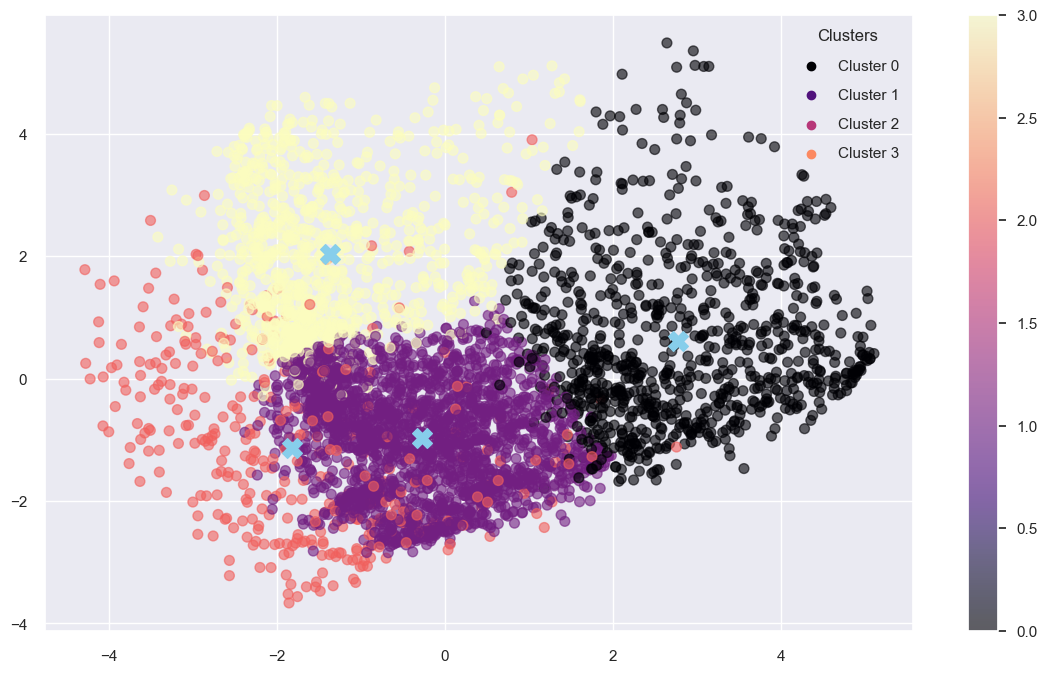

In [43]:
sns.set(style="darkgrid")

# Membuat scatter plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(data_scaled_pca[:, 0], data_scaled_pca[:, 1], c=pred, s=50, cmap='magma', alpha=0.6)

centers = model_kmeans.cluster_centers_
for center in centers:
    plt.scatter(center[0], center[1], c='skyblue', s=200, alpha=1.00, marker='X')

# Menambahkan legend 
legend_labels = [f'Cluster {i}' for i in range(4)]
for i in range(4):
    plt.scatter([], [], c=sns.color_palette('magma', as_cmap=True)(i / 4), label=legend_labels[i])
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title="Clusters")

# Menambahkan colorbar
plt.colorbar(scatter)
plt.show()

# **8. Model Evaluation**

**EXPLORE THE CLUSTERS RESULTS**

In [44]:
# Menggabungkan hasil clustering dengan original dataset
df_clustered = pd.concat([df.reset_index().drop('index', axis=1), 
                          pd.Series(pred, name='cluster', dtype='object')],
                          axis=1)

df_clustered.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0   943.584041              0.875      103.0             103.0   
1   461.455720              1.000      585.0             585.0   
2  1053.594730              1.000     1450.0            1450.0   
3  2237.238086              1.000      120.0             120.0   
4   424.994385              0.375     1200.0            1200.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              1        1000.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        2500.0   
4                     0.0                 0              1        1200.0   

     payments  minimum_payments  prc_full_payment  tenure cluster  
0  215.325023        410.484825               0.0       8       2  
1  258.032630        151.696433               0.0       8       2  
2  397.090516        227.143184               0.0       8       2  
3  343.102984        712.986387               0.0       8       2  
4   57.266292         56.720210               0.0       8       2

**Penjelasan:**

Setelah melakukan pemodelan clustering dengan K-Means, yaitu terdapat 4 cluster kemudian cluster tersebut digabungkan dengan DataFrame yang asli dan menambahkan kolom `cluster`.

In [46]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           4316 non-null   float64
 1   balance_frequency                 4316 non-null   float64
 2   purchases                         4316 non-null   float64
 3   oneoff_purchases                  4316 non-null   float64
 4   installments_purchases            4316 non-null   float64
 5   cash_advance                      4316 non-null   float64
 6   purchases_frequency               4316 non-null   float64
 7   oneoff_purchases_frequency        4316 non-null   float64
 8   purchases_installments_frequency  4316 non-null   float64
 9   cash_advance_frequency            4316 non-null   float64
 10  cash_advance_trx                  4316 non-null   int64  
 11  purchases_trx                     4316 non-null   int64  
 12  credit

**Penjelasan:**

Dari ringkasan informasi tersebut diketahui bahwa Dataframe yang baru memiliki 4316 baris dan 18 kolom. 

**VISUALISASI DATA**

In [47]:
# Mengatur warna untuk tiap cluster
custom_colors = sns.color_palette("Set2")
colors = [custom_colors[cluster] for cluster in sorted(df_clustered['cluster'].unique())]
custom_palette_kmeans = sns.set_palette(colors)

**Penjelasan:**

Kode tersebut untuk menentukan dan mengatur pallete warna pada visualisasi data clustering. 








### **8.1 Berapa banyak jumlah pengguna kartu kredit di setiap cluster**

In [49]:
df_clustered_count = df_clustered.groupby(by=["cluster"]).size().reset_index(name="counts")
df_clustered_count

cluster  counts
0        0     902
1        1    2122
2        2     347
3        3     945

**Penjelasan:**

- Jumlah pengguna kartu kredit pada cluster 0 sebanyak 902 pengguna.

- Jumlah pengguna kartu kredit pada cluster 1 sebanyak 2122 pengguna.
- Jumlah pengguna kartu kredit pada cluster 2 sebanyak 347 pengguna.
- Jumlah pengguna kartu kredit pada cluster 3 sebanyak 945 pengguna.

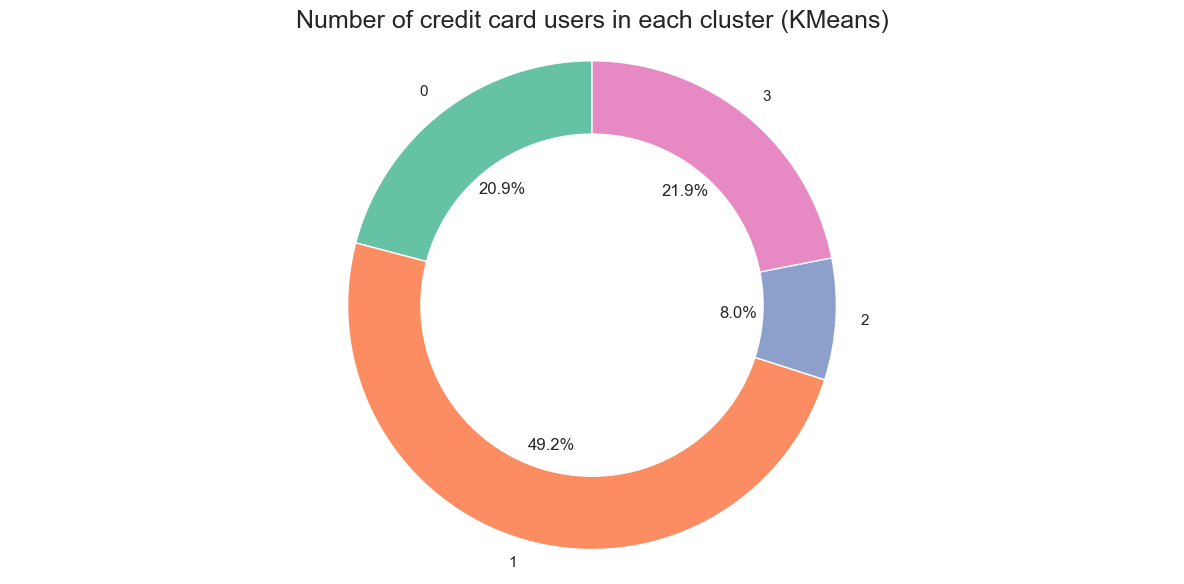

In [50]:
# Visualisasi Data
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Number of credit card users in each cluster (KMeans)', loc='center', size=18)
kmeans_counts = df_clustered['cluster'].value_counts().sort_index()
pie = ax.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', startangle=90,
             wedgeprops=dict(width=0.4, edgecolor='w'), colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

**Penjelasan:**

Berdasarkan visualisasi data tersebut diketahui bahwa pengguna kartu kredit paling banyak berada di `cluster 1` sebanyak 49.2%, kemudian pada `cluster 3` sebanyak 21.9%, pada `cluster 0` sebanyak 20.9% dan `cluster 2` sebanyak 8.0%.


### **8.2 Bagaimana karakteristik fitur di setiap cluster**

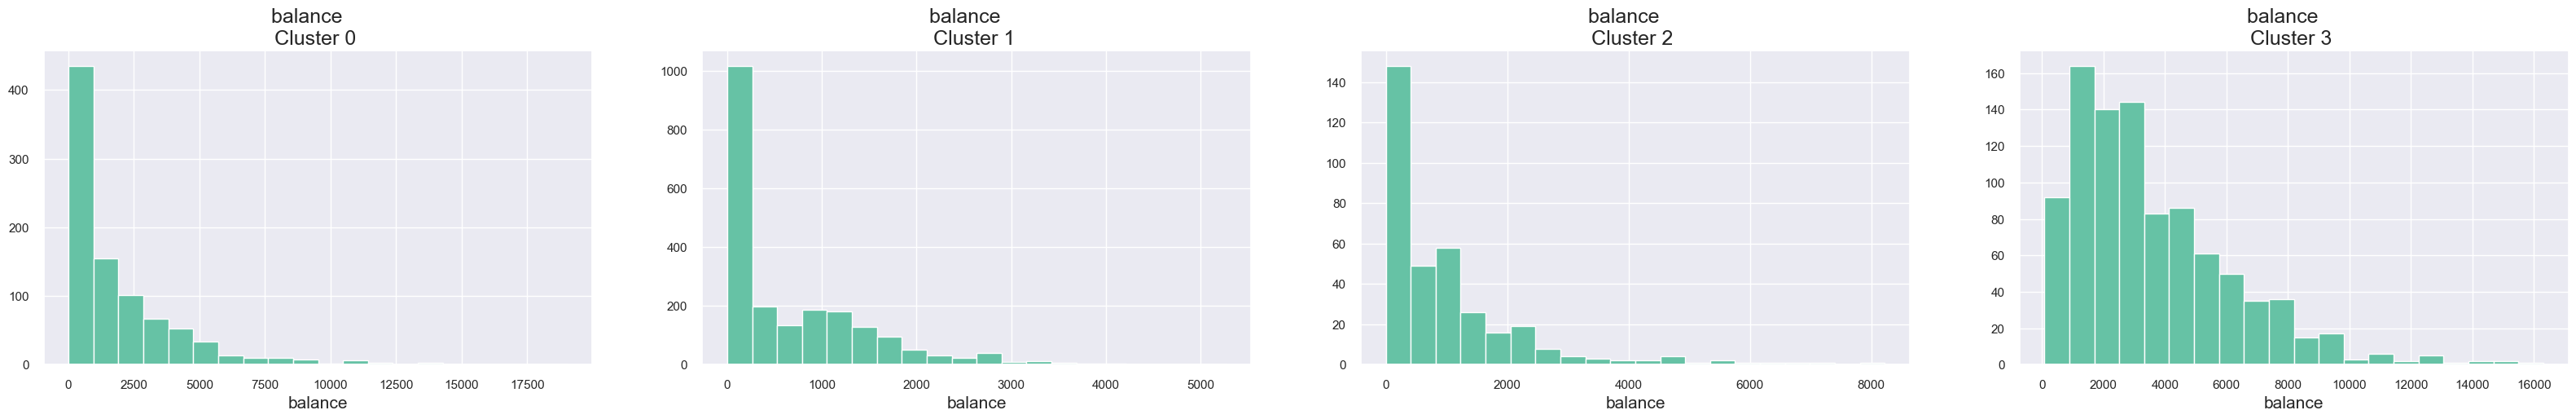

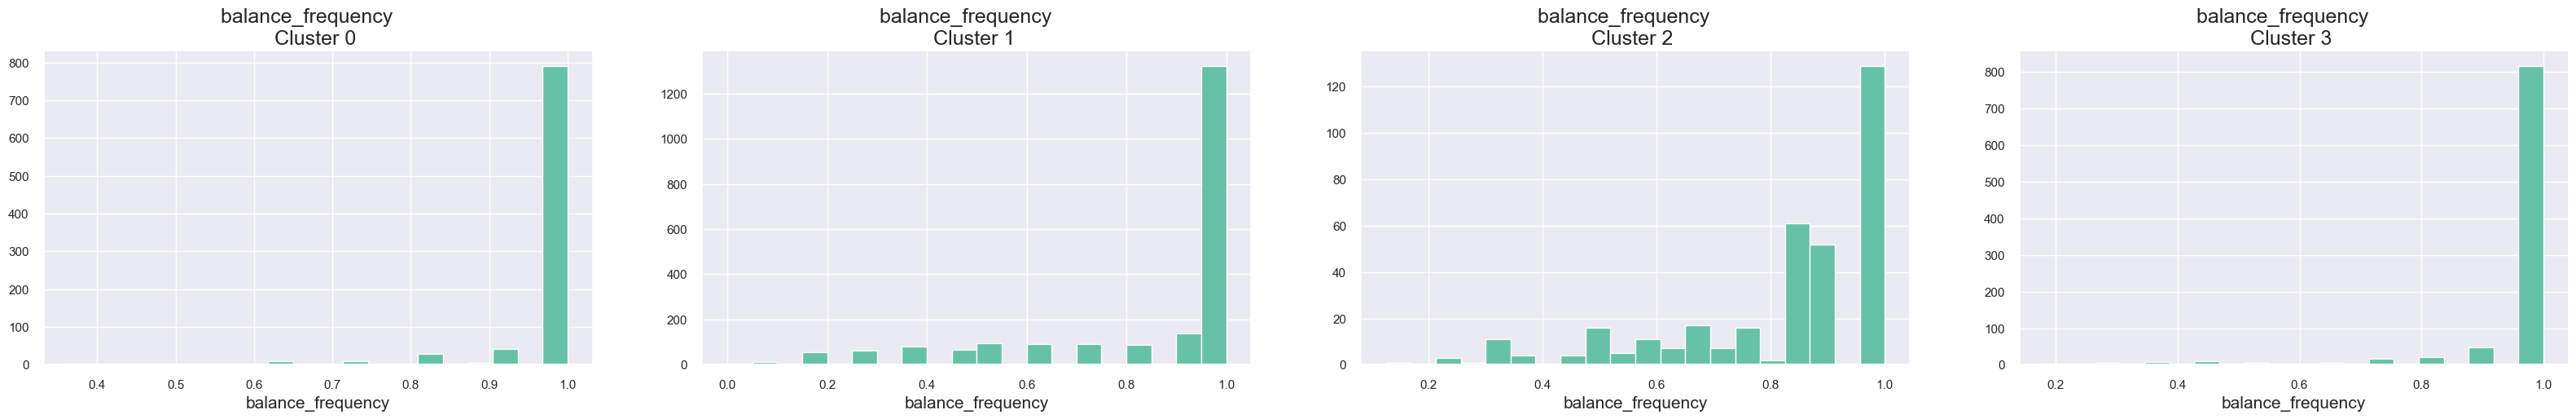

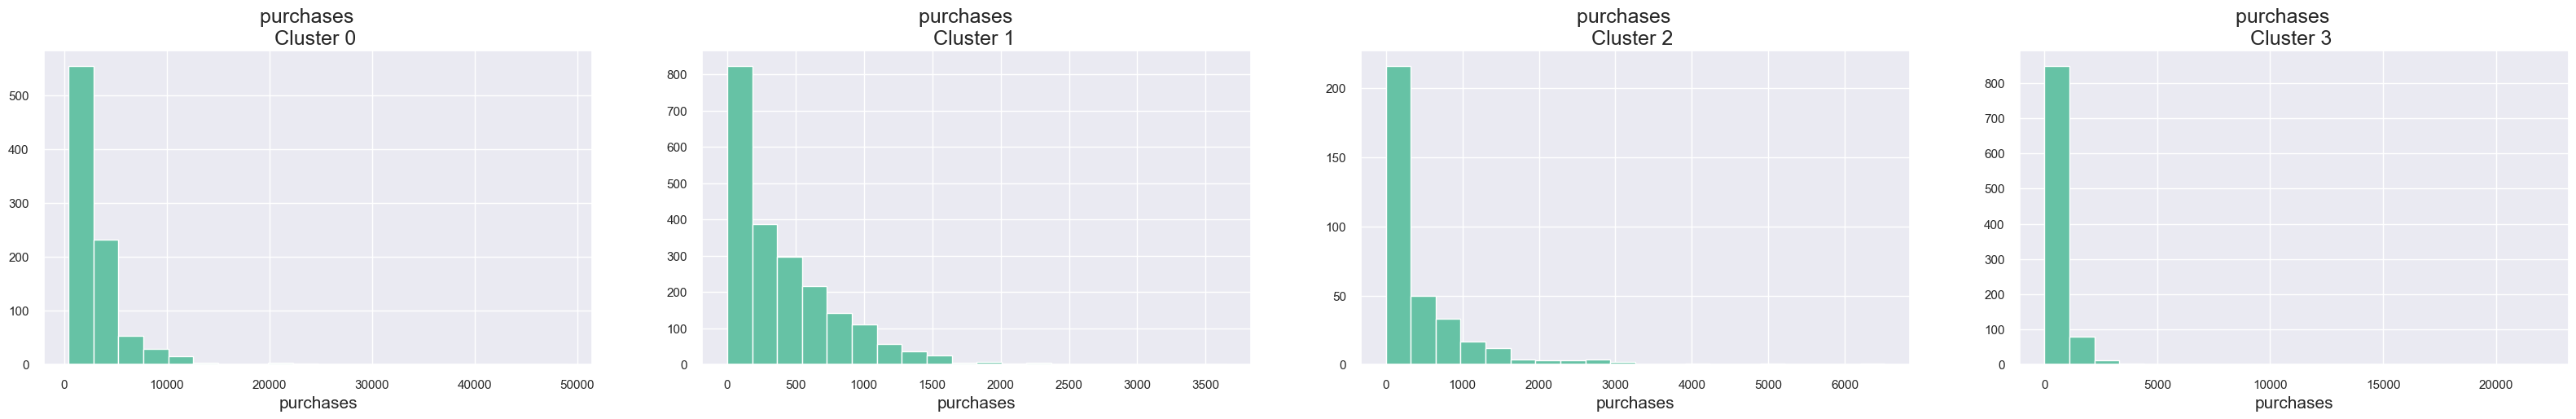

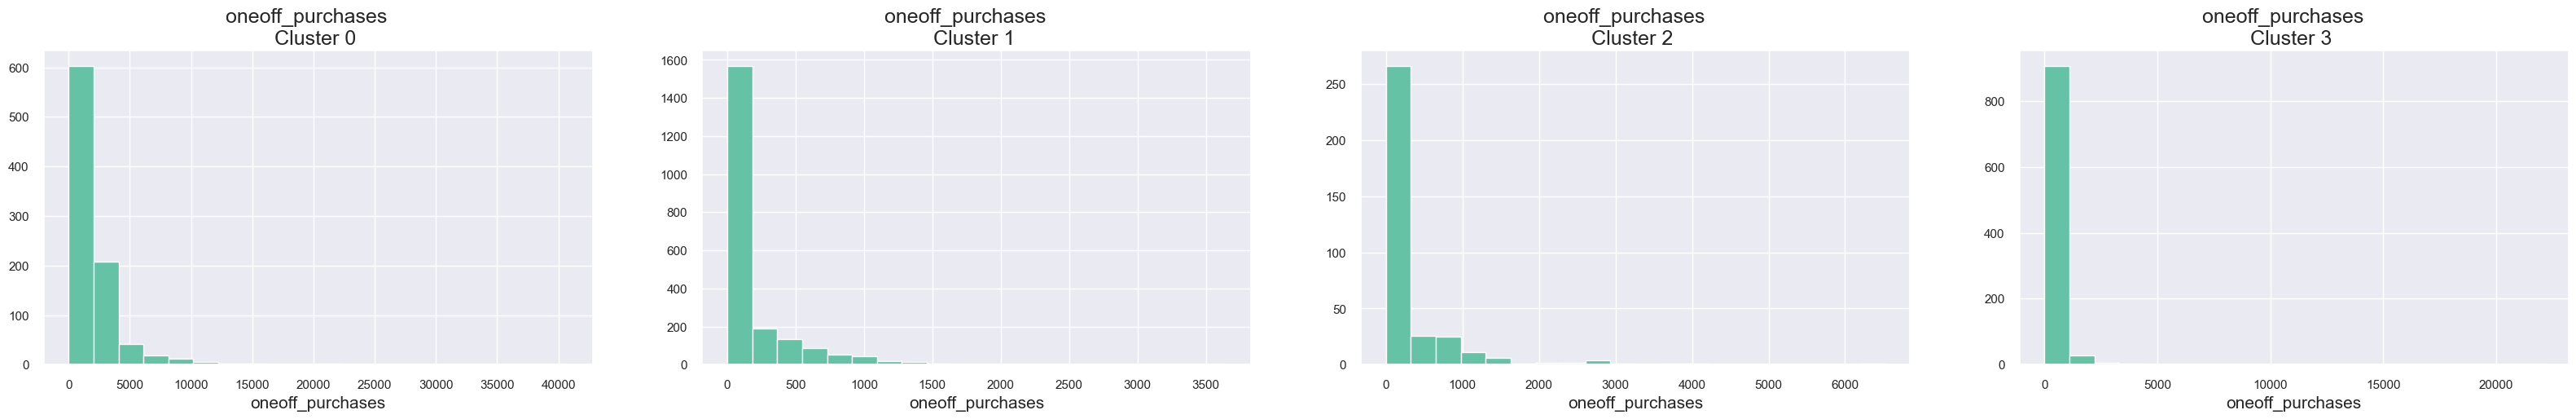

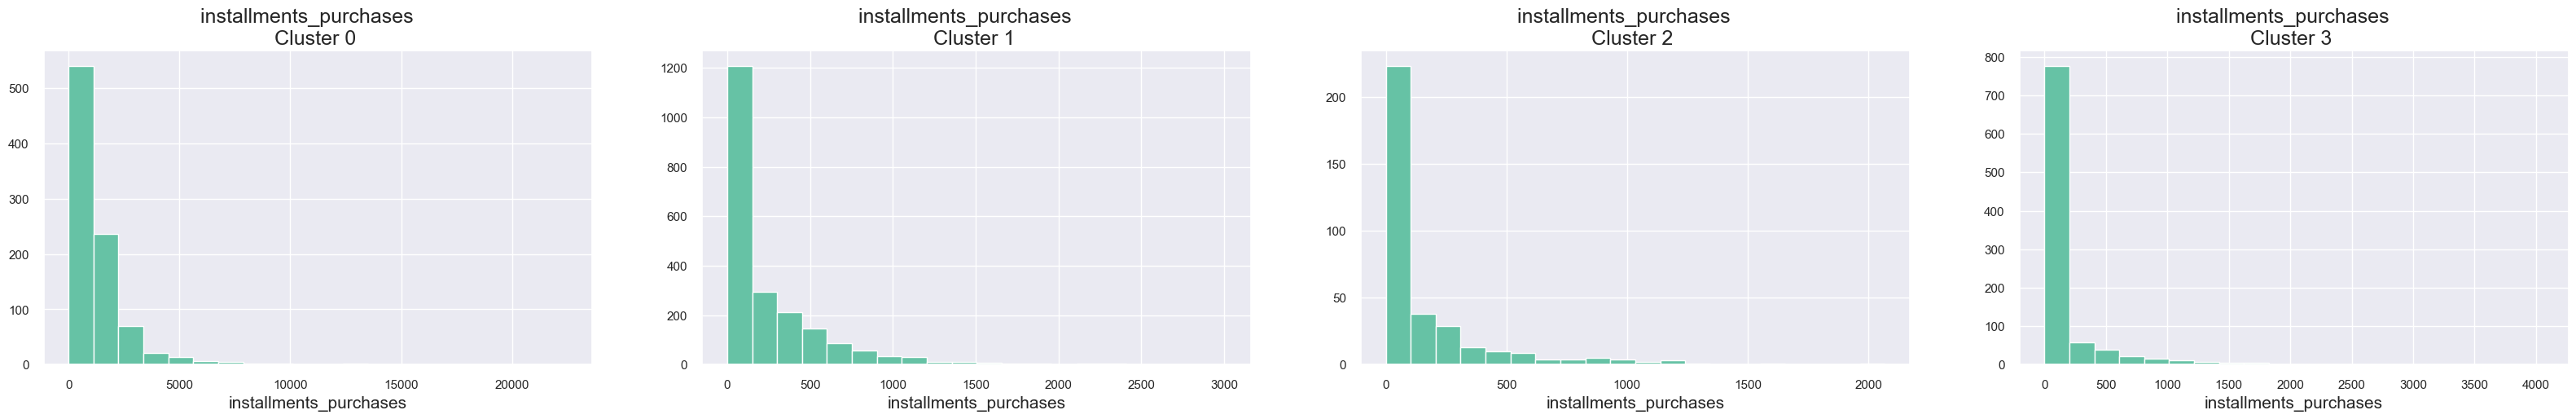

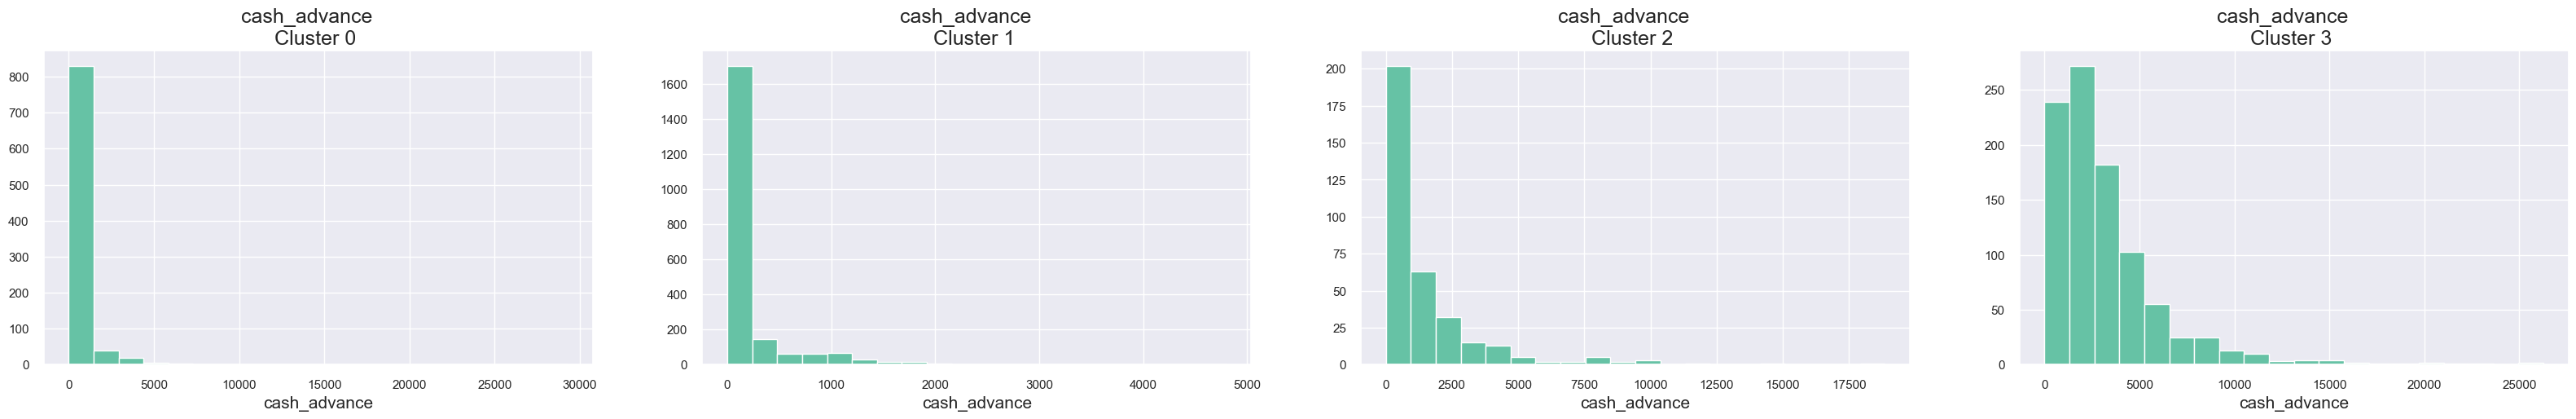

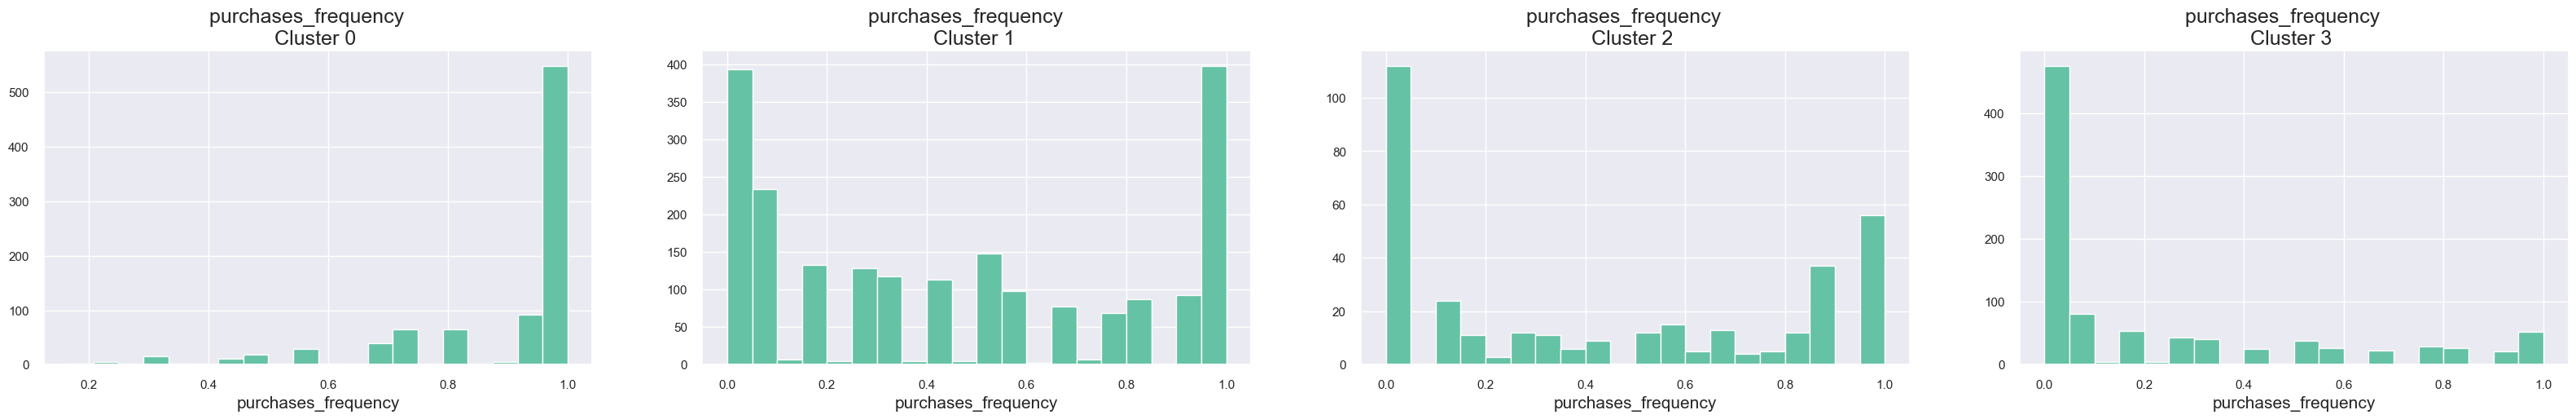

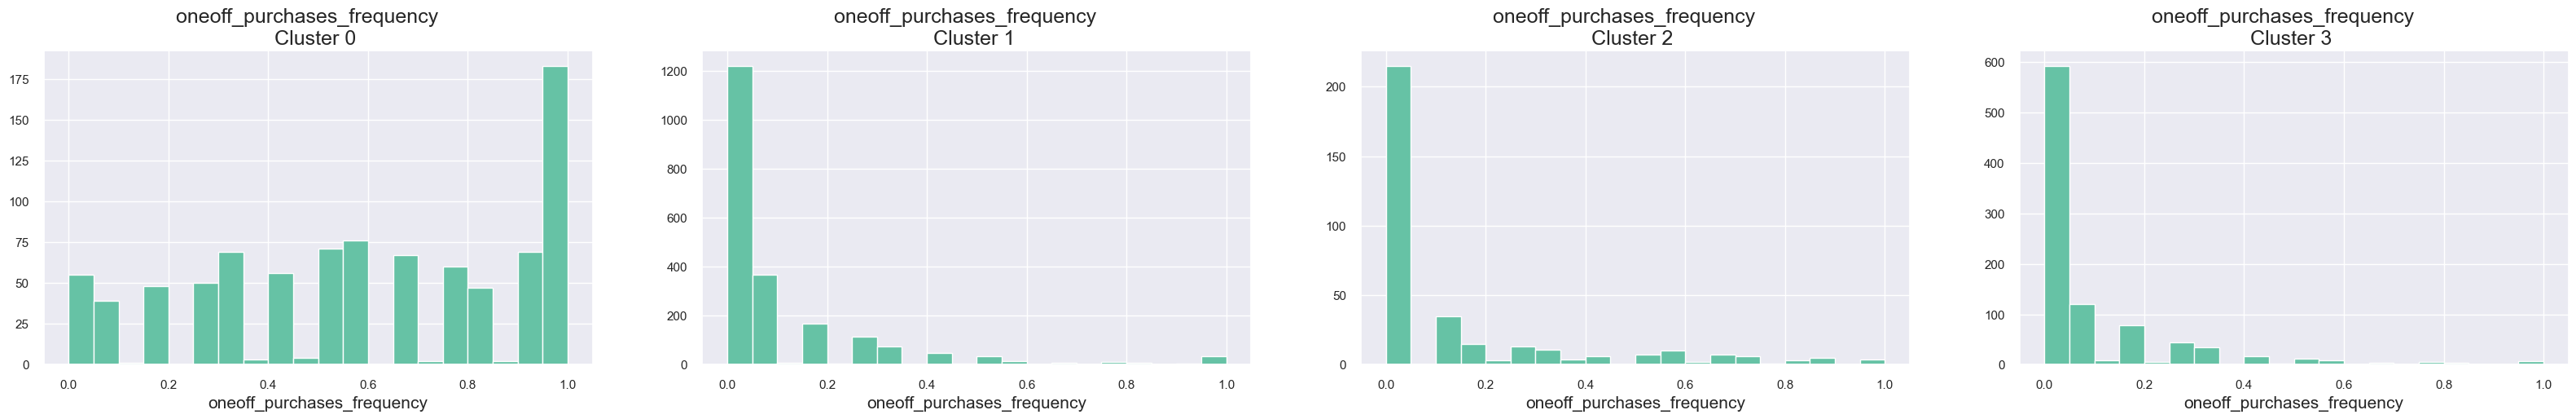

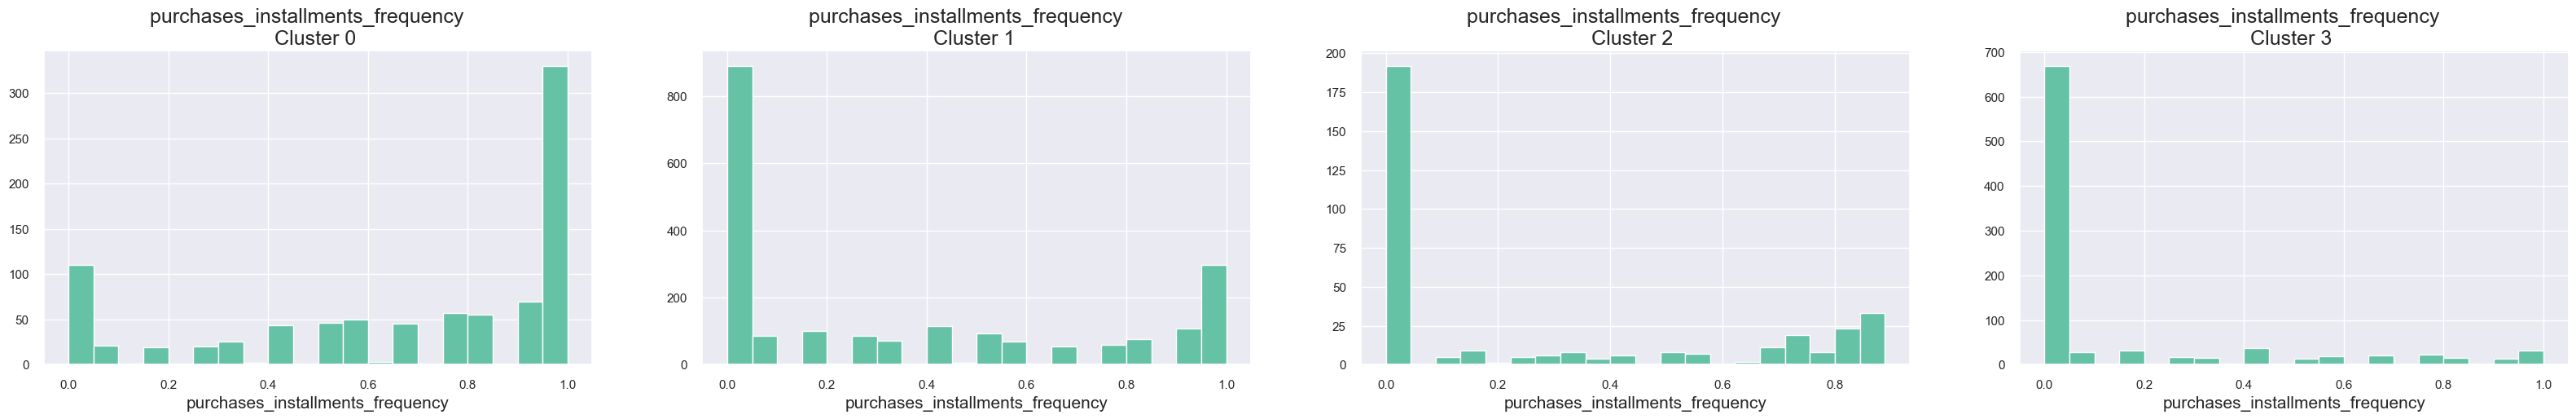

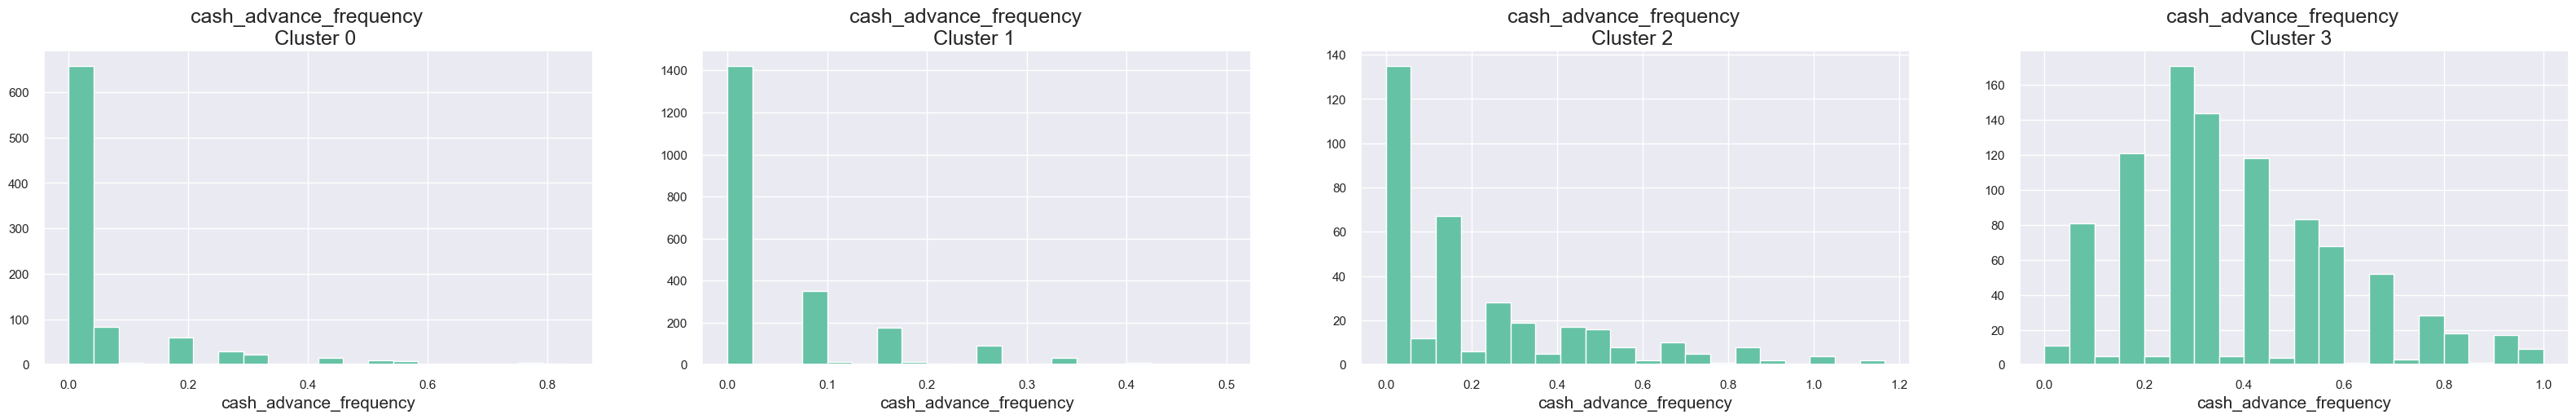

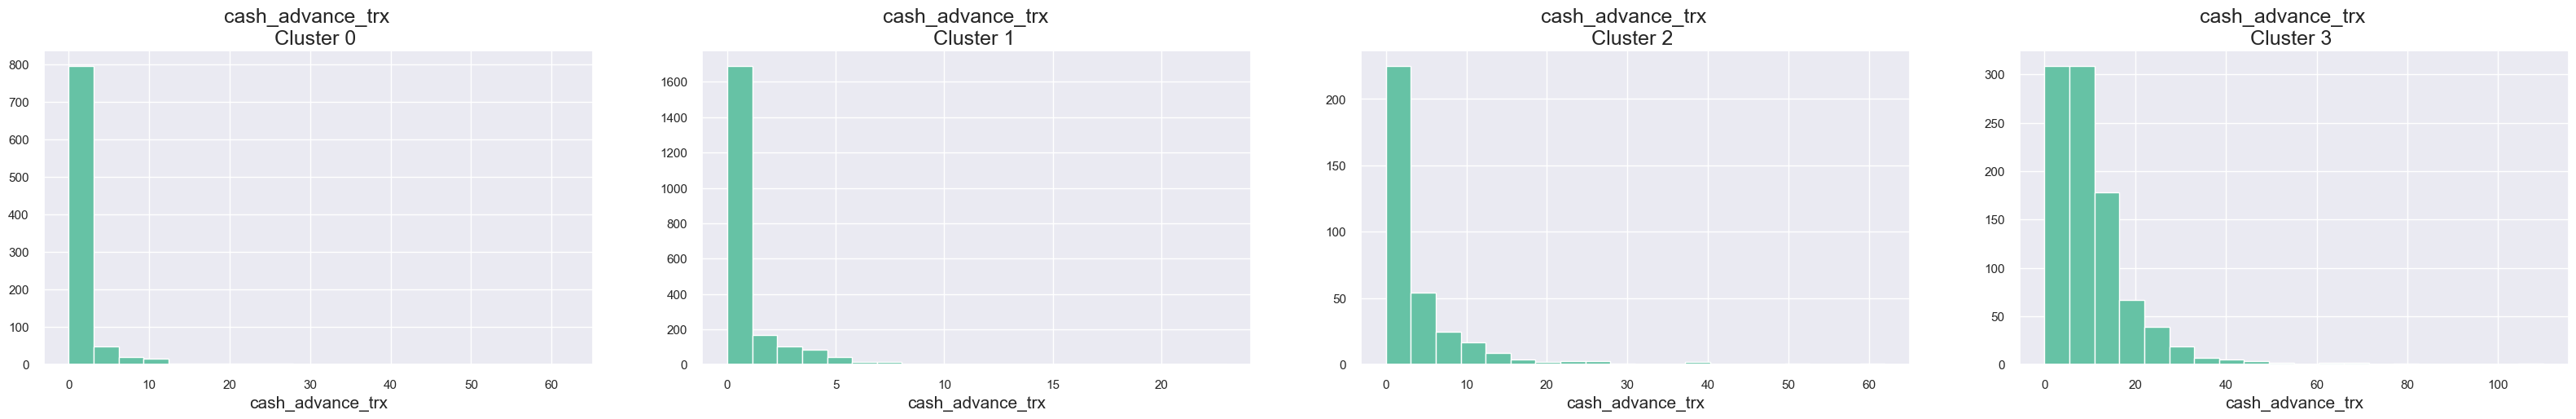

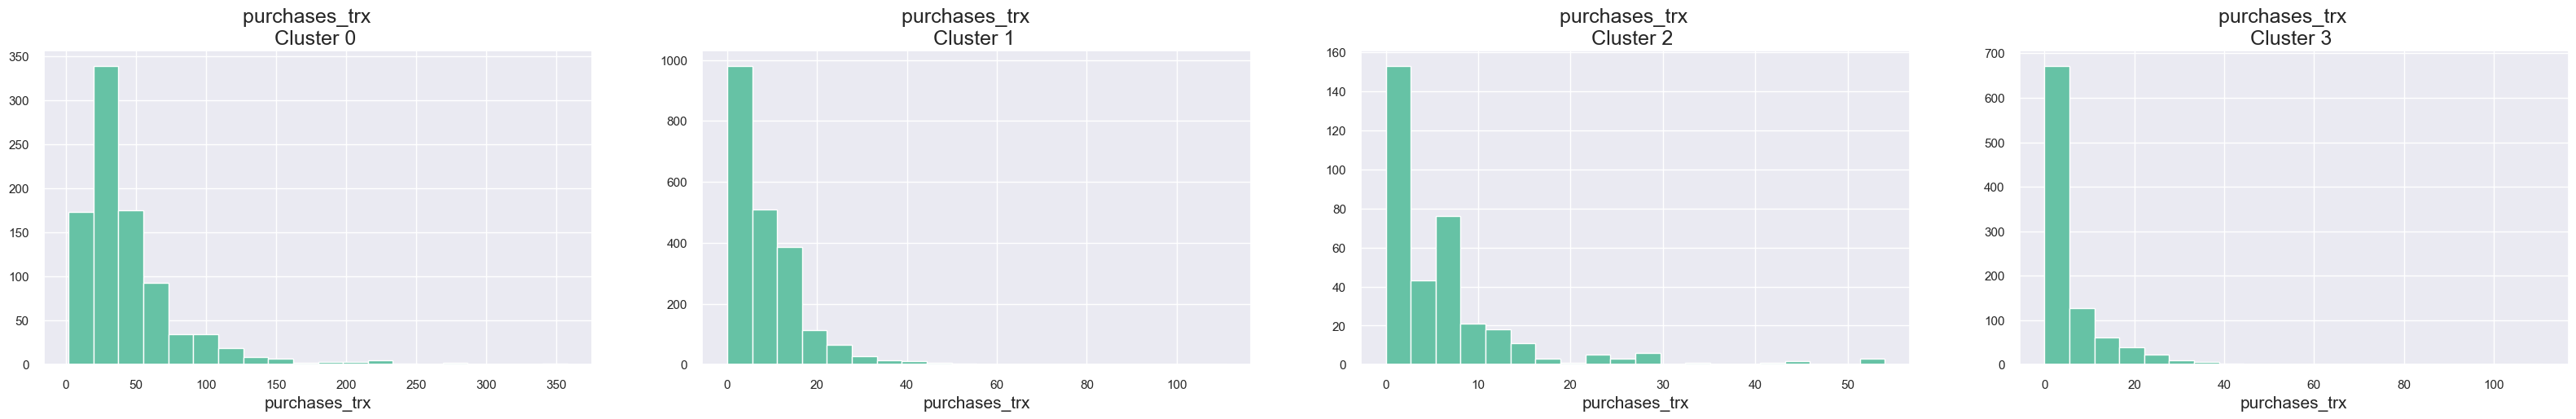

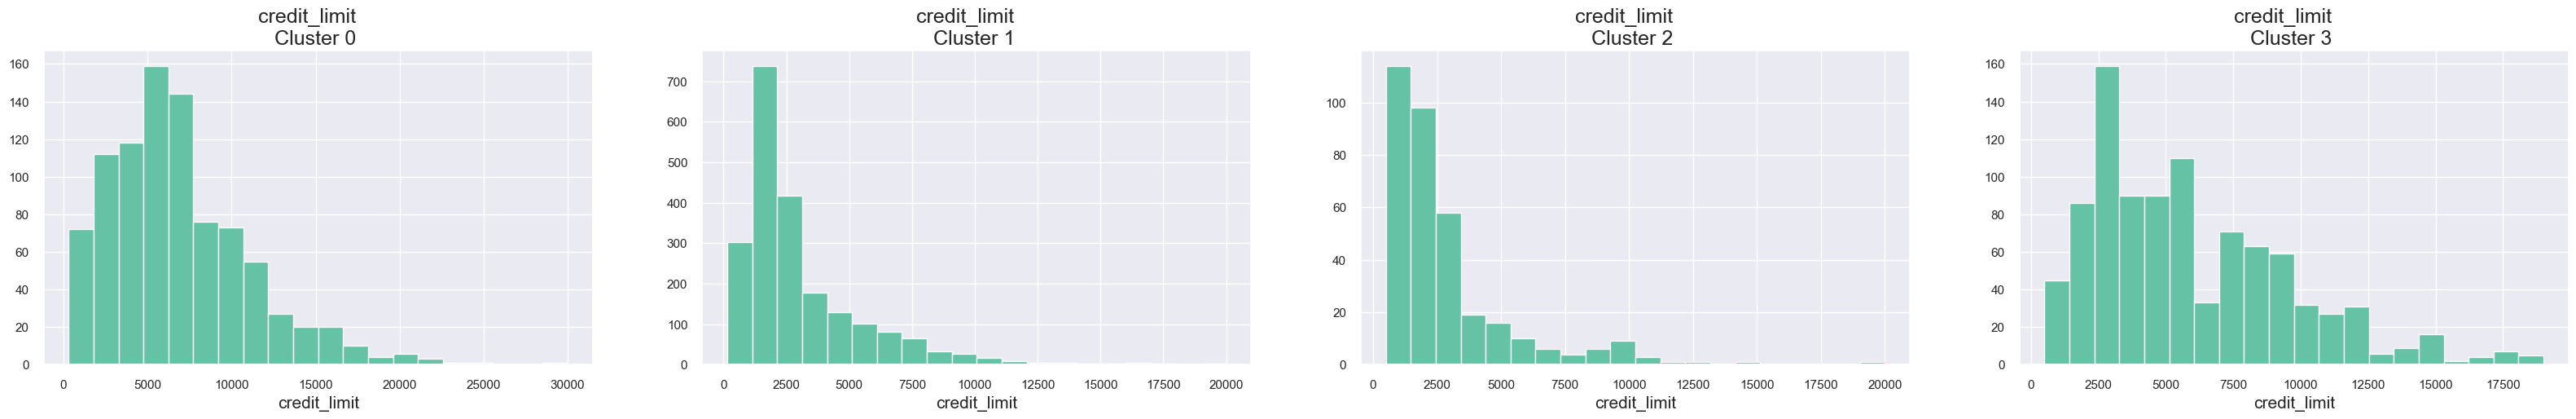

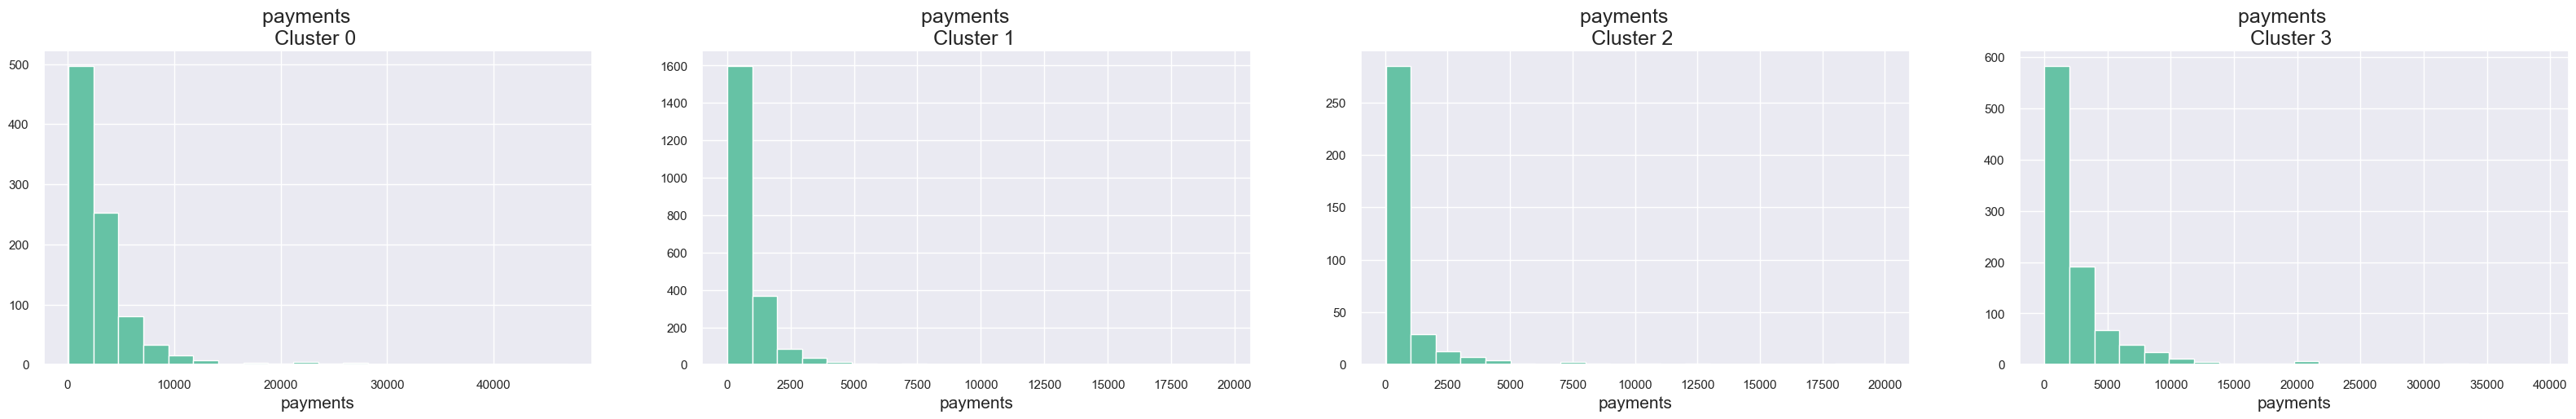

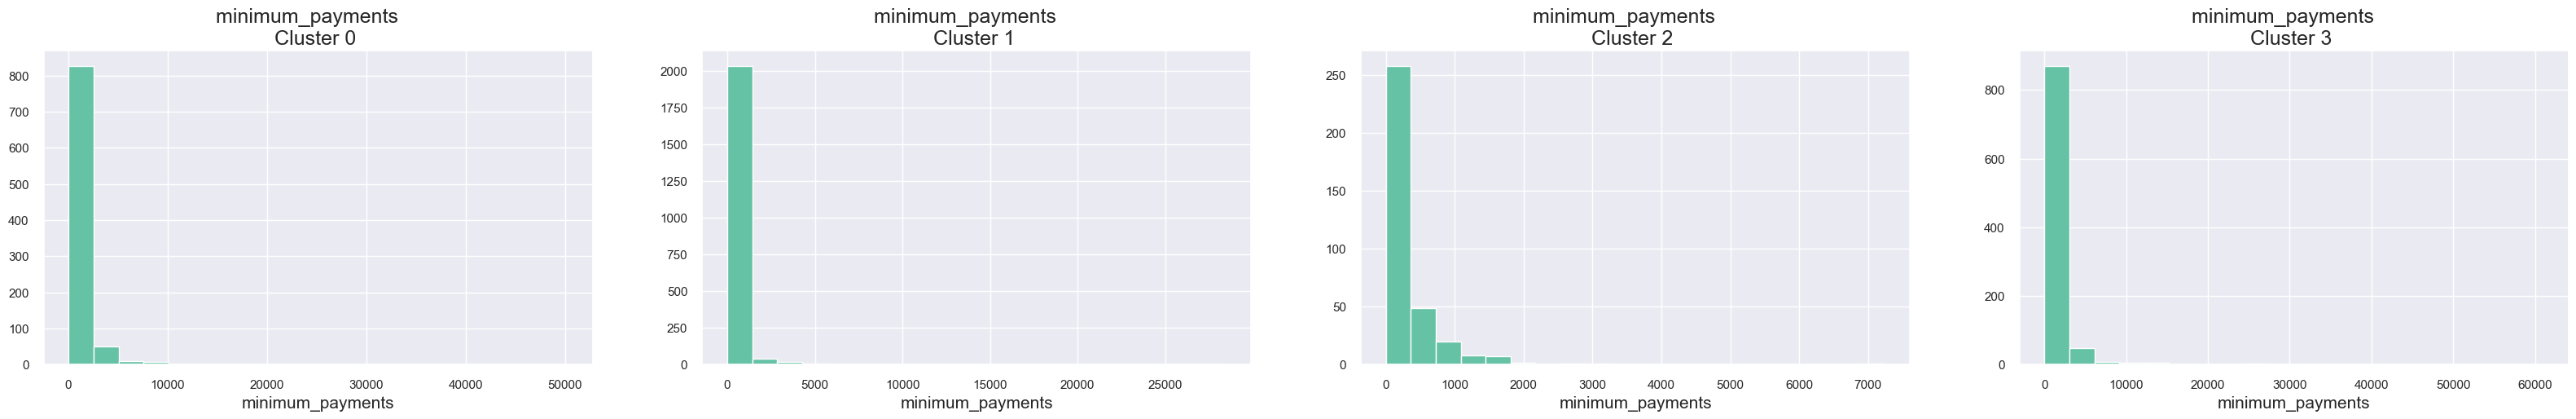

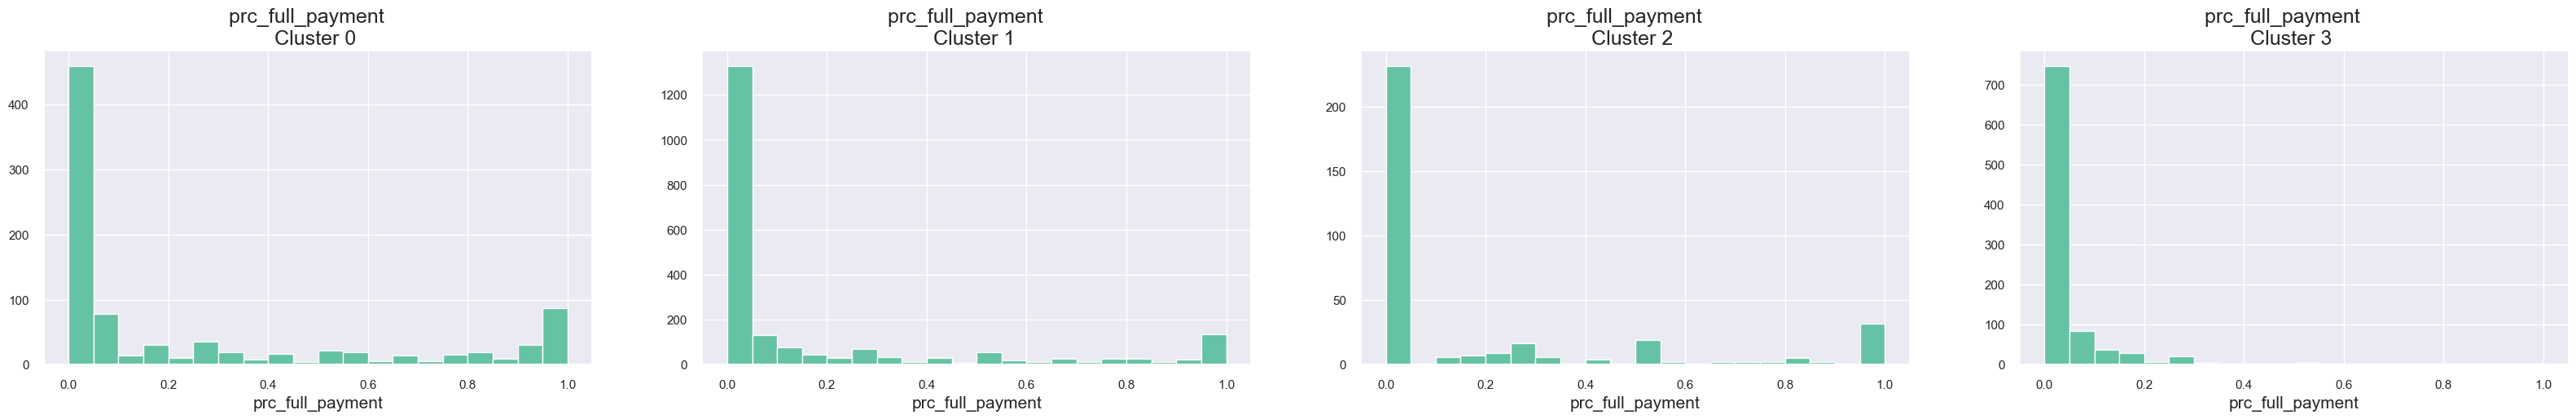

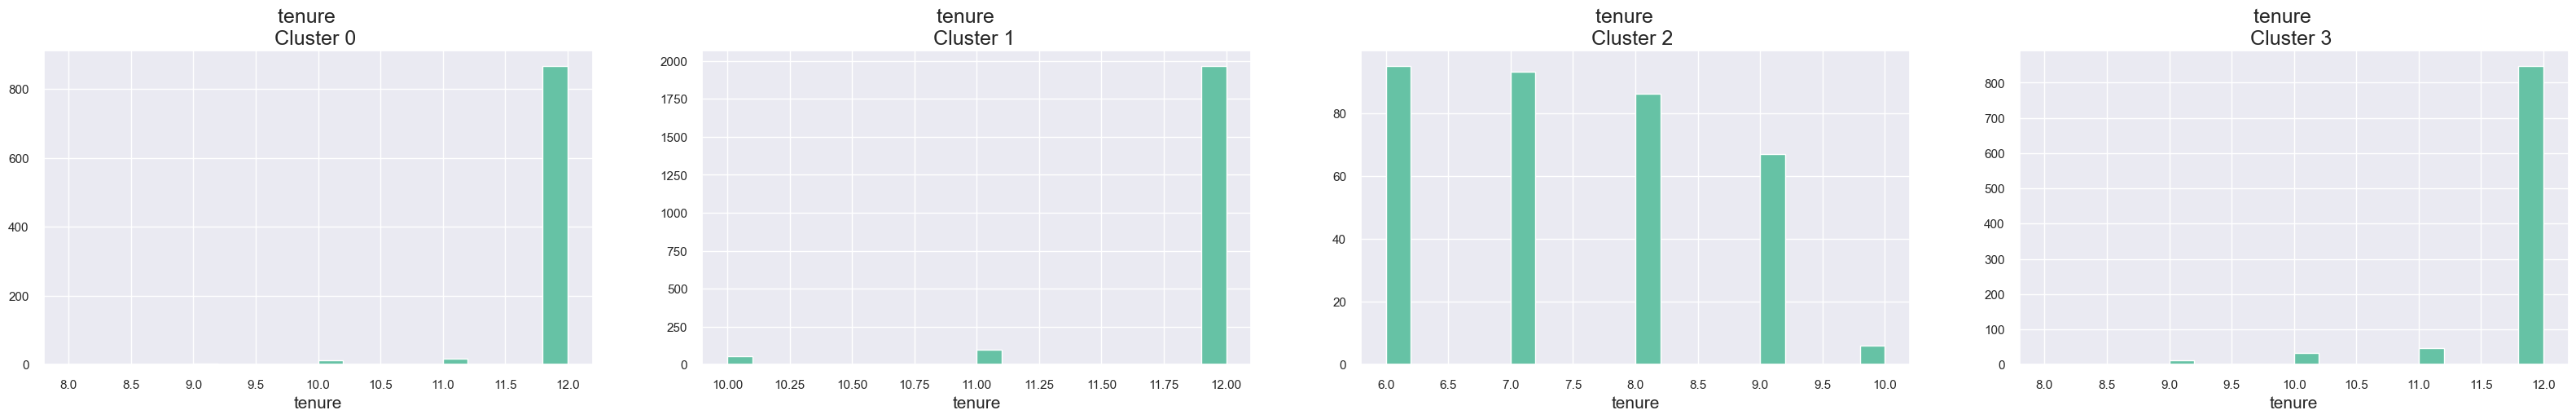

In [57]:
# Visualisasi data
for i in df.columns:
  plt.figure(figsize =(40,5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_clustered[df_clustered['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j), fontsize=18)
    plt.xlabel(i, fontsize=15)
  
  plt.show()

**Penjelasan:**

**a. Cluster 0**
- Mayoritas anggota cluster memiliki `balance atau saldo` yang rendah yaitu < $2500

- Mayoritas anggota cluster selalu update saldo mereka atau `balance frequency` 
- Mayoritas anggota cluster memiliki jumlah total pembelian atau `purchases` yang sangat sedikit yaitu <$10000 
- Jumlah `purchases frequency` pada cluster ini yaitu sebagian besar sering melakukan pembelian dengan nilai tertinggi pada nilai 1.0
- Jumlah `purchases trx`  pada cluster ini yaitu sebagian besar anggota memiliki total jumlah transaksi pembelian dibawah 50 kali dan ada sedikit yang dibawah 250 kali
- Mayoritas anggota cluster memiliki jumlah total yang sedikit pembelian satu kali atau `one off purchases` <$5000
- Jumlah `one off purchases frequency` pada cluster ini yaitu cukup beragam. Sebagian besar sering melakukan pembelian satu kali  dan ada sedikit yang jarang melakukan pembelian satu kali
- Mayoritas anggota cluster memiliki jumlah total pembelian secara cicilan atau `installments purchases` <$5000
- Jumlah `purchases installemnts frequency` pada cluster ini yaitu cukup beragam. Sebagian besar sering melakukan pembelian secara cicilan dan ada sedikit yang jarang melakukan pembelian secara cicilan
- Mayoritas anggota cluster melakukan penarikan uang tunai atau `cash advance` <$5000
- Jumlah `cash advance frequency` pada cluster ini yaitu jarang melakukan penarikan uangtunai, dengan sebagian besar frekuensi berada di 0.0
- Jumlah `cash advance trx` pada cluster ini yaitu sebagian besar anggota melakukan transaksi tunai menggunakan kartu kredit  dibawah 10 kali
- Mayoritas anggota cluster ini memiliki batas limit atau `credit limit` sebanyak `<&5000` dan ada sedikit yang `<&20000`
- Mayoritas anggota cluster ini memiliki jumlah total pembayaran atau `payments` yaitu <$10000
- Jumlah minimum yang harus dibayarkan oleh pengguna kartu kredit atau `minimum payments` yaitu <$10000 
- Mayoritas anggota cluster ini tidak pernah membayar tagihan kartu kredit mereka secara penuh dengan nilai tertinggi nya berada di angka 0.0 dan ada sedikit yang membayar tagihan secara penuh yang berada di angka 1.0 
- Mayoritas anggota cluster ini sudah 12 bulan menjadi pengguna kartu kredit dan ada sedikit anggota cluster yang menjadi pengguna kartu kredit selama 10 sampai 11 bulan


**b. Cluster 1**
- Mayoritas anggota cluster memiliki `balance atau saldo` yang rendah yaitu < $1000

- Mayoritas anggota cluster selalu update saldo mereka atau `balance frequency` 
- Mayoritas anggota cluster memiliki jumlah total pembelian `purchases` yang sangat sedikit yaitu <500
- Jumlah `purchases frequency` pada cluster ini yaitu memiliki proporsi yang sama antara anggota yang sering dan jarang melakukan pembelian
- Jumlah `purchases trx`  pada cluster ini yaitu sebagian besar anggota memiliki total jumlah transaksi pembelian dibawah 20  dan ada sedikit yang dibawah 40 kali 
- Mayoritas anggota cluster memiliki jumlah total pembelian satu kali atau `one off purchases` <$500
- Jumlah `one off purchases frequency` pada cluster ini yaitu cukup beragam. Sebagian besar jarang melakukan pembelian satu kali  dan ada sedikit yang sering melakukan pembelian satu kali
- Mayoritas anggota cluster memiliki jumlah total pembelian secara cicilan atau `installments purchases` <$500
- Jumlah `purchases installemnts frequency` pada cluster ini yaitu cukup beragam. Sebagian besar jarang melakukan pembelian secara cicilan dan ada sedikit yang sering melakukan pembelian secara cicilan
- Mayoritas anggota cluster melakukan penarikan uang tunai atau `cash advance` `<$1000 dan ada sedikit <$2000`
- Jumlah `cash advance frequency` pada cluster ini yaitu jarang melakukan penarikan uangtunai, dengan sebagian besar frekuensi berada di 0.0
- Jumlah `cash advance trx` pada cluster ini yaitu sebagian besar anggota melakukan transaksi tunai menggunakan kartu kredit dibawah 5 kali
- Mayoritas anggota cluster ini memiliki batas limit atau `credit limit` sebanyak `<&2500` dan ada sedikit yang `<&12500`
- Mayoritas anggota cluster ini memiliki jumlah total pembayaran atau `payments` yaitu <$2500
- Jumlah minimum yang harus dibayarkan oleh pengguna kartu kredit atau `minimum payments` yaitu <$5000 
- Mayoritas anggota cluster ini tidak pernah membayar tagihan kartu kredit mereka secara penuh dengan nilai tertinggi nya berada di angka 0.0 dan ada sedikit yang membayar tagihan secara penuh yang berada di angka 1.0 
- Mayoritas anggota cluster ini sudah 12 bulan menjadi pengguna kartu kredit dan ada sedikit anggota cluster yang menjadi pengguna kartu kredit selama 10 sampai 11 bulan


**c. Cluster 2**
- Mayoritas anggota cluster memiliki `balance atau saldo` yang rendah yaitu < $2000

- Anggota cluster ini memiliki `balance frequency` yang lebih beragam, meskipun frekuensi sering update saldo (sekitar 1.0) memiki nilai yang paling tinggi. 
- Mayoritas anggota cluster memiliki jumlah total pembelian atau `purchases` <$2000
- Jumlah `purchases frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian dengan nilai tertinggi pada nilai 0.0, namun tetap ada sedikit yang sering melakukan pembelian
- Jumlah `purchases trx`  pada cluster ini yaitu sebagian besar anggota memiliki total jumlah transaksi pembelian dibawah 10  dan ada sedikit yang dibawah 30 kali 
- Mayoritas anggota cluster memiliki jumlah total yang sedikit pembelian satu kali atau `one off purchases` <$1000
- Jumlah `one off purchases frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian satu kali
- Mayoritas anggota cluster memiliki jumlah total pembelian secara cicilan atau `installments purchases` <$500
- Jumlah `purchases installemnts frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian secara cicilan 
- Mayoritas anggota cluster melakukan penarikan uang tunai atau `cash advance` `<$2500 dan ada sedikit <$10000`
- Jumlah `cash advance frequency` pada cluster ini yaitu sedikit lebih banyak variasi dalam frekuensi sering melakukan penarikan tunai, tetapi masih cenderung rendah
- Jumlah `cash advance frequency`
- Jumlah `cash advance trx` pada cluster ini yaitu sebagian besar anggota melakukan transaksi tunai menggunakan kartu kredit dibawah 20 kali
- Mayoritas anggota cluster ini memiliki batas limit atau `credit limit` sebanyak `<&2500` dan ada sedikit yang `<&15000`
- Mayoritas anggota cluster ini memiliki jumlah total pembayaran atau `payments` yaitu <$2500
- Mayoritas jumlah minimum yang harus dibayarkan oleh pengguna kartu kredit atau `minimum payments` yaitu `<$1000` dan ada sedikit `<$2000` 
- Mayoritas anggota cluster ini tidak pernah membayar tagihan kartu kredit mereka secara penuh dengan nilai tertinggi nya berada di angka 0.0 dan ada sedikit yang membayar tagihan secara penuh yang berada di angka 1.0 
- Mayoritas anggota cluster ini sudah 6-7 bulan menjadi pengguna kartu kredit dan ada sedikit anggota cluster yang menjadi pengguna kartu kredit selama 8 - 10 bulan


**d. Cluster 3**
- Mayoritas anggota cluster memiliki `balance atau saldo` yang merata dan cukup tinggi yaitu berada di rentang `$2000-$6000`. Pada cluster ini 

- Mayoritas anggota cluster selalu update saldo mereka atau `balance frequency` 
- Mayoritas anggota cluster memiliki  jumlah total pembelian atau `purchases` <$5000
- Jumlah `purchases frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian dengan nilai tertinggi pada nilai 0.0, namun tetap ada sedikit yang sering melakukan pembelian
- Jumlah `purchases trx`  pada cluster ini yaitu sebagian besar anggota memiliki total jumlah transaksi pembelian dibawah 20  dan ada sedikit yang dibawah 40 kali 
- Mayoritas anggota cluster memiliki jumlah total yang sedikit pembelian satu kali atau `one off purchases` <$1000 dan sedikit terlihat ada yang melakukan pembelian satu kali atau `one off purchases` <$3000
- Jumlah `one off purchases frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian satu kali
- Mayoritas anggota cluster memiliki jumlah total pembelian secara cicilan atau `installments purchases` <$500
- Jumlah `purchases installemnts frequency` pada cluster ini yaitu sebagian besar jarang melakukan pembelian secara cicilan 
- Mayoritas anggota cluster melakukan penarikan uang tunai atau `cash advance` `<$5000 dan ada sedikit <$15000`
- Jumlah `cash advance frequency` pada cluster ini yaitu lebih sering melakukan penarikan uang tunai, dengan distribusi yang lebih merata dan frekuensi yang lebih tinggi dibandingkan cluster lainnya.
- Jumlah `cash advance trx` pada cluster ini yaitu sebagian besar anggota melakukan transaksi tunai menggunakan kartu kredit dibawah 40 kali
- Anggota cluster ini memiliki persebaran batas limit atau `credit limit` yang cukup beragam, yaitu diantara `$2500 - $17500`
- Mayoritas anggota cluster ini memiliki jumlah total pembayaran atau `payments` yaitu <$5000
- Jumlah minimum yang harus dibayarkan oleh pengguna kartu kredit atau `minimum payments` yaitu <$10000 
- Mayoritas anggota cluster ini tidak pernah membayar tagihan kartu kredit mereka secara penuh dengan nilai tertinggi nya berada di angka 0.0 dan tidak ada yang membayar tagihan secara penuh
- Mayoritas anggota cluster ini sudah 12 bulan menjadi pengguna kartu kredit dan ada sedikit anggota cluster yang menjadi pengguna kartu kredit selama 10 sampai 11 bulan

# **9. Model Saving**

Digunakan untuk menyimpan model yang telah dilatih untuk digunakan kembali di masa depan tanpa perlu melatih ulang.

In [62]:
with open('list_cols.txt', 'w') as file_1:
  json.dump(list(df.columns), file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
    pickle.dump(pca, file_3)

with open('model_kmeans.pkl', 'wb') as file_4:
  pickle.dump(model_kmeans, file_4)

# **10. Model Inference**

- Digunakan untuk menggunakan model yang telah dilatih untuk membuat prediksi atau mengklasifikasikan data baru.

- Model ini ada di file `P1G5_Set_1_Tasya_Amalia_Inference`

# **11. Conclusion**

## **11.1 Model Analysis**  

- Model analisis yang digunakan yaitu `K-Means` dengan jumlah cluster sebanyak 4 cluster. Langkah yang dilakukan sebelum melakukan pemodelan cluster, yaitu dataset dilakukan `cleaning data` dengan menghandling missing value dengan membuang nilai yang kosong dan menghandling outlier dengan capping. 

- Langkah selanjutnya yaitu feature selection dengan `hopkins statistic` untuk menentukan apakah data memiliki pola cluster atau data nya tersebar kemudian di lakukan scaling dengan `RobustScaling` dan sebelum masuk kedalam model definition dilakukan `Principal Component Analysis (PCA)` untuk mereduksi dimensi yang sangat berguna dalam model clustering.
- Pada proses `PCA` memutuskan untuk mempertahankan informasi sebesar 80% dengan jumlah komponen sebanyak 5 dan nilai `Silhouette Score` sebesar 0.29.
- Selanjutnya melakukan `Elbow Method dan Silhoutte Score& Plot` untuk menentukan jumlah cluster yang optimal dan menetapkan bahwa `4 cluster` merupakan jumlah cluster yang optimal. 
- `Silhouette Score` pada n_cluster = 4 memiliki score paling tinggi dibandingkan n_cluster lainnya, yaitu sebesar 0.31. Hal ini menunjukkan bahwa nilai berada sekitar 0 yang artinya data dalam cluster tidak terlalu terkelompok dengan jelas. 
- `Davies-Bouldin Score` pada n_cluster = 4 sebesar 1.08 menunjukkan bahwa cluster cukup terpisah dengan baik satu sama lain. Meskipun semakin rendah nilai nya atau mendekati nilai 0 yang menunjukkan cluster lebih terpisah satu sama lain dengan baik.


## **11.2 EDA Insight**  

Secara garis besar dapat diketahui bahwa:
- Mayoritas pengguna kartu kredit memiliki `credit limit` dan `balance atau saldo` yang rendah.
- Perilaku pembelian kartu kredit seperti, `purchases, oneoff purchases, installments purchases, cash advance` mengikuti trend yang sama dengan saldo dan batas kredit. Hal ini menunjukkan bahwa apabila memiliki saldo kredit yang sedikit maka pembelian yang dilakukan juga sedikit.
- Frekuensi perilaku pembelian juga cenderung jarang dilakukan.
- Mayoritas pengguna kartu kredit melakukan `payment` atau pembayaran secara penuh dibawah $10000
- Mayoritas pengguna kartu kredit sudah lama memiliki kartu yaitu lebih dari 12 bulan
    


## **11.3 EDA Clustering Insight** 

- Berdasarkan hasil analisis diketahui bahwa pengguna kartu kredit paling banyak berada di `cluster 1` sebanyak 49.2% (2122 pengguna), kemudian pada `cluster 3` sebanyak 21.9% (945 pengguna), pada `cluster 0` sebanyak 20.9% (902 pengguna) dan `cluster 2` sebanyak 8.0% (347 pengguna) dari total jumlah 4316 pengguna kartu kredit. 

- Berdasarkan visualisasi data mengenai karakteristik fitur di setiap cluster diketahui bahwa:

    a. Cluster 0 dan 1 memiliki karakteristik yang serupa, yaitu mayoritas anggota memiliki saldo rendah dan jarang melakukan pembelian atau penarikan tunai. Selain itu, mayoritas anggota pada cluster ini tidak pernah membayar tagihan kartu kredit secara penuh dan sedikit yang membayar tagihan kartu kredit secara penuh. Mayoritas sudah 12 bulan menjadi pengguna kartu kredit. 

    b. Cluster 2:  Meskipun sebagian besar anggotanya juga memiliki saldo rendah, distribusinya sedikit lebih merata dibanding Cluster 0 dan Cluster 1. Selain itu, anggota pada cluster ini lebih beragam dalam frekuensi update saldo dan pembelian, tetapi masih cenderung rendah. Selain itu, mayoritas anggota pada cluster ini tidak pernah membayar tagihan kartu kredit secara penuh dan sedikit yang membayar tagihan kartu kredit secara penuh. Mayoritas baru 6-7 bulan menjadi pengguna kartu kredit. 

    c. Cluster 3: Anggota memiliki saldo yang lebih tinggi dan lebih sering melakukan penarikan tunai dan pembelian. Selain itu, mayoritas anggota pada cluster ini tidak pernah membayar tagihan kartu kredit mereka secara penuh. Mayoritas sudah 12 bulan menjadi pengguna kartu kredit. 

- Berdasarkan karakteristik tersebut, mayoritas anggota baik pada cluster 0 - 4 tidak ada yang membayar tagihan kartu kredit mereka secara penuh. Kemungkinan mereka hanya membayar jumlah minimum yang diperlukan yang menunjukkan bahwa  mereka mungkin mengalami kesulitan dalam membayar tagihan mereka secara penuh.

## **11.4 Business Recommendations** 


- `Cluster 0 dan 1:` Mayoritas anggota memiliki saldo rendah dan jarang melakukan pembelian atau penarikan tunai. Perusahaan bank dapat melakukan beberapa cara yaitu:

    a. Program Edukasi: Dapat membentuk program edukasi keuangan sehingga anggota pada cluster ini dapat mengetahui pentingnya manajemen keuangan dengna baik. Selain itu dapat mempromosikan mengenai manfaat dan keuntungan dalam menggunakan kartu kredit dengan bijaksana dan bertanggung jawab.

    b. Promosi dan Diskon : Memberikan promosi dan diskon yang menarik sehingga anggota cluster ini lebih aktif dalam bertransaksi dengan kartu kredit.

- `Cluster 2:` Anggota pada cluster ini lebih mayoritas pengguna baru dan beragam dalam frekuensi update saldo dan pembelian, tetapi masih cenderung rendah.Perusahaan bank dapat melakukan beberapa cara yaitu:

    a. Menawarkan produk yang disesuaikan dengan tujuan pengguna baru kartu kredit

    b. Memberikan informasi tentang fitur-fitur kartu kredit yang mungkin paling relevan atau bermanfaat bagi pengguna baru 
    
    c. Memberikan penawaran khusus, misalnya memberikan cashback atau poin bonus pada pembelian pertama bagi pengguna baru

    d. Menawarkan akses ke tim bantuan dan dukungan bagi pengguna baru untuk memudahkan pengguna baru mengenai pertanyaan tentang kartu kedit.

- `Cluster 3:` Pengguna dengan Saldo Tinggi dan Penggunaan Aktif. Perusahaan bank dapat melakukan beberapa cara yaitu:

    a. Memberikan penghargaan dan insentif yang menarik untuk memperkuat loyalitas

    b. Memberikan layanan prioritas dan dukungan pelanggan untuk meningkatkan kepuasan dan pengalaman pengguna.




## **11.5 Overall Analysis** 

- Secara keseluruhan, hasil clustering ini cukup baik berdasarkan Davies-Bouldin Score, namun dapat ditingkatkan berdasarkan Silhouette Score dengan mencoba beberapa hal untuk memperbaiki clustering, seperti:

        a. Menguji jumlah cluster yang berbeda.

        b. Menggunakan metode clustering yang berbeda.

        c. Melakukan pra-pemrosesan data yang lebih baik, seperti mencoba metode scaling yang lain, sperti MinMax atau RobustScaling.

- Selain itu, untuk menentukan jumlah cluster yang optimal dapat menggunakan metode evaluasi yang lain, selain menggunakan metode elbow dan silhoutte score. 